In [312]:
#el presente script es para colocar los modelos GLM que más se adaptan a lo que quiero responder
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
import matplotlib as mpl
import mapclassify
import pyproj
import statsmodels.formula.api as smf

In [313]:
import warnings
warnings.filterwarnings('ignore')

In [314]:
municipios=gpd.read_file(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\municipios.shp")
print(municipios)

    COD_MPIO             MPIO_NOMBR        SUBREGION  ALERTA DESCRIPCI  \
0      05761               SOPETRÁN        OCCIDENTE       0      None   
1      05425                  MACEO  MAGDALENA MEDIO       0      None   
2      05501                  OLAYA        OCCIDENTE       0      None   
3      05264             ENTRERRIOS            NORTE       0      None   
4      05042  SANTA FE DE ANTIOQUIA        OCCIDENTE       1      None   
..       ...                    ...              ...     ...       ...   
120    05031                 AMALFI         NORDESTE       0      None   
121    05893                  YONDÓ  MAGDALENA MEDIO       0      None   
122    05091                BETANIA         SUROESTE       0      None   
123    05086                BELMIRA            NORTE       0      None   
124    05411               LIBORINA        OCCIDENTE       0      None   

    SymbolID                                           geometry  
0       None  POLYGON ((-8427867 738709, -842

In [315]:
#separando solo por mis municipios del valle de aburrá 
munic_sle=["MEDELLÍN", "ITAGÜÍ", "SABANETA","ENVIGADO","GIRARDOTA","BELLO","LA ESTRELLA", "CALDAS", "COPACABANA","BARBOSA"]
municipios=municipios[municipios["MPIO_NOMBR"].isin(munic_sle)]
print(municipios)

   COD_MPIO   MPIO_NOMBR        SUBREGION  ALERTA DESCRIPCI SymbolID  \
5     05129       CALDAS  VALLE DE ABURRA       0      None     None   
9     05631     SABANETA  VALLE DE ABURRA       3      None     None   
25    05212   COPACABANA  VALLE DE ABURRA       0      None     None   
29    05079      BARBOSA  VALLE DE ABURRA       0      None     None   
58    05088        BELLO  VALLE DE ABURRA       3      None     None   
60    05308    GIRARDOTA  VALLE DE ABURRA       3      None     None   
95    05001     MEDELLÍN  VALLE DE ABURRA       0      None     None   
96    05380  LA ESTRELLA  VALLE DE ABURRA       0      None     None   
98    05360       ITAGÜÍ  VALLE DE ABURRA       0      None     None   
99    05266     ENVIGADO  VALLE DE ABURRA       0      None     None   

                                             geometry  
5   POLYGON ((-8423133 682404, -8423156 682478, -8...  
9   POLYGON ((-8416321 687413, -8416447 687349, -8...  
25  POLYGON ((-8403569 716459, -8403565

In [307]:
municipios=municipios.rename(columns={"MPIO_NOMBR":"Ciudad"})

In [308]:
municipios["Ciudad"]=municipios["Ciudad"].str.title()

In [309]:
municipios

COD_MPIO       Ciudad        SUBREGION  ALERTA DESCRIPCI SymbolID  \
5     05129       Caldas  VALLE DE ABURRA       0      None     None   
9     05631     Sabaneta  VALLE DE ABURRA       3      None     None   
25    05212   Copacabana  VALLE DE ABURRA       0      None     None   
29    05079      Barbosa  VALLE DE ABURRA       0      None     None   
58    05088        Bello  VALLE DE ABURRA       3      None     None   
60    05308    Girardota  VALLE DE ABURRA       3      None     None   
95    05001     Medellín  VALLE DE ABURRA       0      None     None   
96    05380  La Estrella  VALLE DE ABURRA       0      None     None   
98    05360       Itagüí  VALLE DE ABURRA       0      None     None   
99    05266     Envigado  VALLE DE ABURRA       0      None     None   

                                             geometry  
5   POLYGON ((-8423133 682404, -8423156 682478, -8...  
9   POLYGON ((-8416321 687413, -8416447 687349, -8...  
25  POLYGON ((-8403569 716459, -8403565 716579, -8...  
29  POLYGON ((-8384926 726611, -8384950 726541, -8...  
58  POLYGON ((-8413842 716749, -8413963 716836, -8...  
60  POLYGON ((-8398732 717756, -8398820 717786, -8...  
95  POLYGON ((-8423404 710923, -8423505 710973, -8...  
96  POLYGON ((-8421637 688275, -8421759 688376, -8...  
98  POLYGON ((-8415772 691556, -8415873 691562, -8...  
99  POLYGON ((-8407607 691150, -8407978 691234, -8...

In [277]:
#horarios 
horarios1=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Trabajo3\horastodos.csv")
horarios1

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura
0             0      12     1  28.026581    0.294968    19.163871
1             1      12     2  27.870992    0.540774    18.928801
2             2      12     3  27.077382    1.122516    18.679000
3             3      12     4  26.379148    0.409677    18.487376
4             4      12     5  26.380198    0.270387    18.398113
..          ...     ...   ...        ...         ...          ...
355         355      94    20  11.010333    0.098323    12.894070
356         356      94    21  12.649717    0.409677    12.673548
357         357      94    22  12.676909    0.122903    12.506495
358         358      94    23  11.904949    0.155677    12.283457
359         359      94    24  10.743358    0.876710    12.044747

[360 rows x 6 columns]

In [278]:
cantidad=horarios1["Codigo"].unique()
cantidad

array([12, 38, 69, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 90, 94])

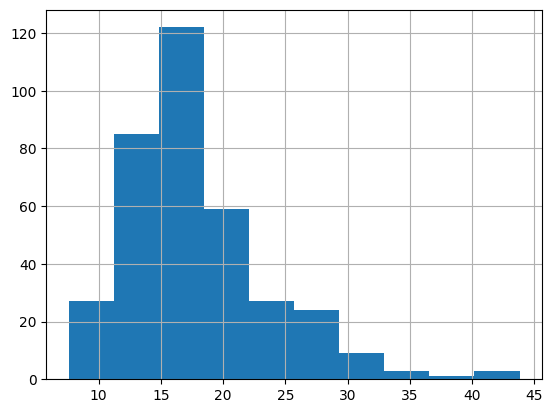

In [279]:
horarios1['pm25'].hist()
plt.show()


In [280]:
horarios1['log_pm25'] = np.log(horarios1['pm25'] + 0.1)  

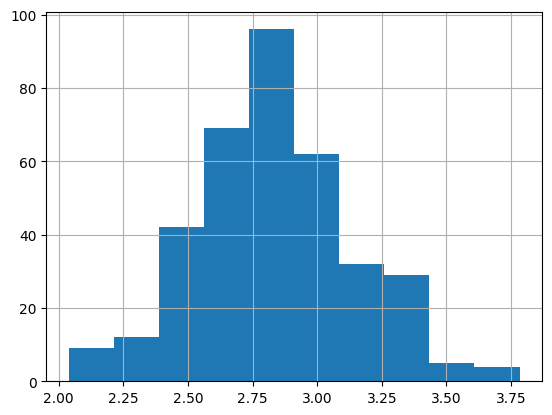

In [281]:
horarios1['log_pm25'].hist()
plt.show()

In [282]:
# Variables cíclicas
horarios1['sin_hora'] = np.sin(2 * np.pi * horarios1['hora'] / 24)
horarios1['cos_hora'] = np.cos(2 * np.pi * horarios1['hora'] / 24)

# no tener NaNs en ninguna variable usada
variables_modelo = ['pm25', 'temperatura', 'pp_horaria', 'sin_hora', 'cos_hora', 'Codigo']
df_model = horarios1.dropna(subset=variables_modelo).copy()

In [283]:
md = smf.mixedlm(
    formula="pm25 ~ temperatura + pp_horaria + sin_hora + cos_hora",
    data=df_model,
    groups=df_model["Codigo"],
    re_formula="~ temperatura + pp_horaria"
)

mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      pm25     
No. Observations:        360          Method:                  REML     
No. Groups:              15           Scale:                   7.3979   
Min. group size:         24           Log-Likelihood:          -969.1424
Max. group size:         24           Converged:               Yes      
Mean group size:         24.0                                           
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      9.518    4.660  2.043 0.041  0.385 18.651
temperatura                    0.491    1.619  0.303 0.762 -2.682  3.664
pp_horaria                    -2.315    0.761 -3.040 0.002 -3.808 -0.823
sin_hora                       3.089    0.418  7.392 0.000  2.270  3.

In [248]:
# Extraer coeficientes aleatorios por grupo
efectos_estaciones = mdf.random_effects

# Mostrar pendiente específica por estación
for estacion, efectos in efectos_estaciones.items():
    pendiente_temp = mdf.fe_params['temperatura'] + efectos.get('temperatura', 0)
    pendiente_pp = mdf.fe_params['pp_horaria'] + efectos.get('pp_horaria', 0)
    print(f"Estación {estacion} → Temp: {pendiente_temp:.3f}, Prec: {pendiente_pp:.3f}")


Estación 12 → Temp: 0.733, Prec: -4.590
Estación 38 → Temp: 0.755, Prec: -2.114
Estación 69 → Temp: 0.350, Prec: -2.086
Estación 78 → Temp: 0.878, Prec: -2.184
Estación 79 → Temp: 0.265, Prec: -4.161
Estación 80 → Temp: 0.367, Prec: -2.891
Estación 81 → Temp: 0.419, Prec: -2.227
Estación 82 → Temp: 0.033, Prec: -1.711
Estación 83 → Temp: -1.102, Prec: -2.940
Estación 84 → Temp: 0.570, Prec: -1.493
Estación 85 → Temp: 0.616, Prec: -3.452
Estación 87 → Temp: 0.340, Prec: -1.118
Estación 88 → Temp: 0.969, Prec: -2.084
Estación 90 → Temp: 1.085, Prec: -1.680
Estación 94 → Temp: 1.086, Prec: 0.004


In [284]:
# Variables cíclicas
horarios1['sin_hora'] = np.sin(2 * np.pi * horarios1['hora'] / 24)
horarios1['cos_hora'] = np.cos(2 * np.pi * horarios1['hora'] / 24)

# no tener NaNs en ninguna variable usada
variables_modelo = ['log_pm25', 'temperatura', 'pp_horaria', 'sin_hora', 'cos_hora', 'Codigo']
df_model = horarios1.dropna(subset=variables_modelo).copy()

In [285]:
modelo_log = smf.mixedlm(
    formula="log_pm25 ~ temperatura + pp_horaria + sin_hora + cos_hora",
    data=df_model,
    groups=df_model["Codigo"],
    re_formula="~ temperatura + pp_horaria"
).fit()

print(modelo_log.summary())

                 Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      log_pm25
No. Observations:        360          Method:                  REML    
No. Groups:              15           Scale:                   0.0186  
Min. group size:         24           Log-Likelihood:          90.3378 
Max. group size:         24           Converged:               Yes     
Mean group size:         24.0                                          
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     2.155    0.258  8.338 0.000  1.648  2.661
temperatura                   0.040    0.081  0.488 0.625 -0.120  0.199
pp_horaria                   -0.134    0.040 -3.340 0.001 -0.213 -0.055
sin_hora                      0.189    0.021  8.960 0.000  0.147  0.230
cos_hora 

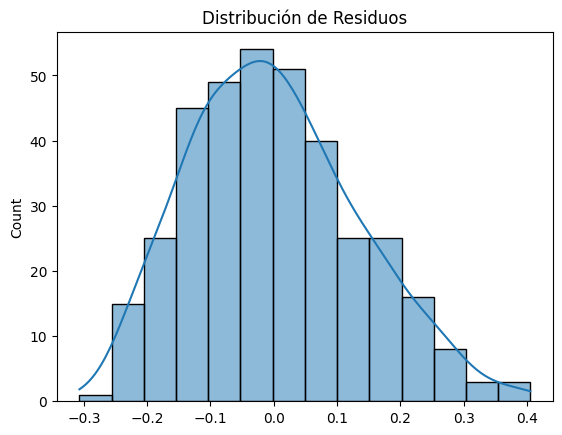

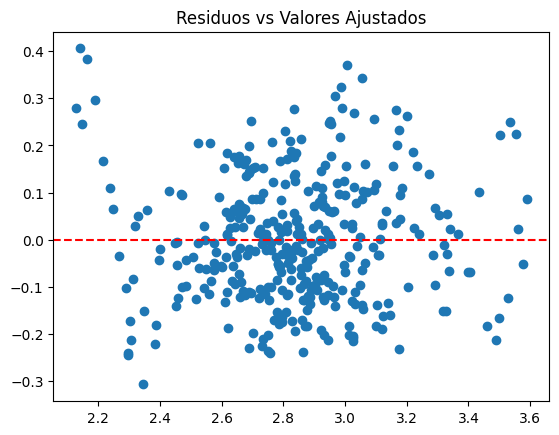

In [286]:
# 1. Normalidad de residuos
import seaborn as sns
sns.histplot(modelo_log.resid, kde=True)
plt.title('Distribución de Residuos')
plt.show()

# 2. Homocedasticidad
plt.scatter(modelo_log.fittedvalues, modelo_log.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.show()

In [288]:
# Añadir términos cuadráticos
modelo_no_linear = smf.mixedlm(
    formula="log_pm25 ~ temperatura + I(temperatura**2) + pp_horaria+ cos_hora + sin_hora + I(sin_hora**2)",
    data=df_model,
    groups=df_model["Codigo"]
).fit()
print(modelo_no_linear.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    log_pm25
No. Observations:    360        Method:                REML    
No. Groups:          15         Scale:                 0.0135  
Min. group size:     24         Log-Likelihood:        202.3327
Max. group size:     24         Converged:             Yes     
Mean group size:     24.0                                      
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            3.935    0.515   7.641 0.000  2.925  4.944
temperatura         -0.010    0.043  -0.229 0.819 -0.095  0.075
I(temperatura ** 2) -0.002    0.001  -2.038 0.042 -0.004 -0.000
pp_horaria          -0.055    0.019  -2.934 0.003 -0.091 -0.018
cos_hora            -0.264    0.029  -9.169 0.000 -0.320 -0.207
sin_hora            -0.052    0.027  -1.912 0.056 -0.

In [289]:
# Añadir términos cuadráticos
modelo_no_linear1= smf.mixedlm(
    formula="log_pm25 ~ I(temperatura**2) + pp_horaria+ cos_hora +  I(sin_hora**2)",
    data=df_model,
    groups=df_model["Codigo"]
).fit()
print(modelo_no_linear1.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    log_pm25
No. Observations:    360        Method:                REML    
No. Groups:          15         Scale:                 0.0138  
Min. group size:     24         Log-Likelihood:        204.5101
Max. group size:     24         Converged:             Yes     
Mean group size:     24.0                                      
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            3.629    0.089  40.831 0.000  3.454  3.803
I(temperatura ** 2) -0.002    0.000 -15.325 0.000 -0.002 -0.001
pp_horaria          -0.063    0.019  -3.383 0.001 -0.099 -0.026
cos_hora            -0.215    0.014 -15.825 0.000 -0.242 -0.188
I(sin_hora ** 2)    -0.366    0.019 -19.452 0.000 -0.403 -0.329
Group Var            0.093    0.308                  

In [268]:
print(modelo_no_linear1.summary())
print(modelo_no_linear1.llf)  # ¿Es un número?
print(modelo_no_linear.summary())
print(modelo_no_linear.llf)


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    log_pm25
No. Observations:    360        Method:                REML    
No. Groups:          15         Scale:                 0.0138  
Min. group size:     24         Log-Likelihood:        204.5101
Max. group size:     24         Converged:             Yes     
Mean group size:     24.0                                      
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            3.629    0.089  40.831 0.000  3.454  3.803
I(temperatura ** 2) -0.002    0.000 -15.325 0.000 -0.002 -0.001
pp_horaria          -0.063    0.019  -3.383 0.001 -0.099 -0.026
cos_hora            -0.215    0.014 -15.825 0.000 -0.242 -0.188
I(sin_hora ** 2)    -0.366    0.019 -19.452 0.000 -0.403 -0.329
Group Var            0.093    0.308                  

In [269]:
import numpy as np

# Parámetros y observaciones para modelo_no_linear1
k1 = modelo_no_linear1.params.size  # número de parámetros
n1 = modelo_no_linear1.nobs          # número de observaciones
llf1 = modelo_no_linear1.llf         # log-verosimilitud

aic1 = 2 * k1 - 2 * llf1
bic1 = np.log(n1) * k1 - 2 * llf1

print(f"Modelo_no_linear1: AIC = {aic1:.3f}, BIC = {bic1:.3f}")

# Parámetros y observaciones para modelo_no_linear
k2 = modelo_no_linear.params.size
n2 = modelo_no_linear.nobs
llf2 = modelo_no_linear.llf

aic2 = 2 * k2 - 2 * llf2
bic2 = np.log(n2) * k2 - 2 * llf2

print(f"Modelo_no_linear: AIC = {aic2:.3f}, BIC = {bic2:.3f}")


Modelo_no_linear1: AIC = -397.020, BIC = -373.704
Modelo_no_linear: AIC = -388.665, BIC = -357.577


In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones del modelo
df_model['log_pm25_pred'] = modelo_no_linear1.fittedvalues

# Métricas
rmse = np.sqrt(mean_squared_error(df_model['log_pm25'], df_model['log_pm25_pred']))
mae = mean_absolute_error(df_model['log_pm25'], df_model['log_pm25_pred'])
r2 = r2_score(df_model['log_pm25'], df_model['log_pm25_pred'])

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


RMSE: 0.1143
MAE : 0.0870
R²  : 0.8590


In [134]:
df_model

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura  log_pm25  \
0             0      12     1  28.026581    0.294968    19.163871  3.336715   
1             1      12     2  27.870992    0.540774    18.928801  3.331168   
2             2      12     3  27.077382    1.122516    18.679000  3.302385   
3             3      12     4  26.379148    0.409677    18.487376  3.276358   
4             4      12     5  26.380198    0.270387    18.398113  3.276397   
..          ...     ...   ...        ...         ...          ...       ...   
355         355      94    20  11.010333    0.098323    12.894070  2.407876   
356         356      94    21  12.649717    0.409677    12.673548  2.545509   
357         357      94    22  12.676909    0.122903    12.506495  2.547640   
358         358      94    23  11.904949    0.155677    12.283457  2.485319   
359         359      94    24  10.743358    0.876710    12.044747  2.383553   

         sin_hora  cos_hora  pm25_boxcox  
0    2.588190e-01  0.965926     2.310851  
1    5.000000e-01  0.866025     2.308322  
2    7.071068e-01  0.707107     2.295144  
3    8.660254e-01  0.500000     2.283151  
4    9.659258e-01  0.258819     2.283169  
..            ...       ...          ...  
355 -8.660254e-01  0.500000     1.837723  
356 -7.071068e-01  0.707107     1.914527  
357 -5.000000e-01  0.866025     1.915697  
358 -2.588190e-01  0.965926     1.881245  
359 -2.449294e-16  1.000000     1.823889  

[360 rows x 10 columns]

In [135]:
if 78 in df_model['Codigo'].values:
    print("Sí, la estación 78 está en el DataFrame.")
else:
    print("No, la estación 78 NO está en el DataFrame.")

Sí, la estación 78 está en el DataFrame.


In [136]:
# Retorna True si hay al menos un NaN, False si no hay ninguno
hay_nan = df_model['pm25'].isna().any()
print("¿Hay valores NaN en 'pm25'?", hay_nan)

¿Hay valores NaN en 'pm25'? False


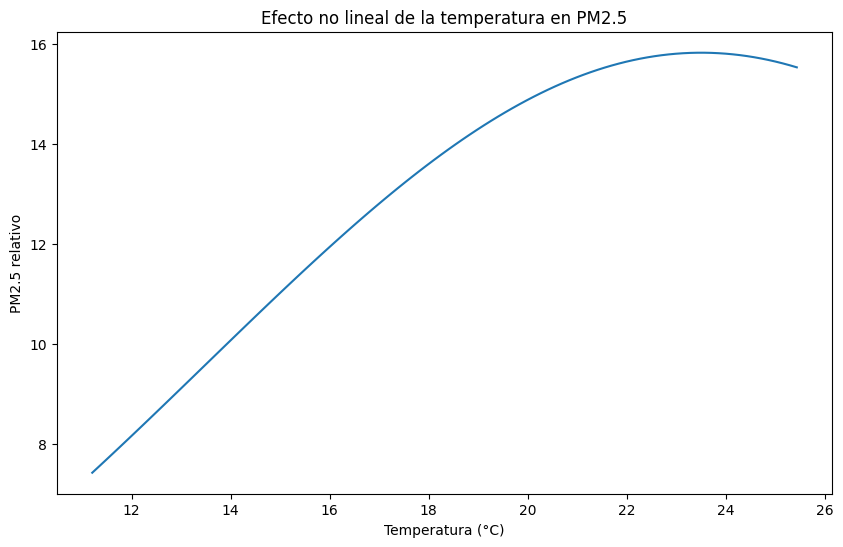

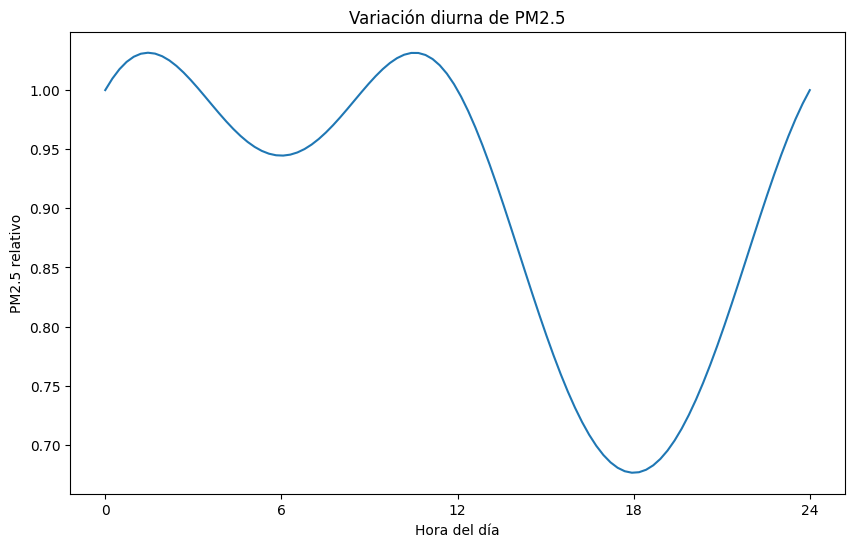

In [290]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Relación temperatura-PM25
temp_range = np.linspace(df_model['temperatura'].min(), df_model['temperatura'].max(), 100)
temp_effect = 0.235*temp_range - 0.005*(temp_range**2)

plt.figure(figsize=(10,6))
plt.plot(temp_range, np.exp(temp_effect)) # Back-transform a escala original
plt.xlabel('Temperatura (°C)')
plt.ylabel('PM2.5 relativo')
plt.title('Efecto no lineal de la temperatura en PM2.5')
plt.show()

# 2. Patrón horario
hora = np.linspace(0, 24, 100)
sin_h = np.sin(2*np.pi*hora/24)
hora_effect = 0.167*sin_h - 0.224*(sin_h**2)

plt.figure(figsize=(10,6))
plt.plot(hora, np.exp(hora_effect))
plt.xlabel('Hora del día')
plt.ylabel('PM2.5 relativo')
plt.xticks([0,6,12,18,24])
plt.title('Variación diurna de PM2.5')
plt.show()

In [291]:
# Cálculo del punto de inflexión (temperatura máxima de impacto)
punto_inflexion = 0.235 / (2 * 0.005)  
print(f"Punto de inflexión: {punto_inflexion:.1f}°C")

Punto de inflexión: 23.5°C


Las relaciones no lineales de la temperatura indica , que en algun momento la temperatura tiene una relación con ek material particulado y luego cambio , esto tiene sentido debido a que antes de 23.5 la temperatura se comporta de una manera diferente puesto que al incrementar la temperatura incrementa material particulado, debido a que mayor estabilidad atmosférica , menor estabilidad de contaminantes , aumento de emisiones por calefacción. Pero por encima de 23.5 hay una mayor turbulencia atmosférica permitiendo que halla mezcla vertical de aire propiciando un escape a capas más altas de la atmósfera.

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear valores de hora (0 a 23)
horas = np.arange(0, 24)

# Transformaciones trigonométricas usadas en el modelo
cos_hora = np.cos(2 * np.pi * horas / 24)
sin_hora2 = np.sin(2 * np.pi * horas / 24) ** 2

# Coeficientes del modelo
b_cos = modelo_no_linear1.params['cos_hora']
b_sin2 = modelo_no_linear1.params['I(sin_hora ** 2)']
intercepto = modelo_no_linear1.params['Intercept']

# Calcular el efecto parcial del componente horario
efecto_hora = intercepto + b_cos * cos_hora + b_sin2 * sin_hora2

# Crear un DataFrame para graficar
df_horas = pd.DataFrame({
    'hora': horas,
    'cos_hora': cos_hora,
    'sin_hora^2': sin_hora2,
    'efecto_total': efecto_hora
})


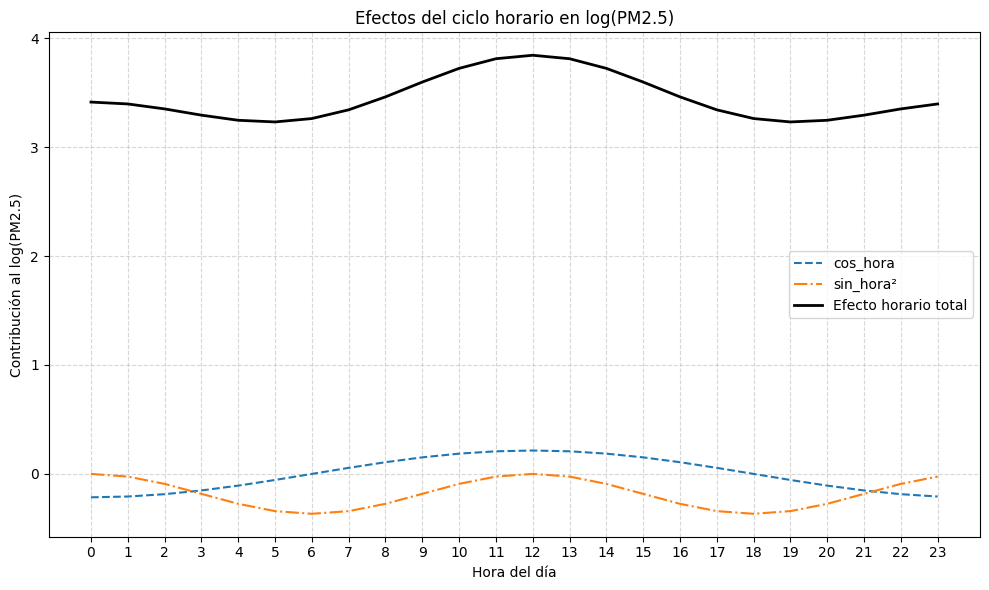

In [294]:
plt.figure(figsize=(10, 6))

# Graficar cada componente
plt.plot(df_horas['hora'], df_horas['cos_hora'] * b_cos, label='cos_hora', linestyle='--')
plt.plot(df_horas['hora'], df_horas['sin_hora^2'] * b_sin2, label='sin_hora²', linestyle='-.')
plt.plot(df_horas['hora'], df_horas['efecto_total'], label='Efecto horario total', linewidth=2, color='black')

# Estética
plt.xlabel("Hora del día")
plt.ylabel("Contribución al log(PM2.5)")
plt.title("Efectos del ciclo horario en log(PM2.5)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()


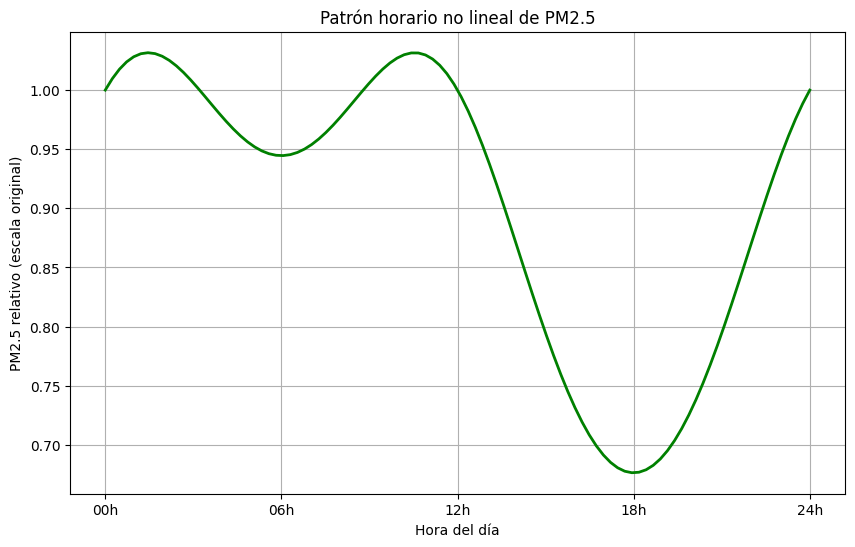

In [139]:
horas = np.linspace(0, 24, 100)
sin_h = np.sin(2*np.pi*horas/24)
efecto_hora = 0.167*sin_h - 0.224*(sin_h**2)

plt.figure(figsize=(10,6))
plt.plot(horas, np.exp(efecto_hora), 'g-', linewidth=2)
plt.xticks([0,6,12,18,24], ['00h','06h','12h','18h','24h'])
plt.xlabel('Hora del día')
plt.ylabel('PM2.5 relativo (escala original)')
plt.title('Patrón horario no lineal de PM2.5')
plt.grid(True)
plt.show()

Entre 6-10 AM se forma una capa de aire frío cerca de la superficie que atrapa contaminantes,A partir del mediodía, el calentamiento superficial genera turbulencia que dispersa contaminantes. Hay un pico de 7 a 9 am (el día empieza). La baja a las 6 de la tarde es que de por si ay una baja en tráfico y además aumento de capa de mezcla , por el calentamiento a partir de las 12 se va calentando la atmosfera generando una mezcla ertical. Luego a las 24 horas , como el suelo pierde calor por radiación se forma otra vez la inversión termica.

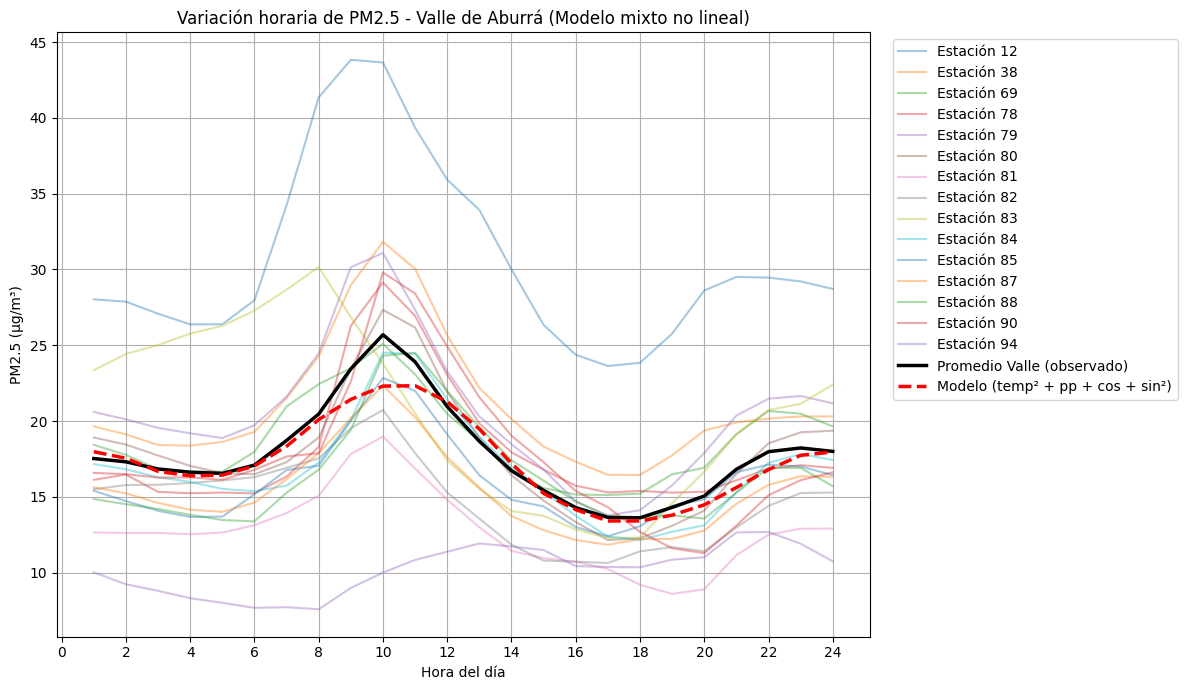

In [297]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extraer coeficientes del modelo actualizado
params = modelo_no_linear1.params
intercepto = params['Intercept']
coef_temp2 = params['I(temperatura ** 2)']
coef_pp = params['pp_horaria']
coef_cos = params['cos_hora']
coef_sin2 = params['I(sin_hora ** 2)']

# 2. Calcular promedios por hora a partir de df_model
promedios_hora = df_model.groupby('hora')[['temperatura', 'pp_horaria']].mean().reset_index()

# 3. Calcular funciones horarias
promedios_hora['cos_hora'] = np.cos(2 * np.pi * promedios_hora['hora'] / 24)
promedios_hora['sin_hora_2'] = np.sin(2 * np.pi * promedios_hora['hora'] / 24) ** 2
promedios_hora['temperatura_2'] = promedios_hora['temperatura'] ** 2

# 4. Calcular predicción en log(PM2.5)
promedios_hora['log_pm25_pred'] = (
    intercepto +
    coef_temp2 * promedios_hora['temperatura_2'] +
    coef_pp * promedios_hora['pp_horaria'] +
    coef_cos * promedios_hora['cos_hora'] +
    coef_sin2 * promedios_hora['sin_hora_2']
)

# 5. Convertir a escala original: PM2.5
promedios_hora['pm25_modelado'] = np.exp(promedios_hora['log_pm25_pred'])

# 6. Crear figura
plt.figure(figsize=(12, 7))

# 7. Graficar líneas por estación (observado)
for cod, grupo in df_model.groupby("Codigo"):
    promedio_hora_est = grupo.groupby("hora")["pm25"].mean()
    plt.plot(promedio_hora_est.index, promedio_hora_est.values, alpha=0.4, label=f'Estación {cod}')

# 8. Línea negra: promedio observado total
prom_total = df_model.groupby("hora")["pm25"].mean()
plt.plot(prom_total.index, prom_total.values, color='black', linewidth=2.5, label="Promedio Valle (observado)")

# 9. Línea roja: modelo
plt.plot(promedios_hora['hora'], promedios_hora['pm25_modelado'],
         linestyle='--', color='red', linewidth=2.5,
         label="Modelo (temp² + pp + cos + sin²)")

# 10. Formato gráfico
plt.title("Variación horaria de PM2.5 - Valle de Aburrá (Modelo mixto no lineal)")
plt.xlabel("Hora del día")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(range(0, 25, 2))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [141]:
#unimos con dataframe de longitud y latitud
est = pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Estaciones_CalidadAire.csv", encoding='latin1')
print(est)

    Codigo                                           Estacion  Longitud  \
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777   
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Vil

In [300]:
df_model=pd.merge(df_model,est,on="Codigo",how="inner")
df_model

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura  log_pm25  \
0             0      12     1  28.026581    0.294968    19.163871  3.336715   
1             1      12     2  27.870992    0.540774    18.928801  3.331168   
2             2      12     3  27.077382    1.122516    18.679000  3.302385   
3             3      12     4  26.379148    0.409677    18.487376  3.276358   
4             4      12     5  26.380198    0.270387    18.398113  3.276397   
..          ...     ...   ...        ...         ...          ...       ...   
355         355      94    20  11.010333    0.098323    12.894070  2.407876   
356         356      94    21  12.649717    0.409677    12.673548  2.545509   
357         357      94    22  12.676909    0.122903    12.506495  2.547640   
358         358      94    23  11.904949    0.155677    12.283457  2.485319   
359         359      94    24  10.743358    0.876710    12.044747  2.383553   

         sin_hora  cos_hora  pm25_boxcox  log_pm25_pred  temperatura_2  \
0    2.588190e-01  0.965926     2.310851       2.793311     367.253950   
1    5.000000e-01  0.866025     2.308322       2.746601     358.299510   
2    7.071068e-01  0.707107     2.295144       2.667670     348.905041   
3    8.660254e-01  0.500000     2.283151       2.676689     341.783084   
4    9.659258e-01  0.258819     2.283169       2.675481     338.490558   
..            ...       ...          ...            ...            ...   
355 -8.660254e-01  0.500000     1.837723       2.975704     166.257034   
356 -7.071068e-01  0.707107     1.914527       3.012189     160.618829   
357 -5.000000e-01  0.866025     1.915697       3.094272     156.412408   
358 -2.588190e-01  0.965926     1.881245       3.146567     150.883316   
359 -2.449294e-16  1.000000     1.823889       3.127788     145.075938   

       sin_hora_2  pm25_pred                 Estacion  Longitud  Latitud  \
0    6.698730e-02  16.335018  Estación Tráfico Centro -75.56958  6.25256   
1    2.500000e-01  15.589549  Estación Tráfico Centro -75.56958  6.25256   
2    5.000000e-01  14.406357  Estación Tráfico Centro -75.56958  6.25256   
3    7.500000e-01  14.536878  Estación Tráfico Centro -75.56958  6.25256   
4    9.330127e-01  14.519336  Estación Tráfico Centro -75.56958  6.25256   
..            ...        ...                      ...       ...      ...   
355  7.500000e-01  19.603419   Medellín - Santa Elena -75.49847  6.23636   
356  5.000000e-01  20.331854   Medellín - Santa Elena -75.49847  6.23636   
357  2.500000e-01  22.071159   Medellín - Santa Elena -75.49847  6.23636   
358  6.698730e-02  23.256098   Medellín - Santa Elena -75.49847  6.23636   
359  5.999039e-32  22.823449   Medellín - Santa Elena -75.49847  6.23636   

       Ciudad  
0    Medellin  
1    Medellin  
2    Medellin  
3    Medellin  
4    Medellin  
..        ...  
355  Medellín  
356  Medellín  
357  Medellín  
358  Medellín  
359  Medellín  

[360 rows x 18 columns]

Generando mapa para la hora 0...
No hay datos para la hora 0.
Generando mapa para la hora 1...


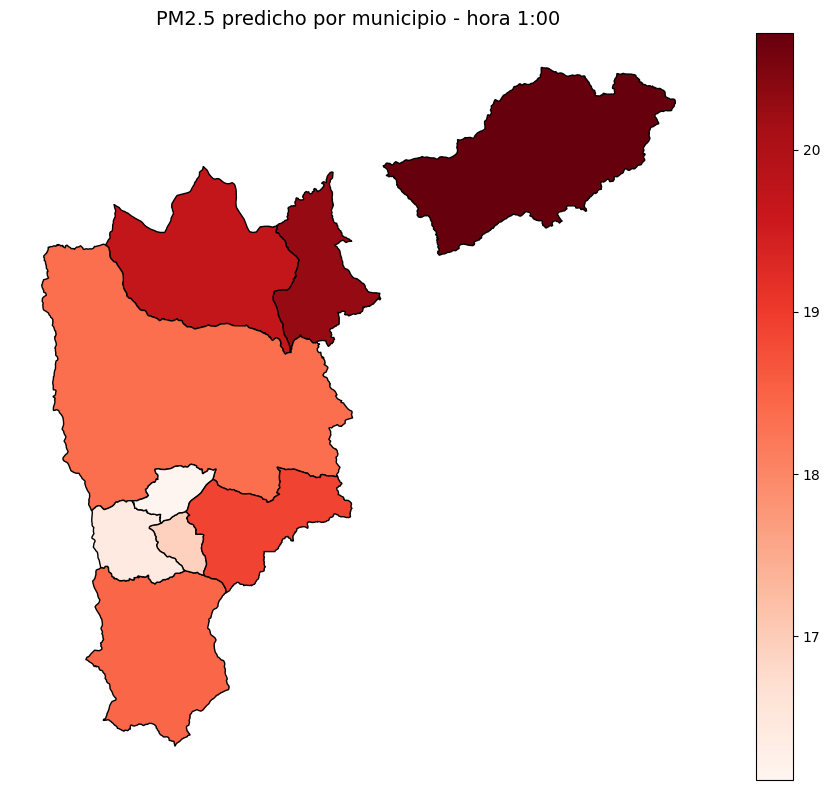

Generando mapa para la hora 2...


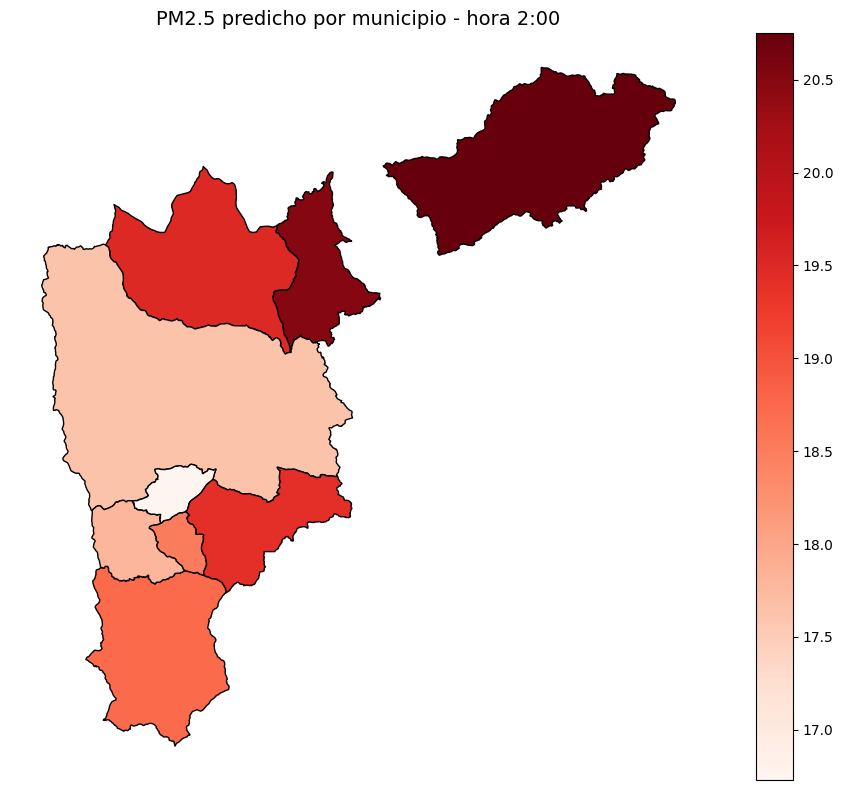

Generando mapa para la hora 3...


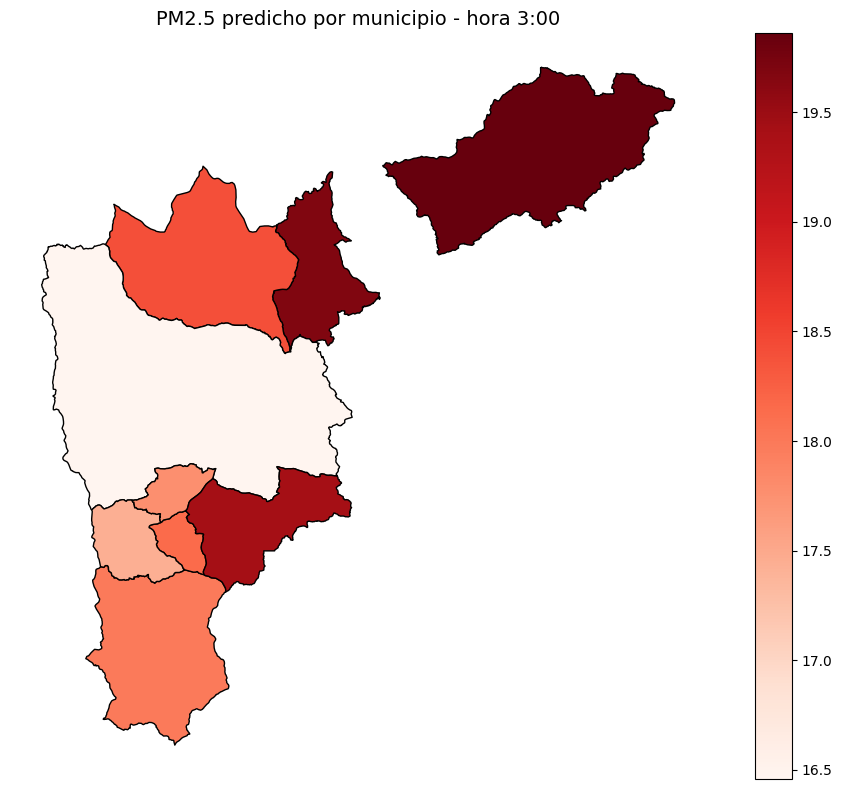

Generando mapa para la hora 4...


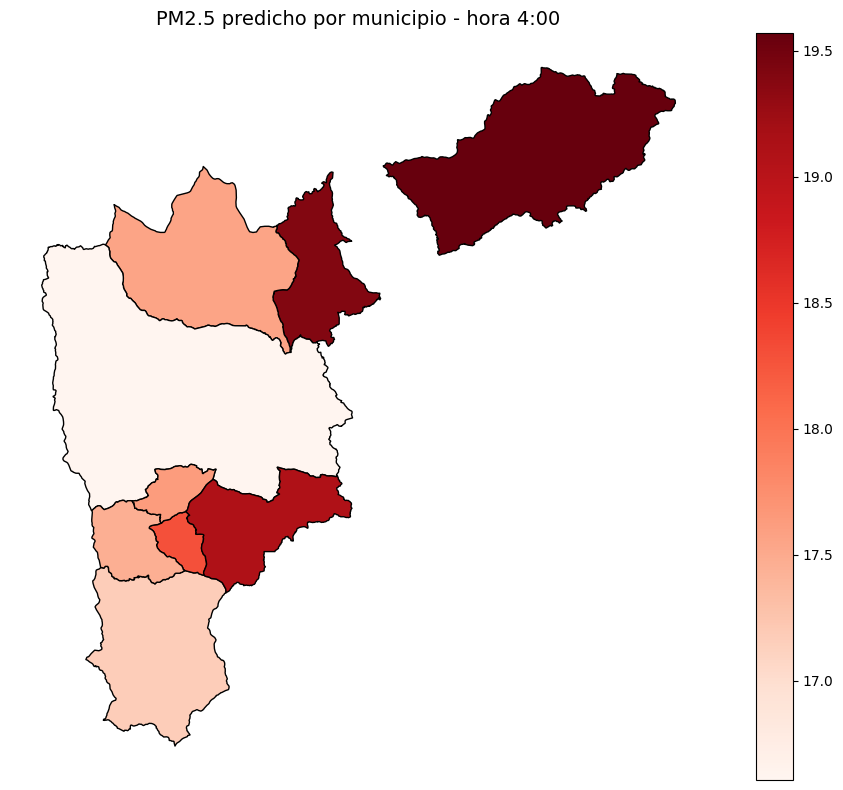

Generando mapa para la hora 5...


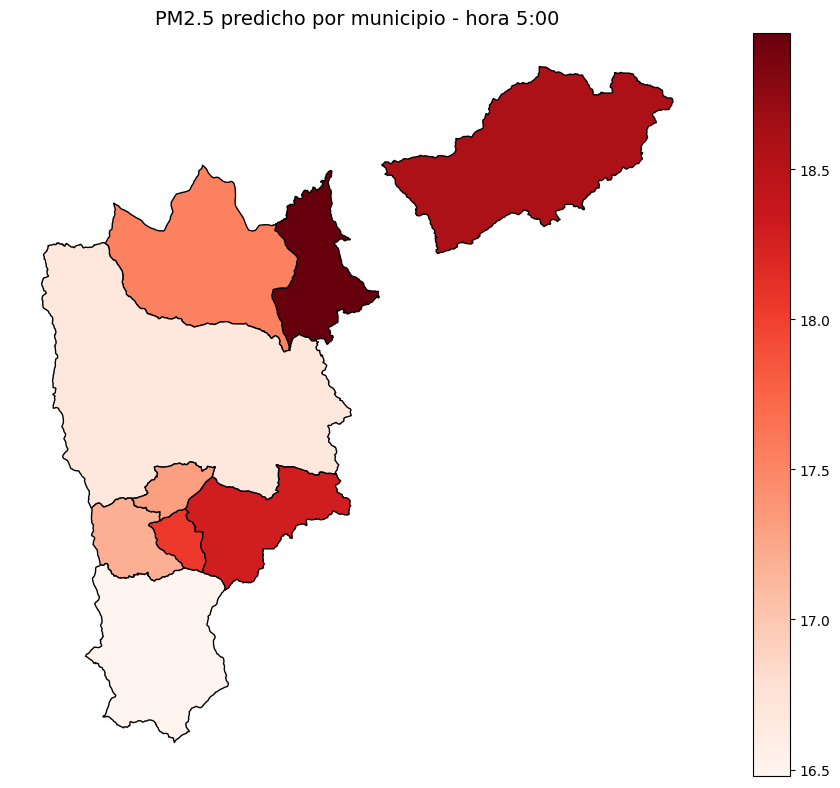

Generando mapa para la hora 6...


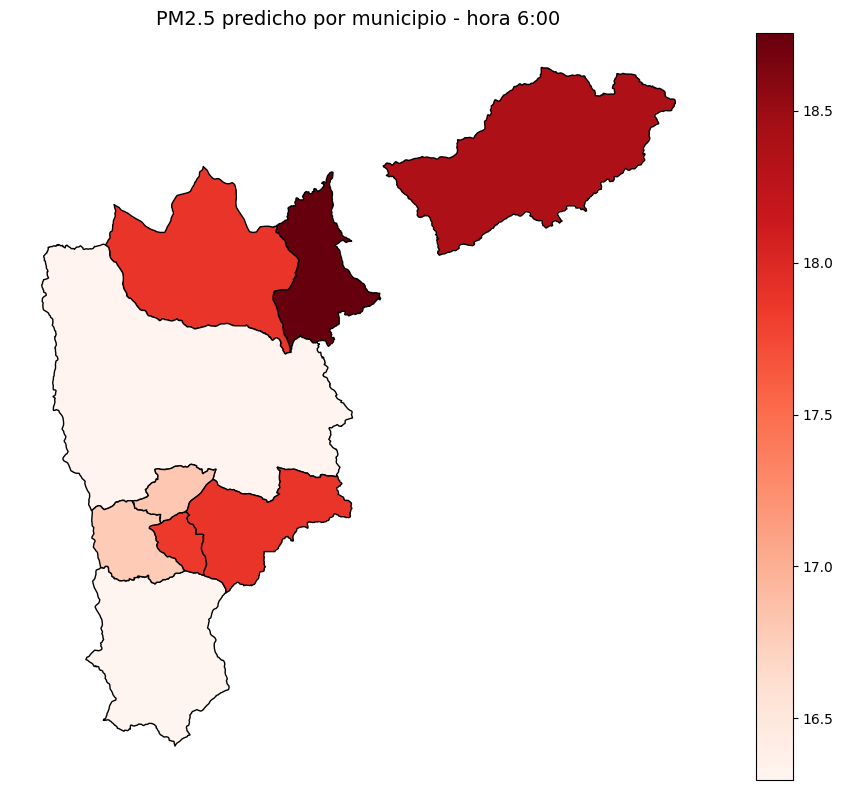

Generando mapa para la hora 7...


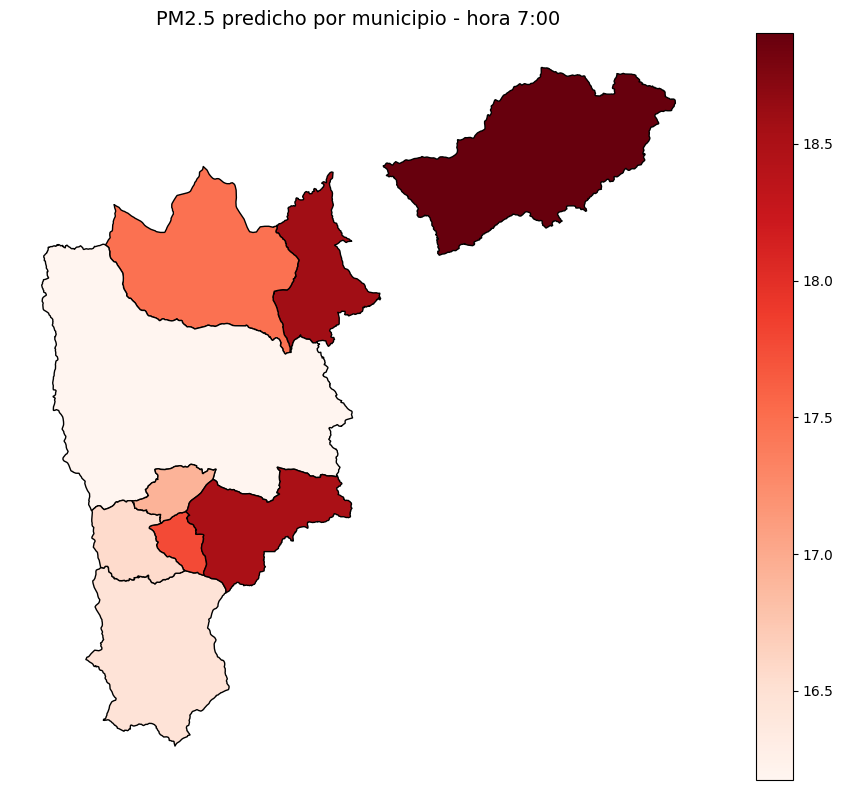

Generando mapa para la hora 8...


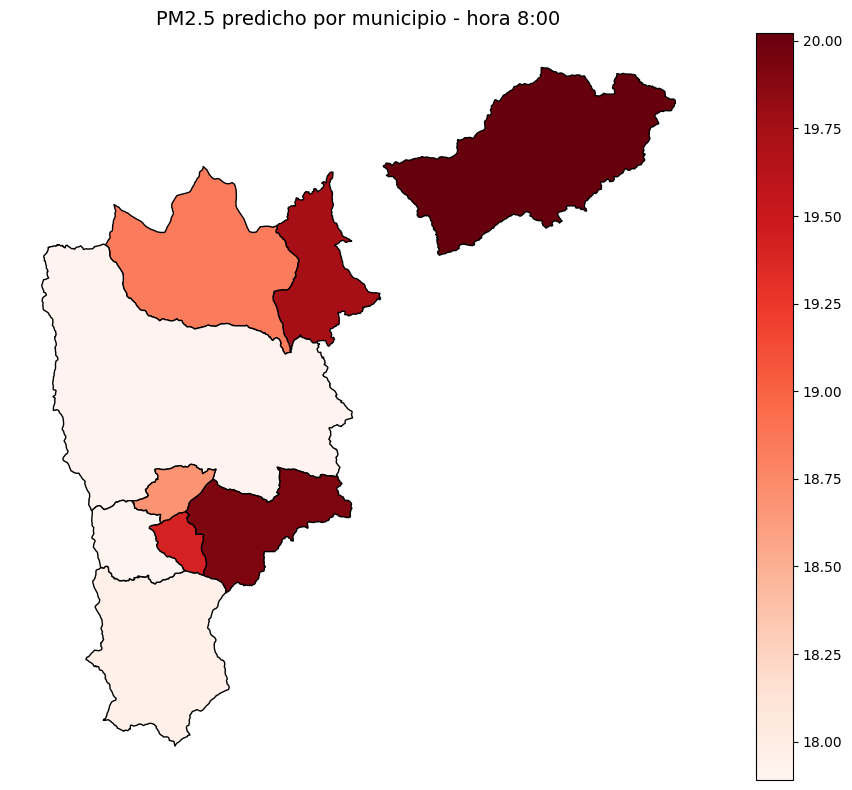

Generando mapa para la hora 9...


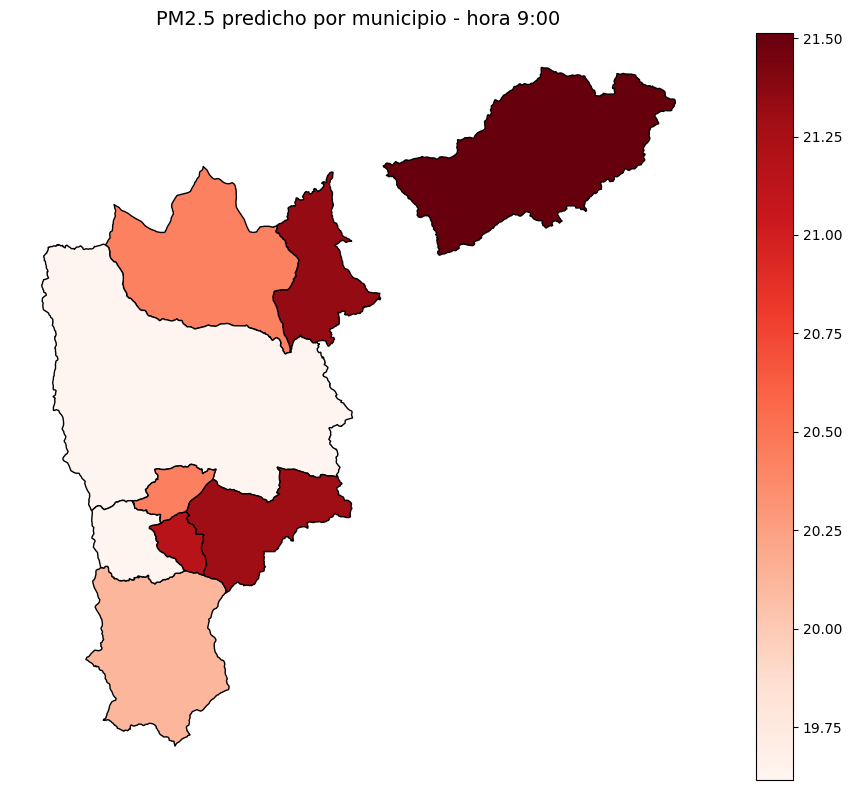

Generando mapa para la hora 10...


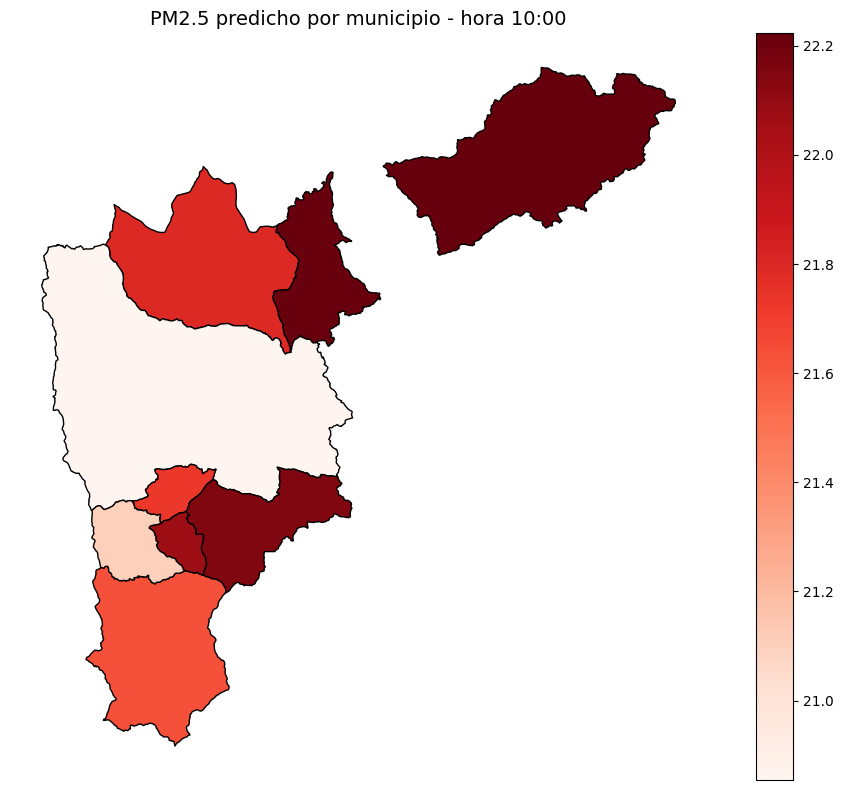

Generando mapa para la hora 11...


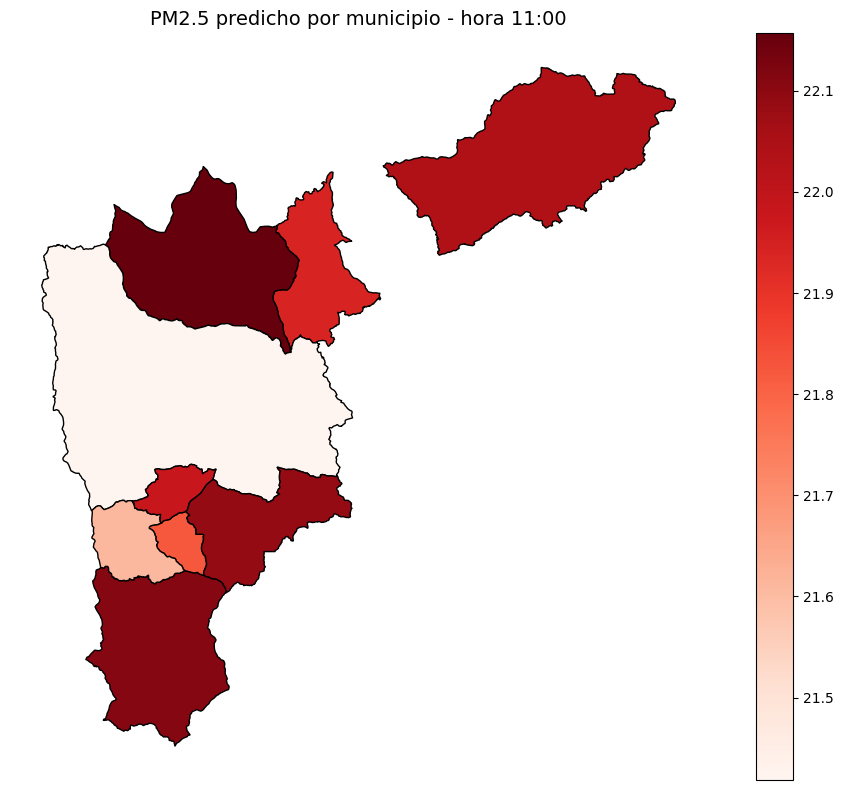

Generando mapa para la hora 12...


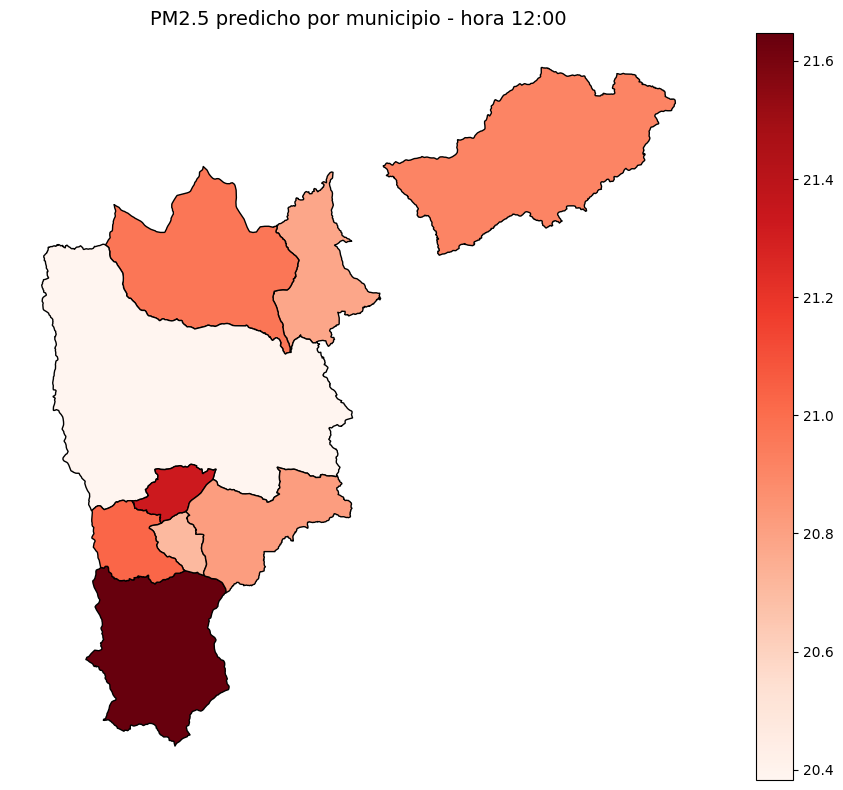

Generando mapa para la hora 13...


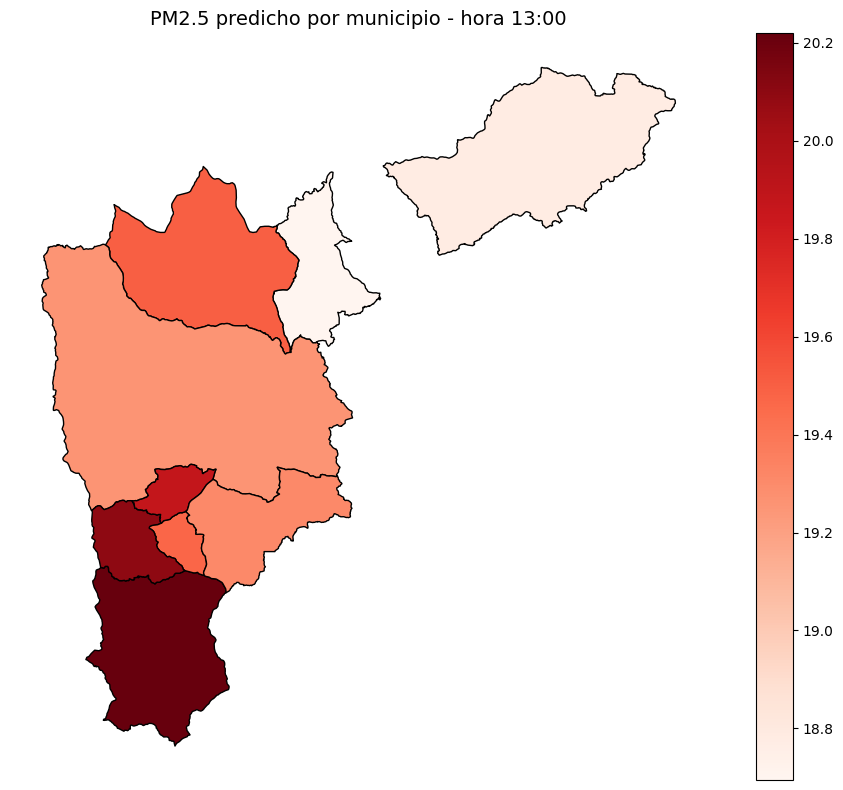

Generando mapa para la hora 14...


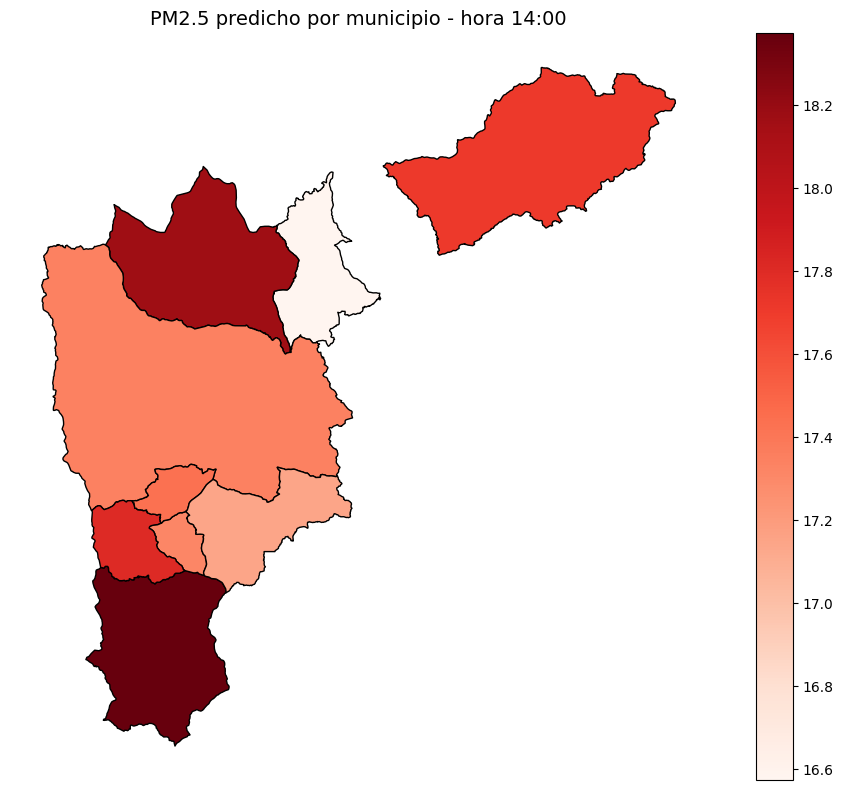

Generando mapa para la hora 15...


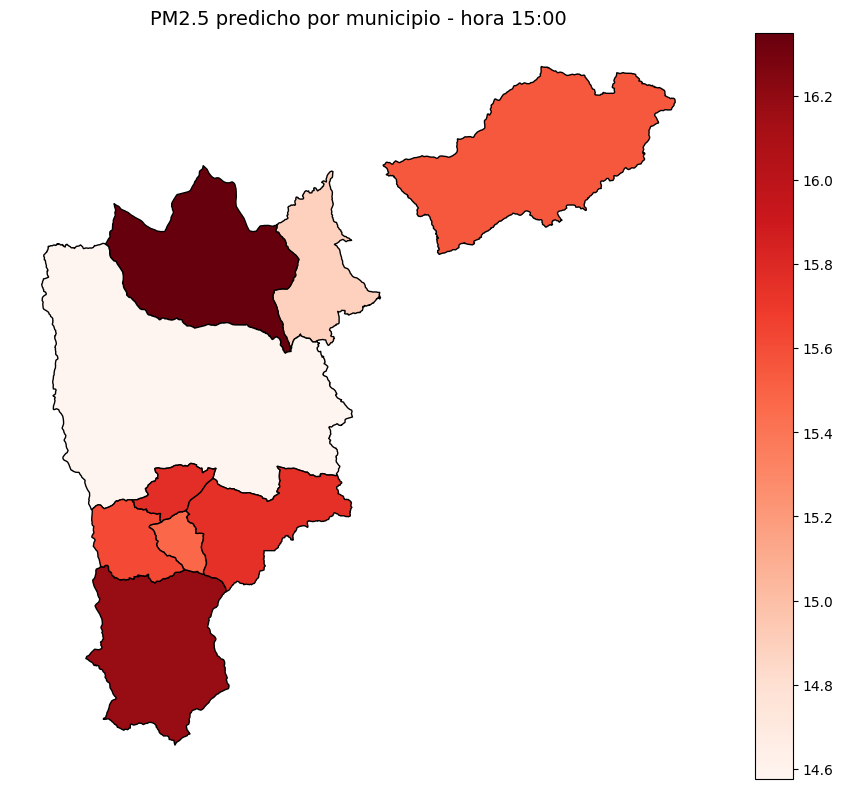

Generando mapa para la hora 16...


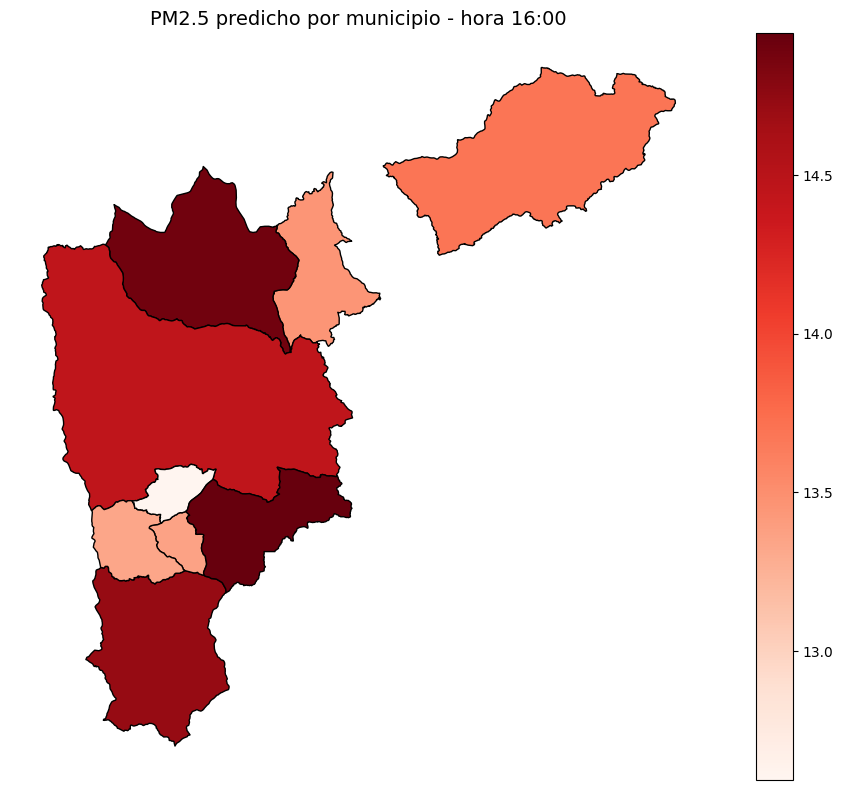

Generando mapa para la hora 17...


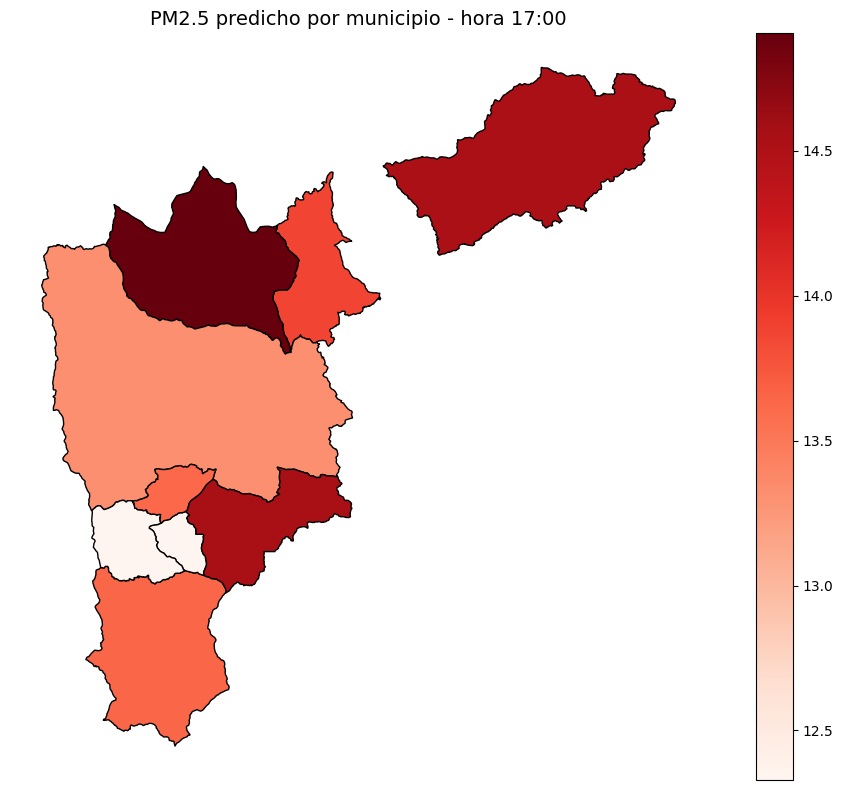

Generando mapa para la hora 18...


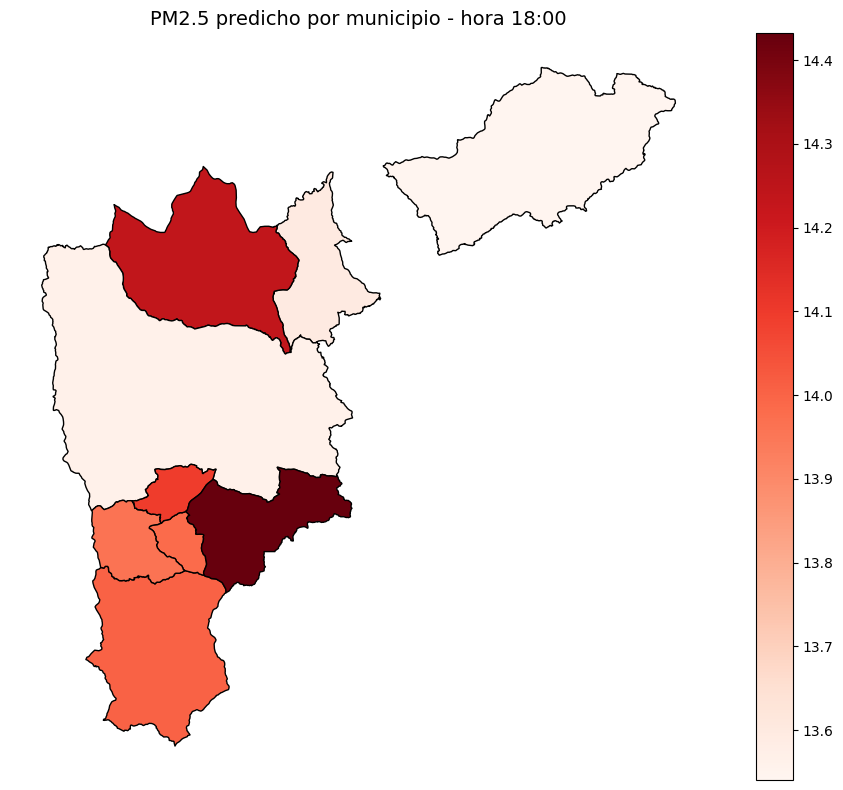

Generando mapa para la hora 19...


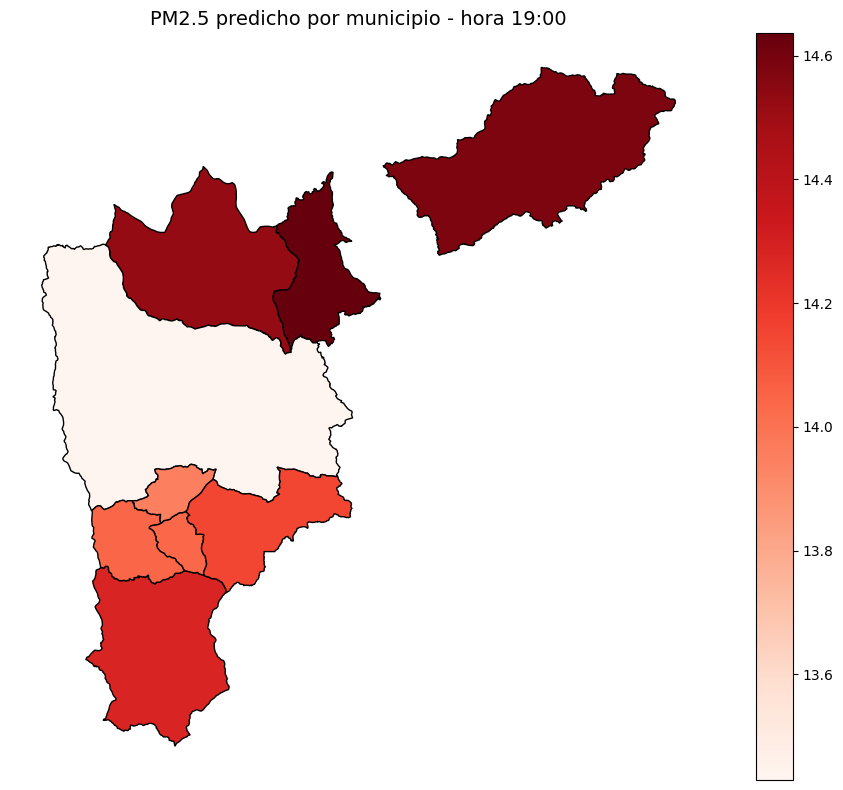

Generando mapa para la hora 20...


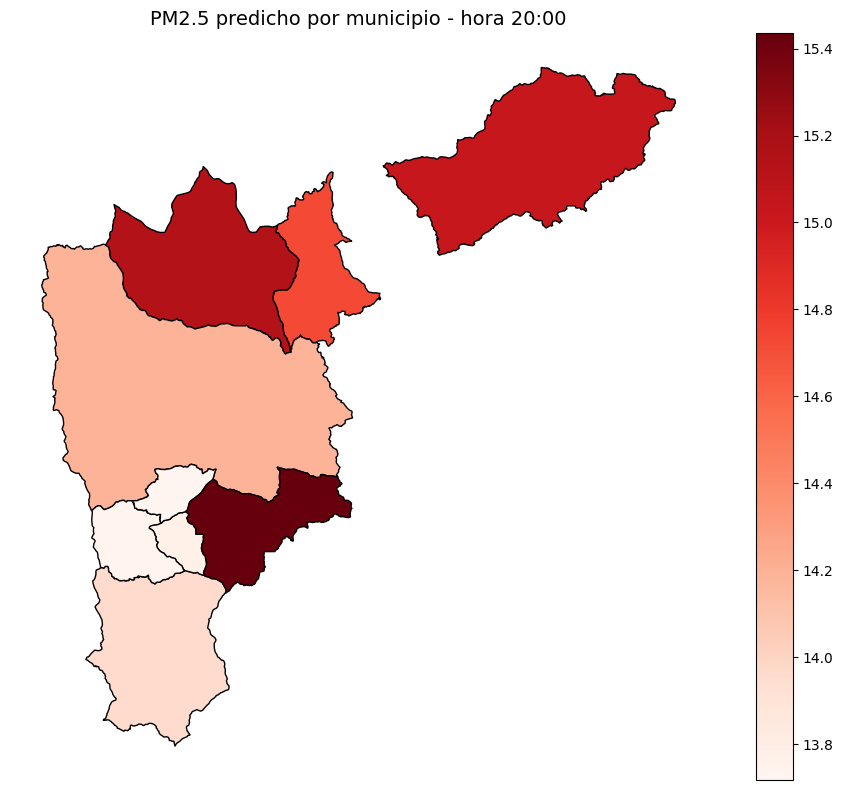

Generando mapa para la hora 21...


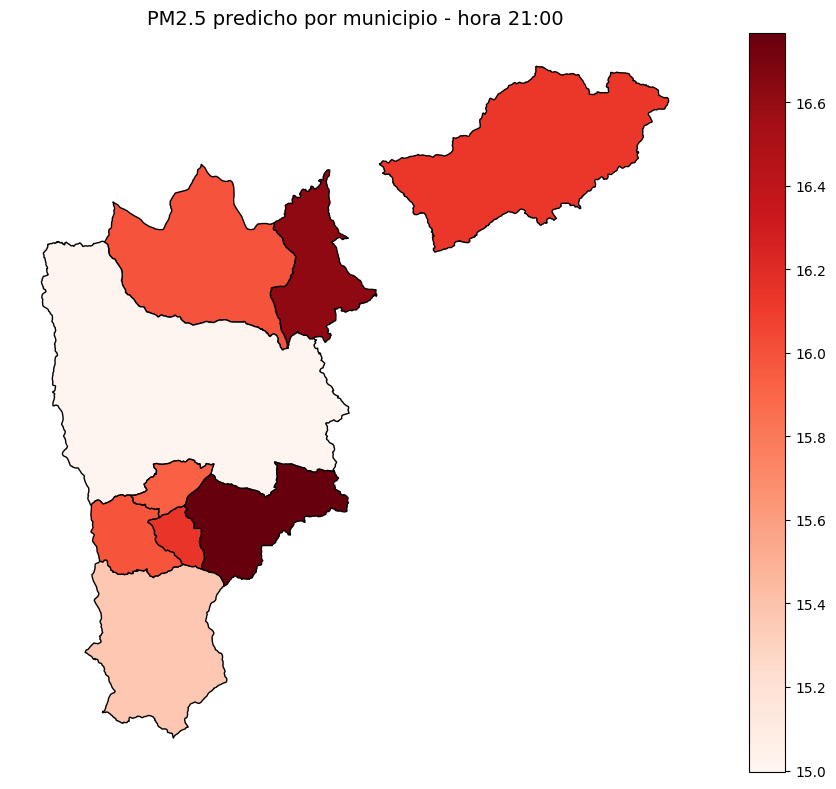

Generando mapa para la hora 22...


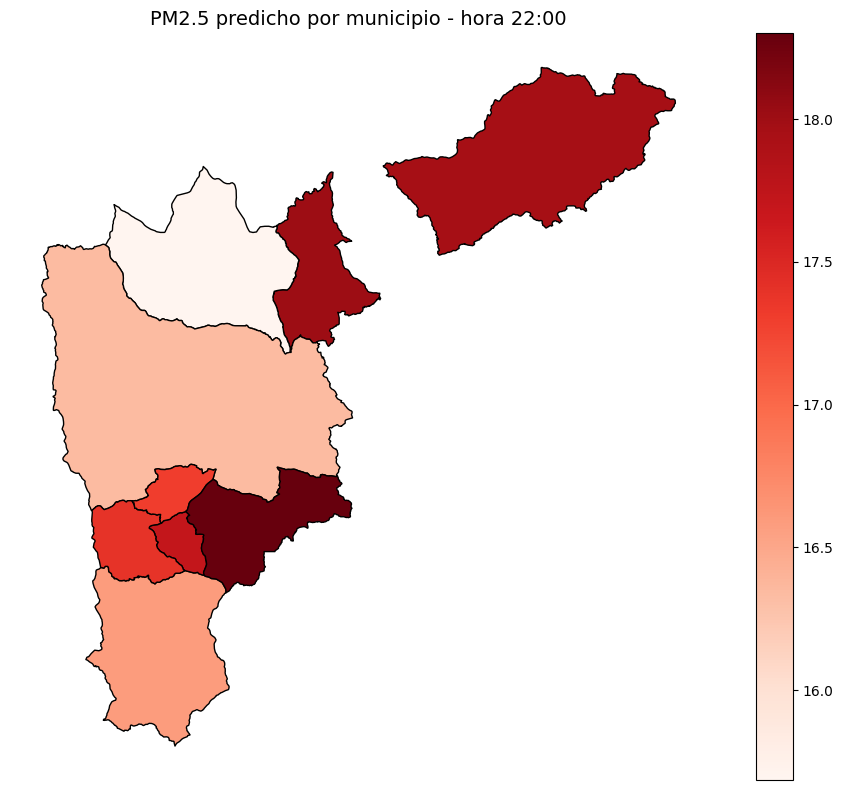

Generando mapa para la hora 23...


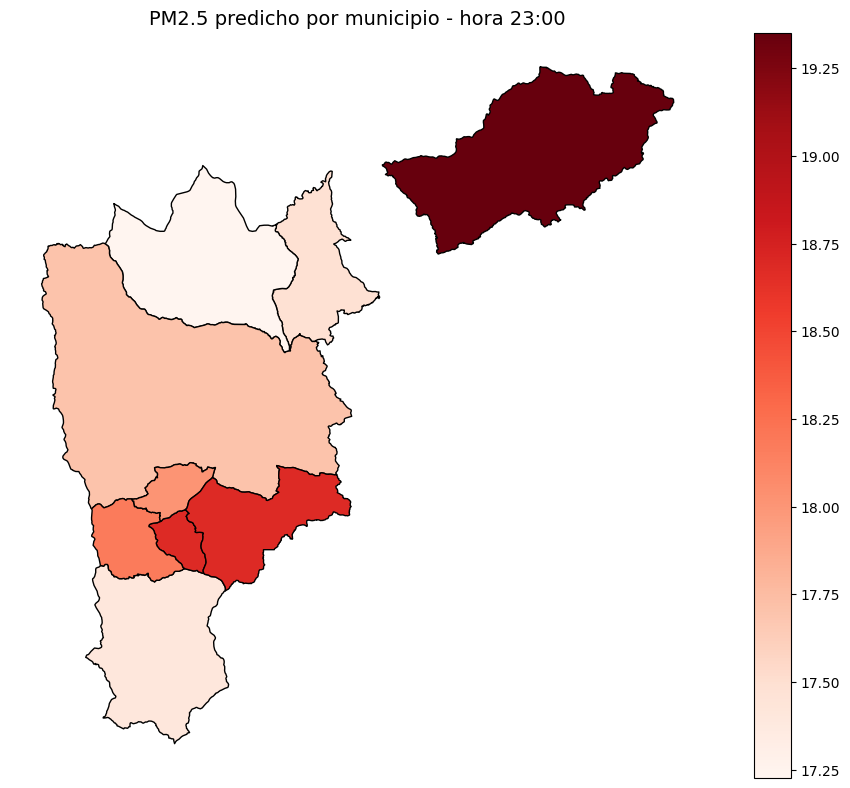

In [143]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Coeficientes del modelo
params = modelo_no_linear.params
intercepto = params['Intercept']
coef_temp = params['temperatura']
coef_temp2 = params['I(temperatura ** 2)']
coef_pp = params['pp_horaria']
coef_sin = params['sin_hora']
coef_sin2 = params['I(sin_hora ** 2)']

# 2. Preparar variables derivadas
df_model['temperatura_2'] = df_model['temperatura'] ** 2
df_model['sin_hora_2'] = df_model['sin_hora'] ** 2

# 3. Predecir log(pm25)
df_model['log_pm25_pred'] = (
    intercepto +
    coef_temp * df_model['temperatura'] +
    coef_temp2 * df_model['temperatura_2'] +
    coef_pp * df_model['pp_horaria'] +
    coef_sin * df_model['sin_hora'] +
    coef_sin2 * df_model['sin_hora_2']
)

# 4. Transformar a escala original
df_model['pm25_pred'] = np.exp(df_model['log_pm25_pred'])

# 5. Extraer la hora si no existe
if 'hora' not in df_model.columns:
    df_model['hora'] = pd.to_datetime(df_model['fecha_hora']).dt.hour

# 6. Convertir a GeoDataFrame
gdf_estaciones = gpd.GeoDataFrame(
    df_model,
    geometry=gpd.points_from_xy(df_model['Longitud'], df_model['Latitud']),
    crs="EPSG:4326"
)

# 7. Asegurar mismo CRS en municipios
municipios = municipios.to_crs("EPSG:4326")

# 8. Generar mapas por hora
for h in range(24):
    print(f"Generando mapa para la hora {h}...")

    # Filtrar estaciones para la hora actual
    gdf_hora = gdf_estaciones[gdf_estaciones['hora'] == h]

    if gdf_hora.empty:
        print(f"No hay datos para la hora {h}.")
        continue

    # Join espacial con municipios
    joined = gpd.sjoin(gdf_hora, municipios, how="inner", predicate="within")

    # Promediar por municipio
    pm25_por_mpio = joined.groupby("MPIO_NOMBR")["pm25_pred"].mean().reset_index()

    # Unir al GeoDataFrame de municipios
    gdf_municipios = municipios.merge(pm25_por_mpio, on="MPIO_NOMBR", how="left")

    # Graficar
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_municipios.plot(
        column="pm25_pred",
        cmap="Reds",
        edgecolor="black",
        legend=True,
        ax=ax
    )
    ax.set_title(f"PM2.5 predicho por municipio - hora {h}:00", fontsize=14)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

    # Opcional: guardar imagen
    # plt.savefig(f"pm25_pred_municipios_hora_{h:02d}.png", dpi=300)
    # plt.close()


In [311]:
joined

Unnamed: 0  Codigo  hora       pm25  pp_horaria  temperatura  log_pm25  \
0             0      12     1  28.026581    0.294968    19.163871  3.336715   
24           24      38     1  19.645071    1.828800    16.919106  2.982904   
48           48      69     1  18.429572    0.387048    16.352312  2.919368   
72           72      78     1  16.121382    1.745226    17.124831  2.786330   
96           96      79     1  20.597247    0.491613    16.658876  3.030001   
120         120      80     1  18.912116    0.196645    16.818038  2.945076   
144         144      81     1  12.646820    0.213032    18.516828  2.545282   
168         168      82     1  15.499978    0.378710    18.433441  2.747269   
192         192      83     1  23.354189    0.491613    16.658876  3.155049   
216         216      84     1  17.158833    0.229419    17.315774  2.848324   
240         240      85     1  15.394044    0.680065    16.658876  2.740456   
264         264      87     1  15.622974    0.311355    17.483860  2.755123   
288         288      88     1  14.849760    1.006929    18.494860  2.704695   
312         312      90     1  16.573817    1.745226    17.797177  2.813840   
336         336      94     1  10.017466    0.196645    11.912419  2.314263   

     sin_hora  cos_hora  pm25_boxcox  ...  Latitud  Ciudad_left  \
0    0.258819  0.965926     2.310851  ...  6.25256     Medellin   
24   0.258819  0.965926     2.142716  ...  6.16850       Itagüí   
48   0.258819  0.965926     2.111011  ...  6.09308       Caldas   
72   0.258819  0.965926     2.043067  ...  6.15553  La Estrella   
96   0.258819  0.965926     2.165914  ...  6.22189     Medellin   
120  0.258819  0.965926     2.123897  ...  6.25891     Medellin   
144  0.258819  0.965926     1.914403  ...  6.43696      Barbosa   
168  0.258819  0.965926     2.022710  ...  6.34536   Copacabana   
192  0.258819  0.965926     2.226272  ...  6.23723     Medellin   
216  0.258819  0.965926     2.074993  ...  6.19987     Medellin   
240  0.258819  0.965926     2.019140  ...  6.27785     Medellin   
264  0.258819  0.965926     2.026818  ...  6.33755        Bello   
288  0.258819  0.965926     2.000308  ...  6.16868     Envigado   
312  0.258819  0.965926     2.057291  ...  6.14550     Sabaneta   
336  0.258819  0.965926     1.784043  ...  6.23636     Medellín   

                      geometry  index_right COD_MPIO  Ciudad_right  \
0    POINT (-75.56958 6.25256)           95    05001      Medellín   
24    POINT (-75.64436 6.1685)           98    05360        Itagüí   
48   POINT (-75.63776 6.09308)            5    05129        Caldas   
72   POINT (-75.64417 6.15553)           96    05380   La Estrella   
96    POINT (-75.6106 6.22189)           95    05001      Medellín   
120  POINT (-75.54826 6.25891)           95    05001      Medellín   
144   POINT (-75.3304 6.43696)           29    05079       Barbosa   
168  POINT (-75.50475 6.34536)           25    05212    Copacabana   
192  POINT (-75.61047 6.23723)           95    05001      Medellín   
216  POINT (-75.56095 6.19987)           95    05001      Medellín   
240  POINT (-75.63643 6.27785)           95    05001      Medellín   
264   POINT (-75.5678 6.33755)           58    05088         Bello   
288  POINT (-75.58197 6.16868)           99    05266      Envigado   
312   POINT (-75.62126 6.1455)            9    05631      Sabaneta   
336  POINT (-75.49847 6.23636)           95    05001      Medellín   

           SUBREGION ALERTA DESCRIPCI  SymbolID  
0    VALLE DE ABURRA      0      None      None  
24   VALLE DE ABURRA      0      None      None  
48   VALLE DE ABURRA      0      None      None  
72   VALLE DE ABURRA      0      None      None  
96   VALLE DE ABURRA      0      None      None  
120  VALLE DE ABURRA      0      None      None  
144  VALLE DE ABURRA      0      None      None  
168  VALLE DE ABURRA      0      None      None  
192  VALLE DE ABURRA      0      None      None  
216  VALLE DE ABURRA      0      None      Non

Generando mapa para la hora 0...
No hay datos para la hora 0.
Generando mapa para la hora 1...


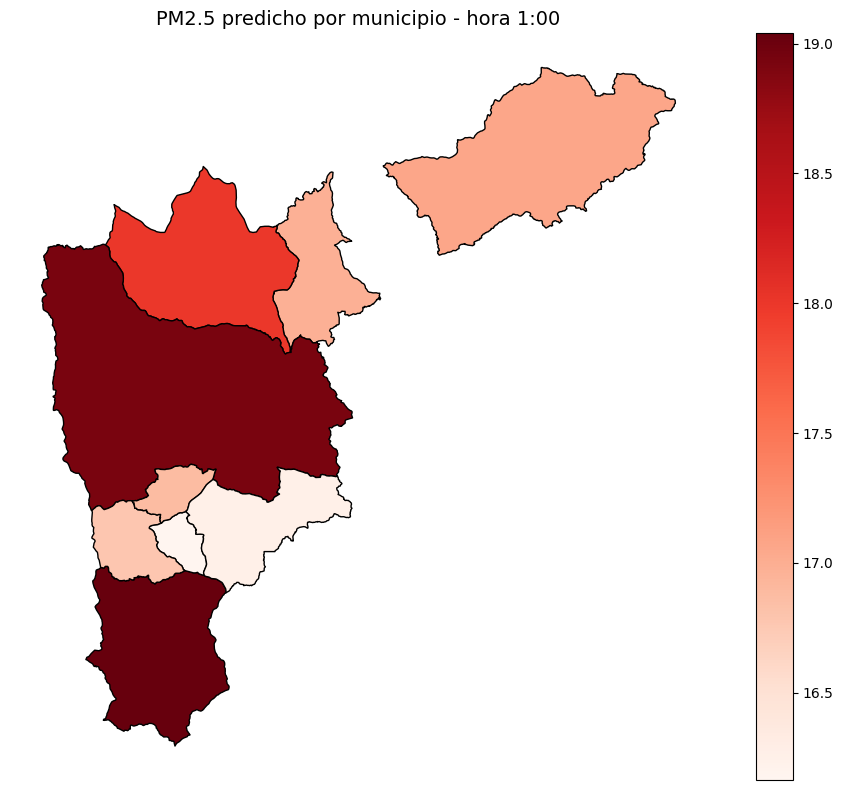

Generando mapa para la hora 2...


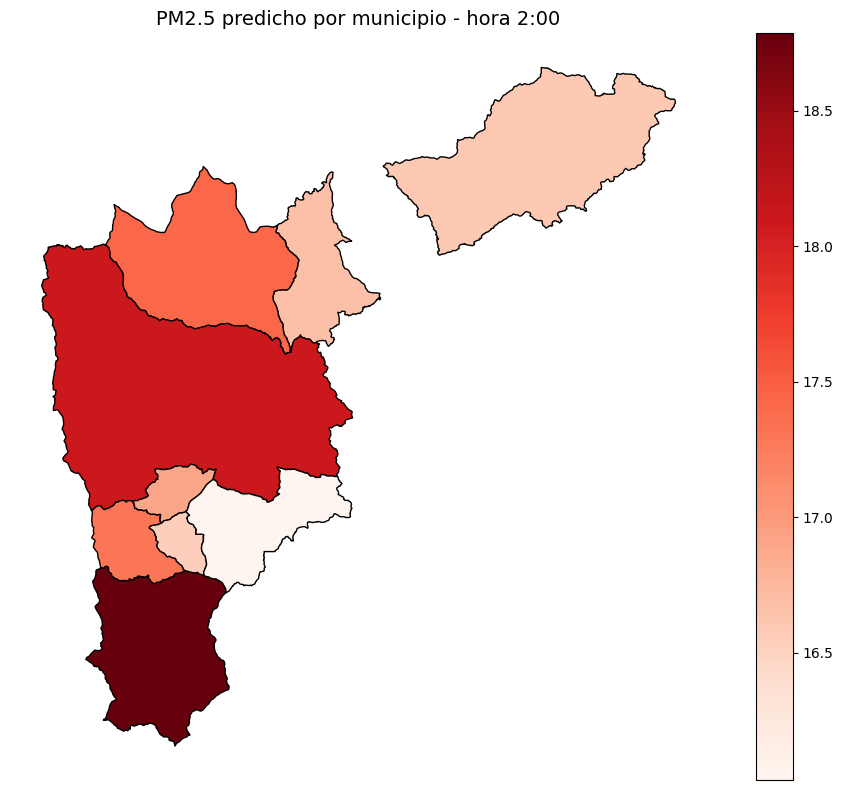

Generando mapa para la hora 3...


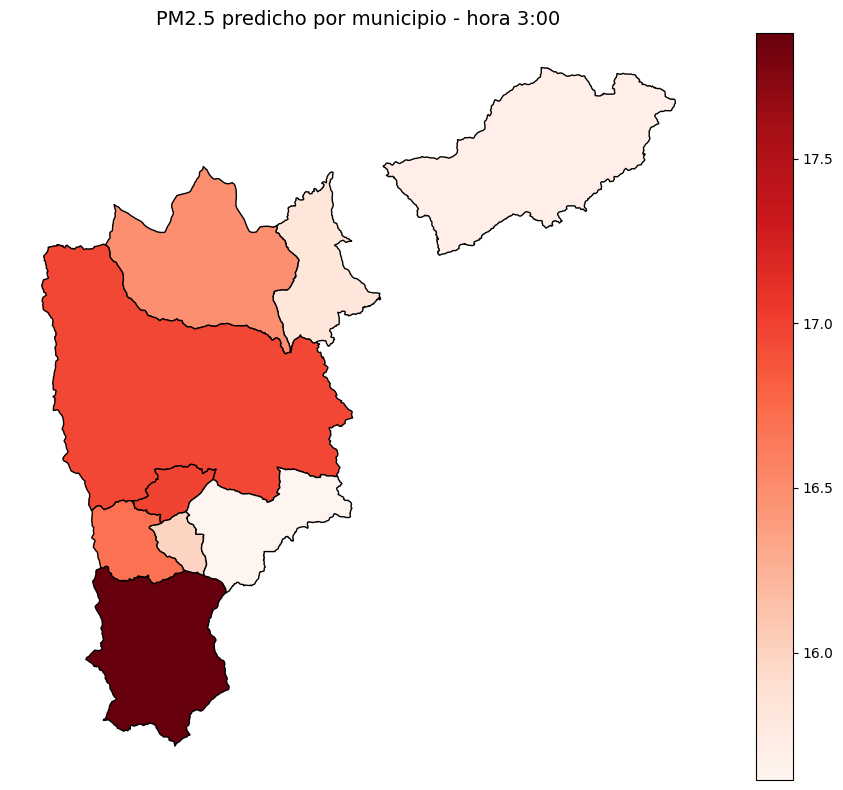

Generando mapa para la hora 4...


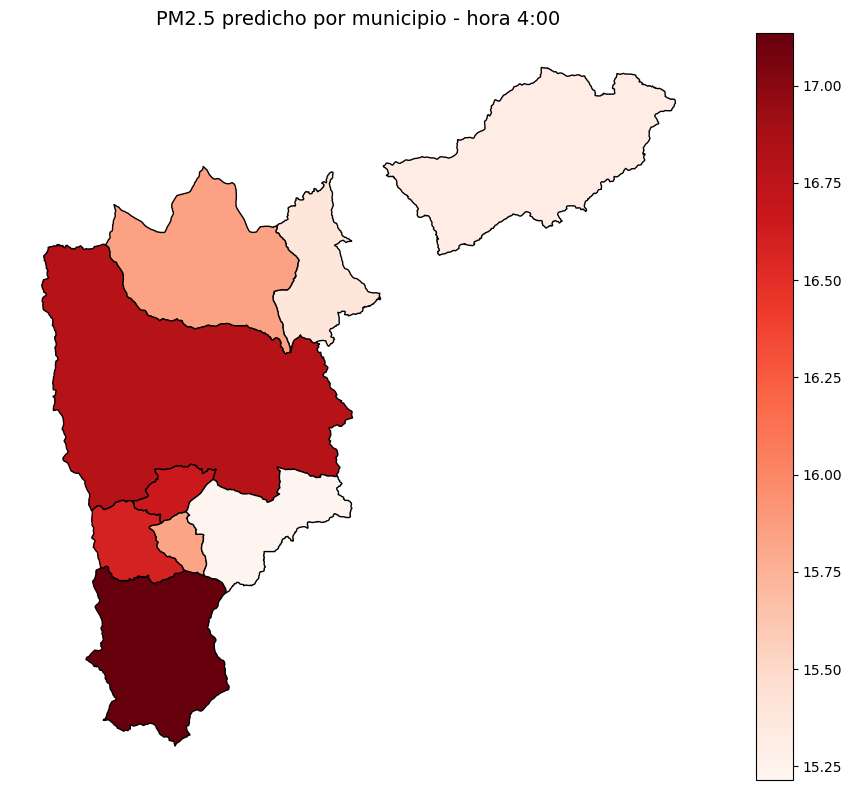

Generando mapa para la hora 5...


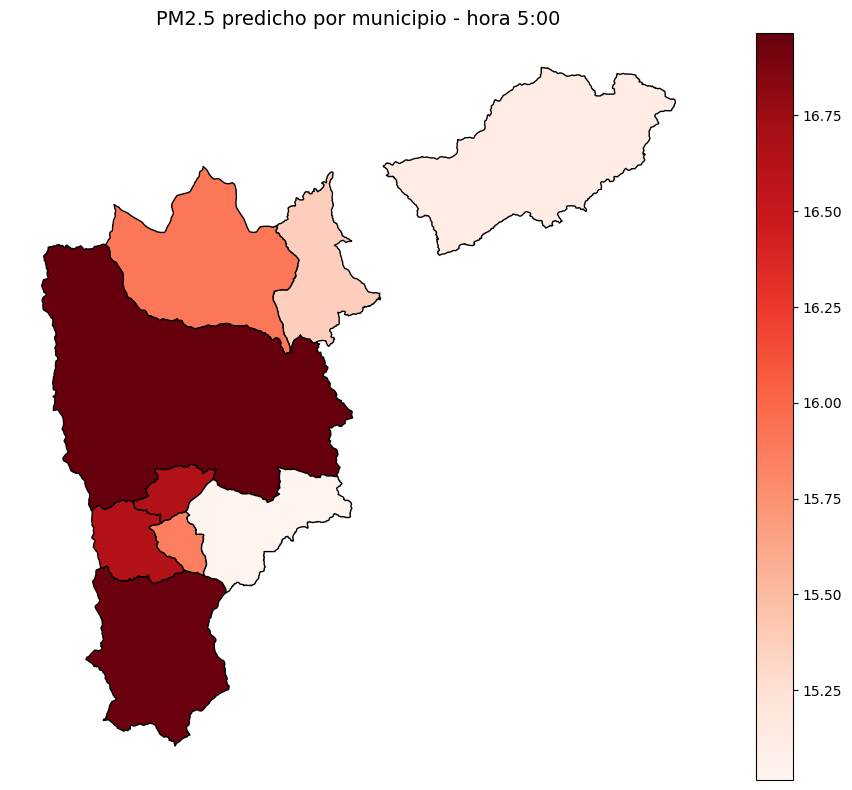

Generando mapa para la hora 6...


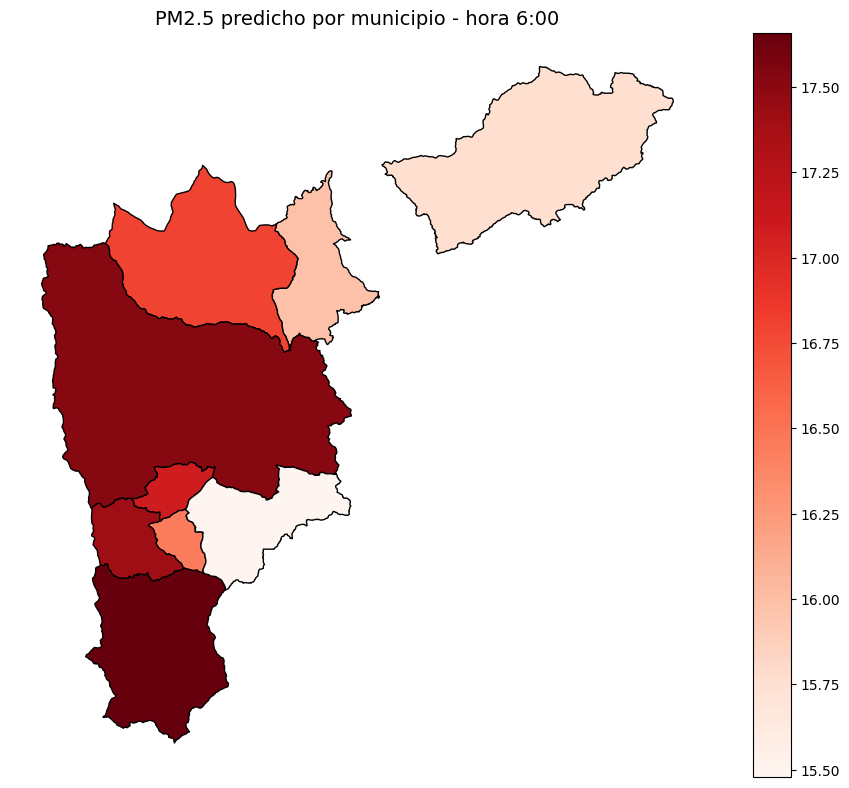

Generando mapa para la hora 7...


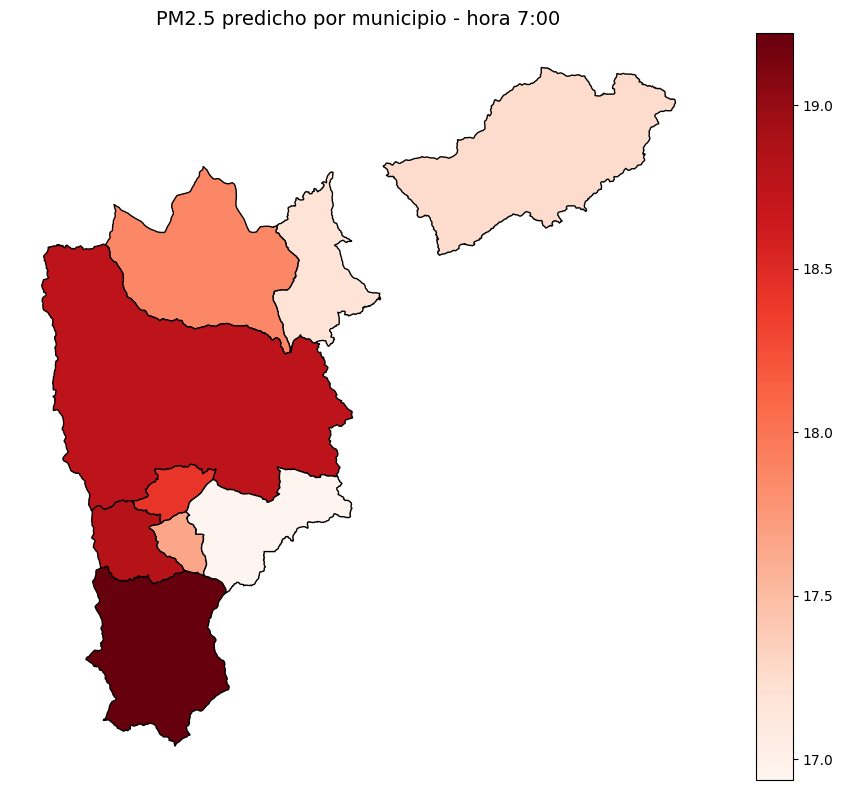

Generando mapa para la hora 8...


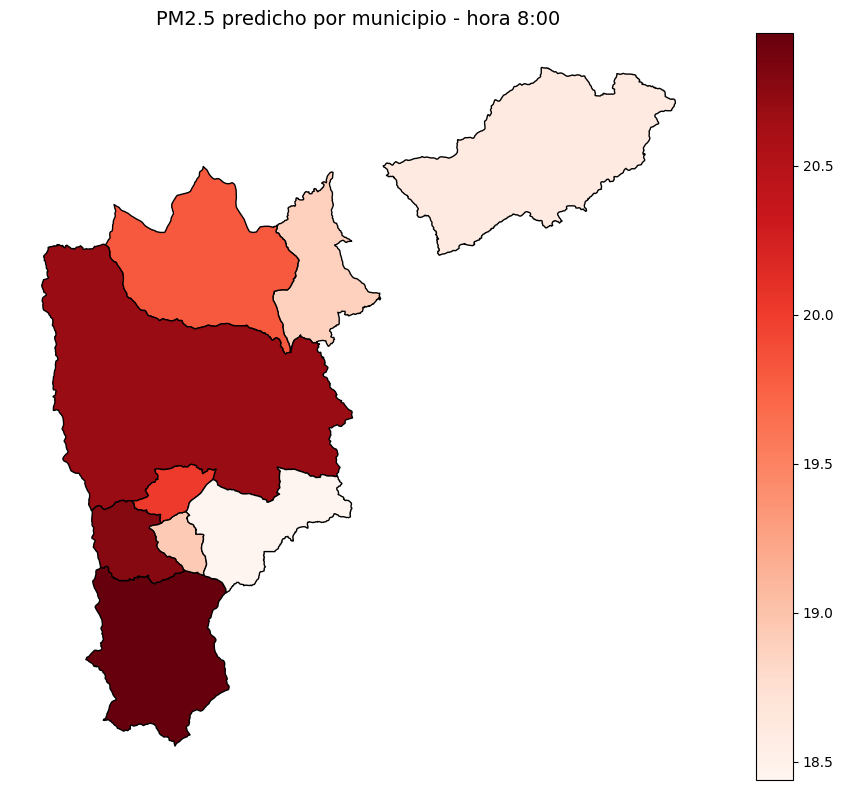

Generando mapa para la hora 9...


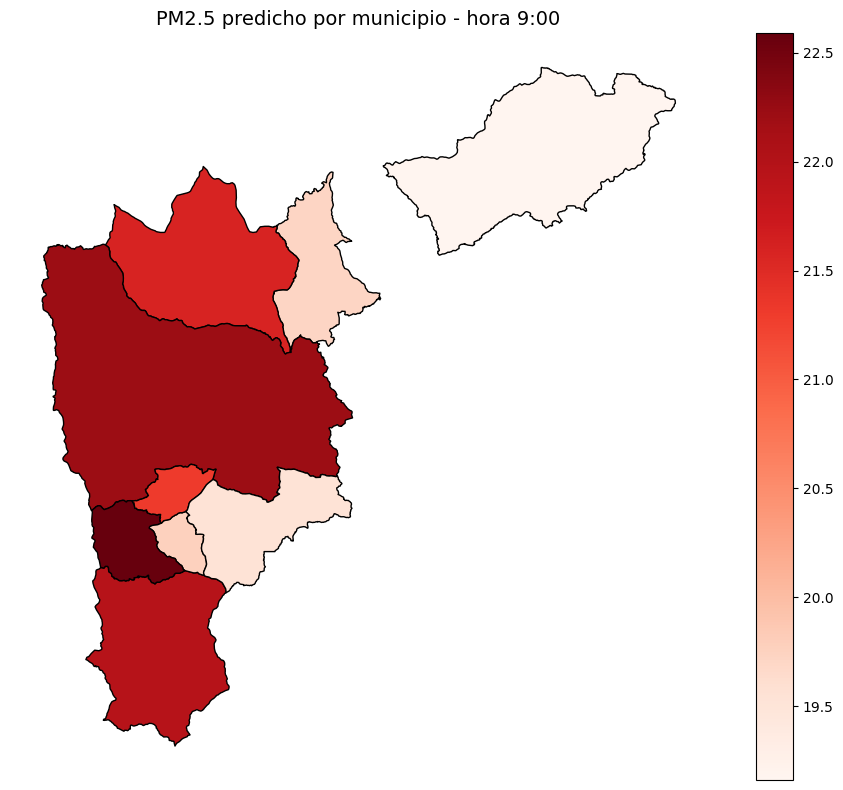

Generando mapa para la hora 10...


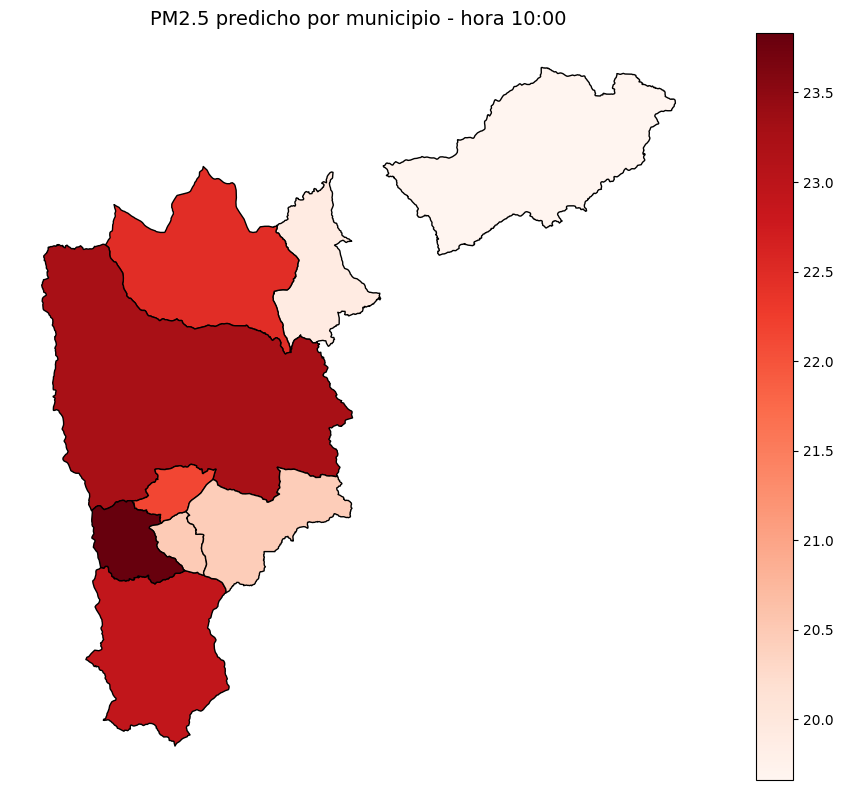

Generando mapa para la hora 11...


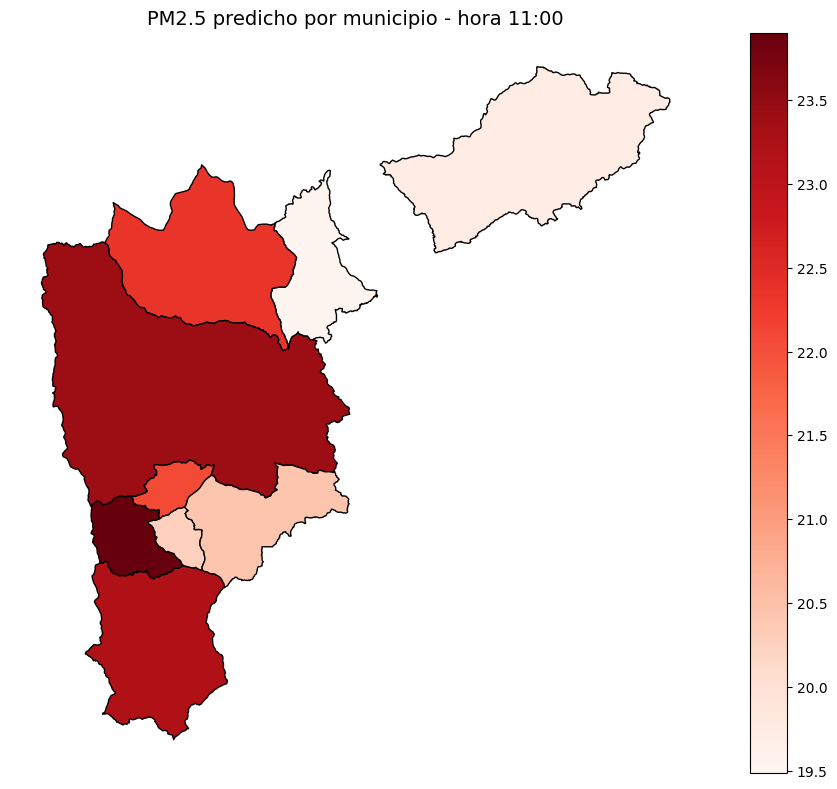

Generando mapa para la hora 12...


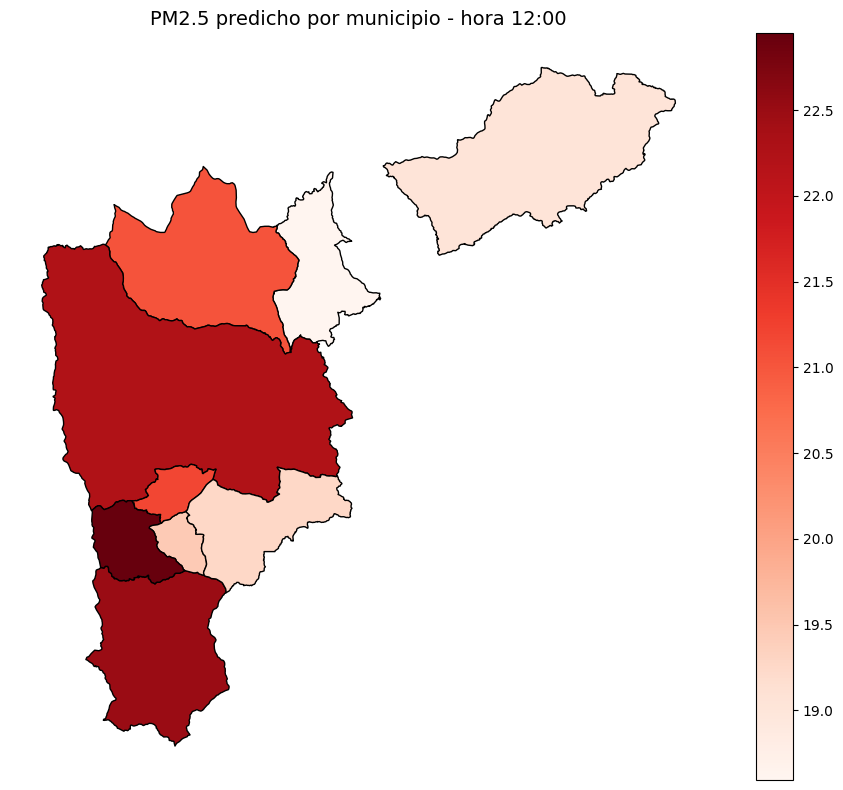

Generando mapa para la hora 13...


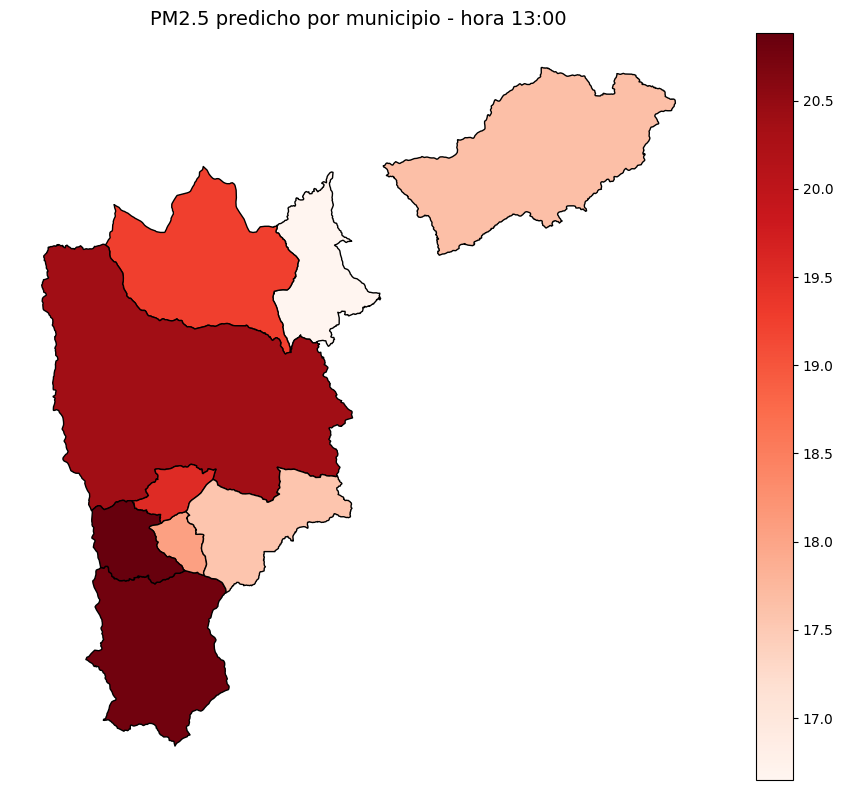

Generando mapa para la hora 14...


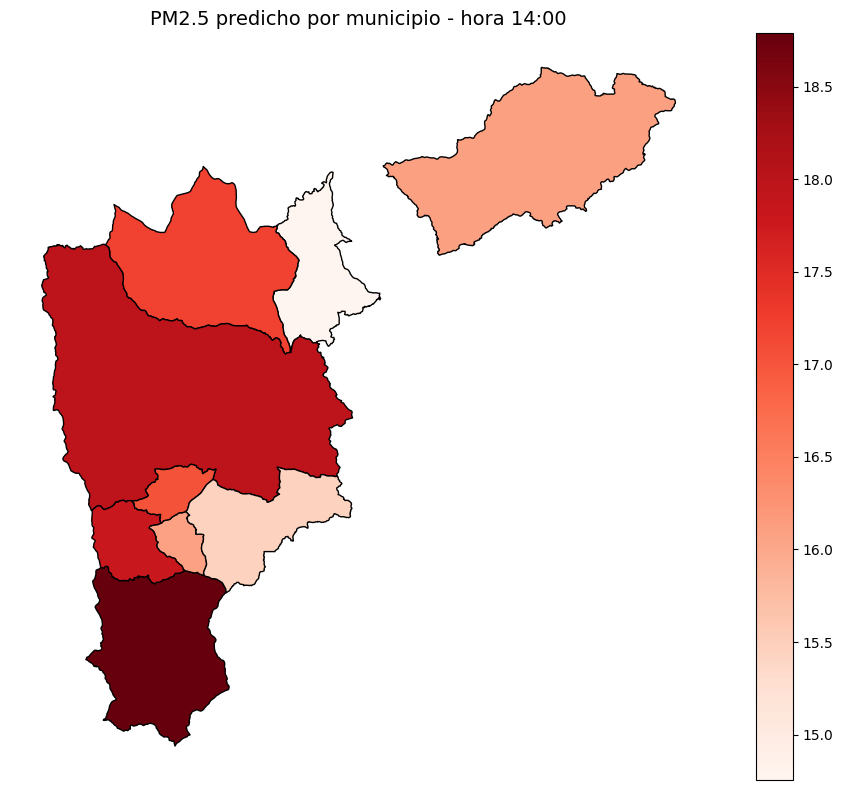

Generando mapa para la hora 15...


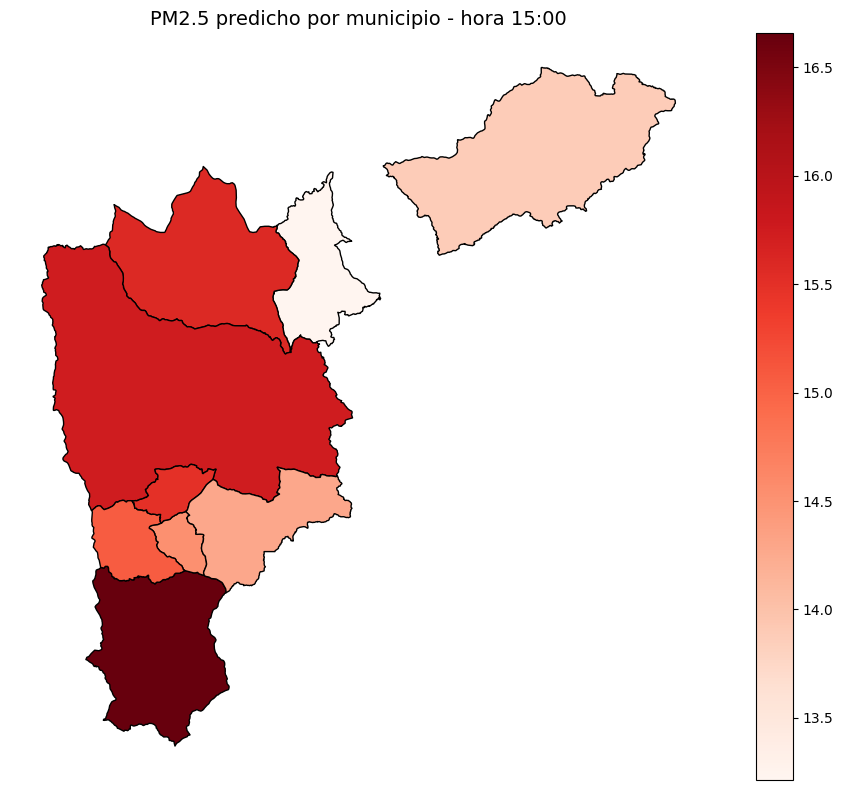

Generando mapa para la hora 16...


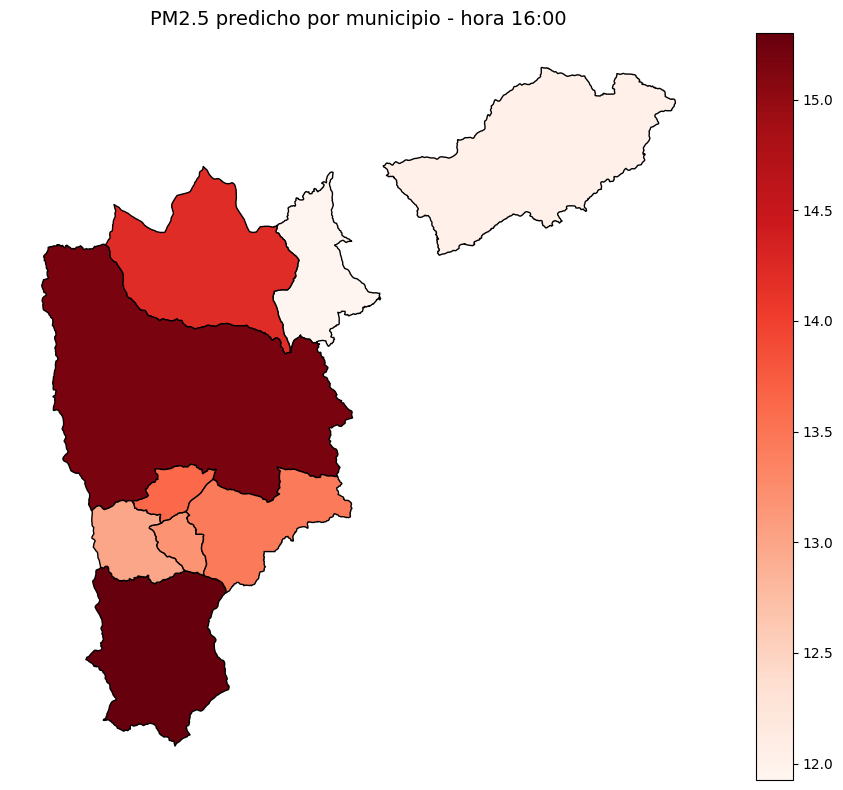

Generando mapa para la hora 17...


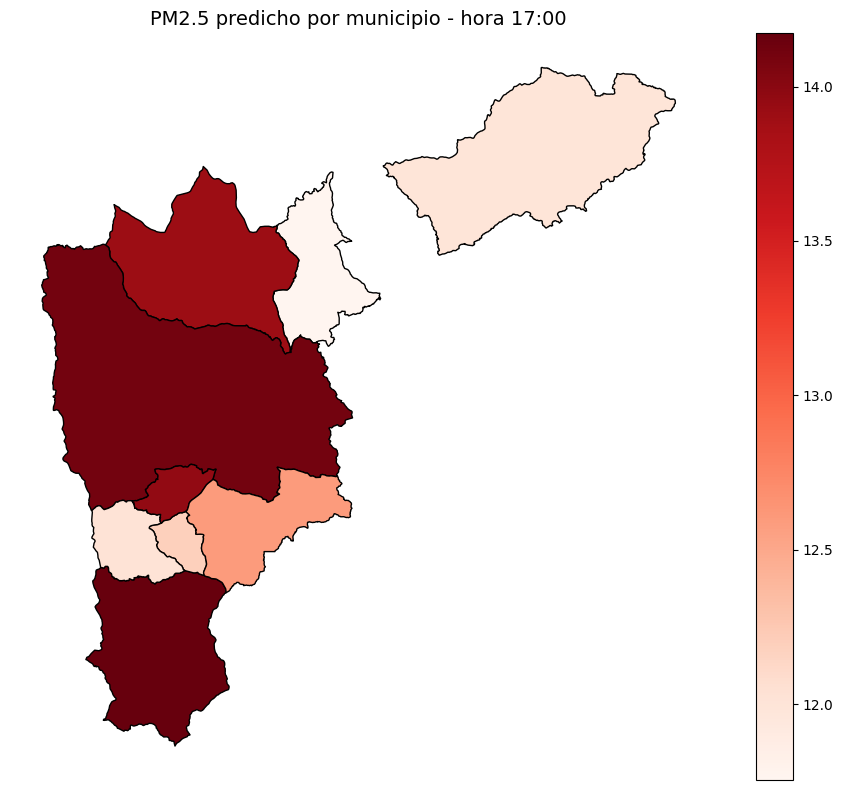

Generando mapa para la hora 18...


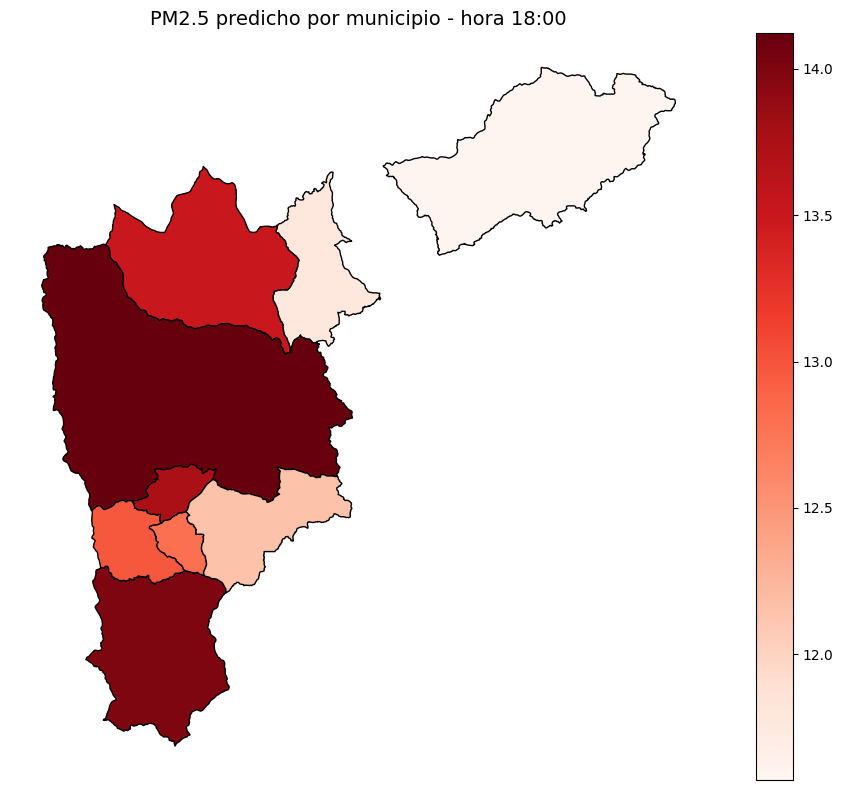

Generando mapa para la hora 19...


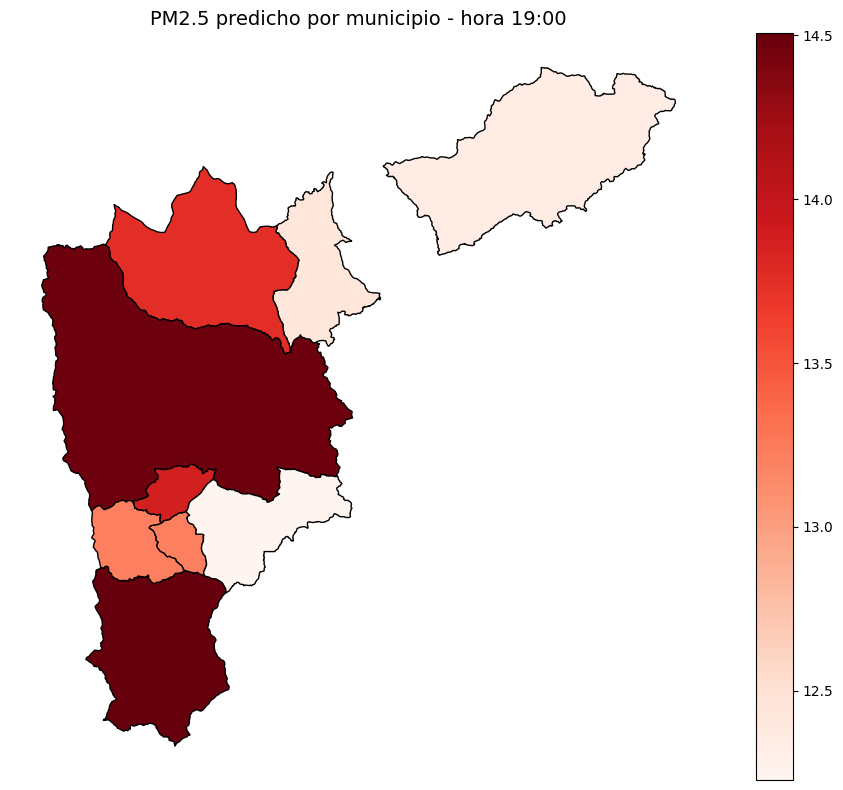

Generando mapa para la hora 20...


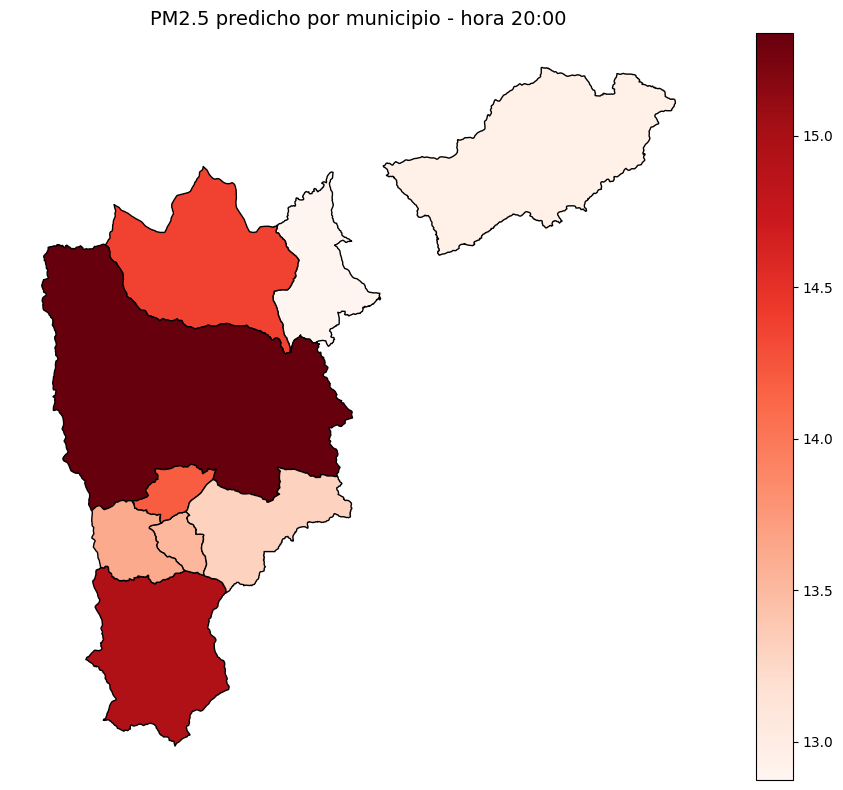

Generando mapa para la hora 21...


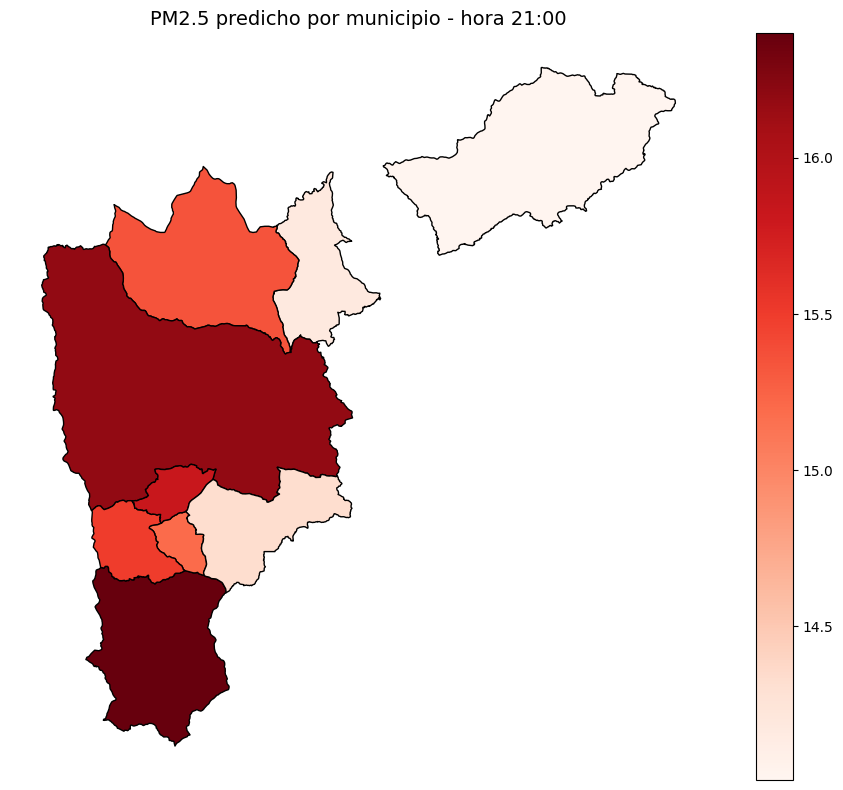

Generando mapa para la hora 22...


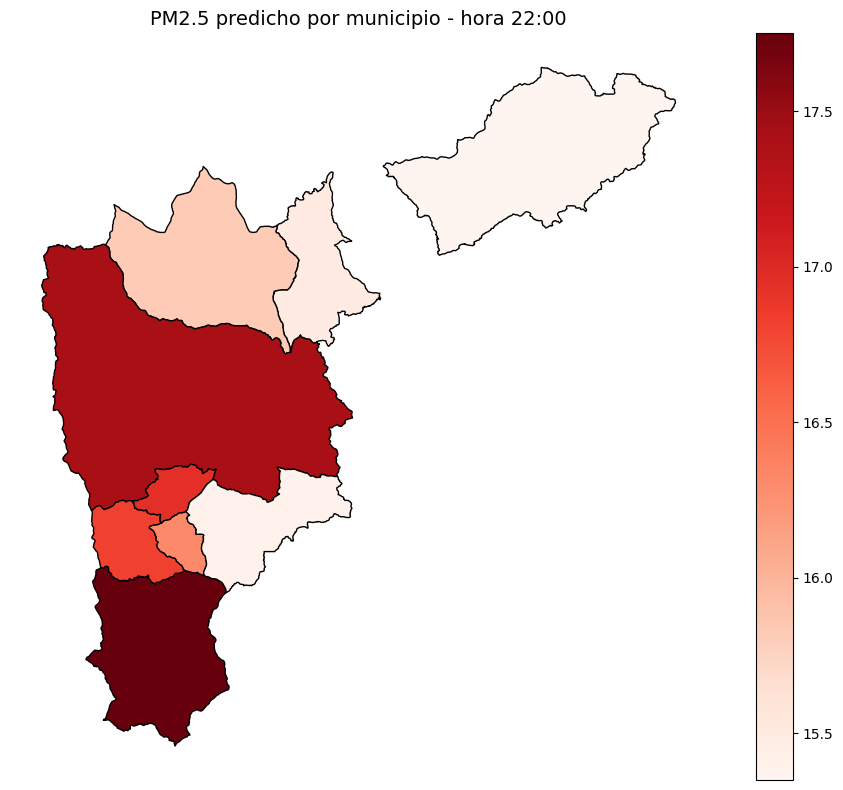

Generando mapa para la hora 23...


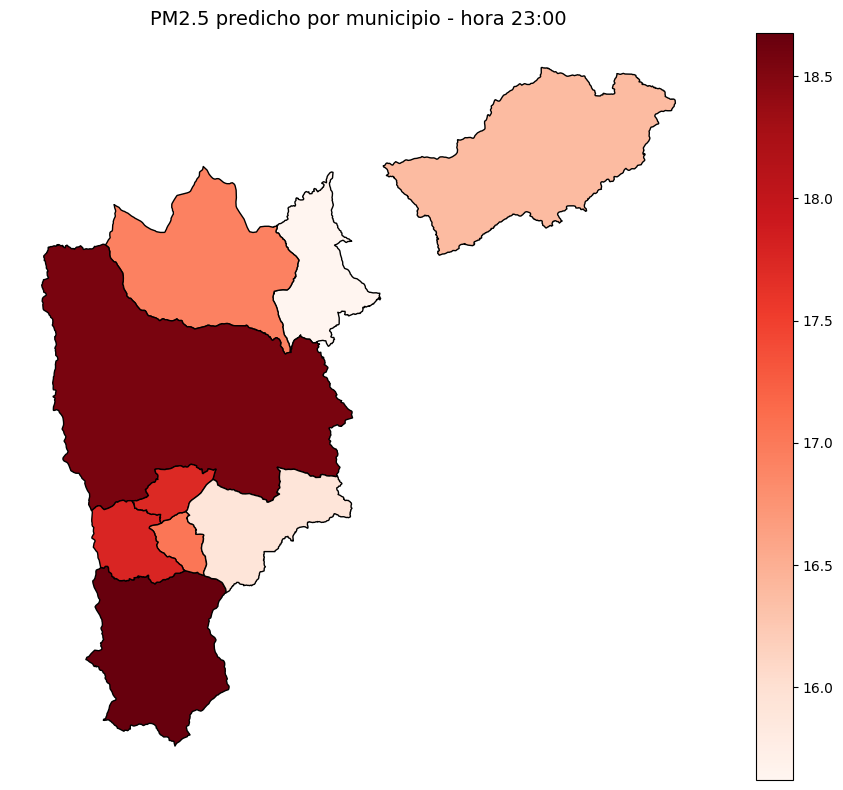

In [316]:
# 1. Coeficientes del modelo
params = modelo_no_linear1.params
intercepto = params['Intercept']
coef_temp2 = params['I(temperatura ** 2)']
coef_pp = params['pp_horaria']
coef_cos = params['cos_hora']
coef_sin2 = params['I(sin_hora ** 2)']

# 2. Preparar variables derivadas
df_model['temperatura_2'] = df_model['temperatura'] ** 2
df_model['sin_hora_2'] = df_model['sin_hora'] ** 2
df_model['cos_hora'] = np.cos(2 * np.pi * df_model['hora'] / 24)

# 3. Predecir log(pm25)
df_model['log_pm25_pred'] = (
    intercepto +
    coef_temp2 * df_model['temperatura_2'] +
    coef_pp * df_model['pp_horaria'] +
    coef_cos * df_model['cos_hora'] +
    coef_sin2 * df_model['sin_hora_2']
)

# 4. Transformar a escala original
df_model['pm25_pred'] = np.exp(df_model['log_pm25_pred'])

# 5. Extraer la hora si no existe
if 'hora' not in df_model.columns:
    df_model['hora'] = pd.to_datetime(df_model['fecha_hora']).dt.hour

# 6. Convertir a GeoDataFrame
gdf_estaciones = gpd.GeoDataFrame(
    df_model,
    geometry=gpd.points_from_xy(df_model['Longitud'], df_model['Latitud']),
    crs="EPSG:4326"
)

# 7. Asegurar mismo CRS en municipios
municipios = municipios.to_crs("EPSG:4326")

# 8. Generar mapas por hora
for h in range(24):
    print(f"Generando mapa para la hora {h}...")

    # Filtrar estaciones para la hora actual
    gdf_hora = gdf_estaciones[gdf_estaciones['hora'] == h]

    if gdf_hora.empty:
        print(f"No hay datos para la hora {h}.")
        continue

    # Join espacial con municipios
    joined = gpd.sjoin(gdf_hora, municipios, how="inner", predicate="within")

    # Promediar por municipio
    pm25_por_mpio = joined.groupby("MPIO_NOMBR")["pm25_pred"].mean().reset_index()

    # Unir al GeoDataFrame de municipios
    gdf_municipios = municipios.merge(pm25_por_mpio, on="MPIO_NOMBR", how="left")

    # Graficar
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_municipios.plot(
        column="pm25_pred",
        cmap="Reds",
        edgecolor="black",
        legend=True,
        ax=ax
    )
    ax.set_title(f"PM2.5 predicho por municipio - hora {h}:00", fontsize=14)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

    # Opcional: guardar imagen
    # plt.savefig(f"pm25_pred_municipios_hora_{h:02d}.png", dpi=300)
    # plt.close()


In [81]:
#Estaciones pm2.5
dfmerged=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Trabajo3\datoshorsinprom.csv")
dfmerged

Unnamed: 0  Codigo                 Estacion  Longitud  Latitud  \
0               0      12  Estación Tráfico Centro -75.56958  6.25256   
1               1      12  Estación Tráfico Centro -75.56958  6.25256   
2               2      12  Estación Tráfico Centro -75.56958  6.25256   
3               3      12  Estación Tráfico Centro -75.56958  6.25256   
4               4      12  Estación Tráfico Centro -75.56958  6.25256   
...           ...     ...                      ...       ...      ...   
21867       21867      94   Medellín - Santa Elena -75.49847  6.23636   
21868       21868      94   Medellín - Santa Elena -75.49847  6.23636   
21869       21869      94   Medellín - Santa Elena -75.49847  6.23636   
21870       21870      94   Medellín - Santa Elena -75.49847  6.23636   
21871       21871      94   Medellín - Santa Elena -75.49847  6.23636   

         Ciudad                                      geometry  \
0      Medellin   POINT (-8412367.16506155 697417.4143991877)   
1      Medellin   POINT (-8412367.16506155 697417.4143991877)   
2      Medellin   POINT (-8412367.16506155 697417.4143991877)   
3      Medellin   POINT (-8412367.16506155 697417.4143991877)   
4      Medellin   POINT (-8412367.16506155 697417.4143991877)   
...         ...                                           ...   
21867  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21868  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21869  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21870  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21871  Medellín  POINT (-8404451.236071242 695603.2750998314)   

            fecha_hora      pm25  calidad_pm25  ...  calidad_rglobal_ssr  \
0        3/1/2022 0:00  19.00000           1.0  ...                    1   
1        3/1/2022 1:00  19.00000           1.0  ...                    1   
2        3/1/2022 4:00  13.00000           1.0  ...                    1   
3        3/1/2022 5:00  16.00000           1.0  ...                    1   
4        3/1/2022 6:00  22.00000           1.0  ...                    1   
...                ...       ...           ...  ...                  ...   
21867  3/31/2022 19:00  14.35600           1.0  ...                    1   
21868  3/31/2022 20:00  10.43100           1.0  ...                    1   
21869  3/31/2022 21:00   6.50444           1.0  ...                    1   
21870  3/31/2022 22:00   6.49727           1.0  ...                    1   
21871  3/31/2022 23:00  10.37060           1.0  ...                    1   

       taire10_ssr  calidad_taire10_ssr  vviento_ssr  calidad_vviento_ssr  \
0            -9999                    1        -9999                    1   
1            -9999                    1        -9999                    1   
2            -9999                    1        -9999                    1   
3            -9999                    1        -9999                    1   
4            -9999                    1        -9999                    1   
...            ...                  ...          ...                  ...   
21867        -9999                    1        -9999                    1   
21868        -9999                    1        -9999                    1   
21869        -9999                    1        -9999                    1   
21870        -9999                    1        -9999                    1   
21871        -9999                    1        -9999                    1   

       Codigo_calidad  Codigo_temp  Codigo_prec  temperatura  pp_horaria  
0                  12          419          434    17.860667       0.254  
1                  12          419          434    17.853500       0.000  
2                  12          419          434    17.651167       0.000  
3                  12          419          434    17.810333       0.000  
4                  12          419          434    17.995000       0.000  
...               ...          ...          ...          ... 

In [82]:
#modelo lineal generalizado , modelo mixto lineal, estación como efecto aleatorio
dfmerged['fecha_hora'] = pd.to_datetime(dfmerged['fecha_hora'])

In [83]:
#Temperatura
temperatura78=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Temperatura\faltantesest78.csv")
temperatura78

Unnamed: 0           fecha_hora  temperatura
0             0  2023-01-01 00:00:00    17.460000
1             1  2023-01-01 01:00:00    17.025000
2             2  2023-01-01 02:00:00    16.956667
3             3  2023-01-01 03:00:00    16.488333
4             4  2023-01-01 04:00:00    16.310000
..          ...                  ...          ...
740         740  2023-01-31 20:00:00    19.455000
741         741  2023-01-31 21:00:00    18.531667
742         742  2023-01-31 22:00:00    17.995000
743         743  2023-01-31 23:00:00    17.670000
744         744  2023-02-01 00:00:00          NaN

[745 rows x 3 columns]

In [84]:
dfmerged_sin_duplicados = dfmerged.drop_duplicates(subset=['Codigo', 'fecha_hora'])
dfmerged_sin_duplicados

Unnamed: 0  Codigo                 Estacion  Longitud  Latitud  \
0               0      12  Estación Tráfico Centro -75.56958  6.25256   
1               1      12  Estación Tráfico Centro -75.56958  6.25256   
2               2      12  Estación Tráfico Centro -75.56958  6.25256   
3               3      12  Estación Tráfico Centro -75.56958  6.25256   
4               4      12  Estación Tráfico Centro -75.56958  6.25256   
...           ...     ...                      ...       ...      ...   
21140       21140      94   Medellín - Santa Elena -75.49847  6.23636   
21141       21141      94   Medellín - Santa Elena -75.49847  6.23636   
21142       21142      94   Medellín - Santa Elena -75.49847  6.23636   
21143       21143      94   Medellín - Santa Elena -75.49847  6.23636   
21144       21144      94   Medellín - Santa Elena -75.49847  6.23636   

         Ciudad                                      geometry  \
0      Medellin   POINT (-8412367.16506155 697417.4143991877)   
1      Medellin   POINT (-8412367.16506155 697417.4143991877)   
2      Medellin   POINT (-8412367.16506155 697417.4143991877)   
3      Medellin   POINT (-8412367.16506155 697417.4143991877)   
4      Medellin   POINT (-8412367.16506155 697417.4143991877)   
...         ...                                           ...   
21140  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21141  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21142  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21143  Medellín  POINT (-8404451.236071242 695603.2750998314)   
21144  Medellín  POINT (-8404451.236071242 695603.2750998314)   

               fecha_hora      pm25  calidad_pm25  ...  calidad_rglobal_ssr  \
0     2022-03-01 00:00:00  19.00000           1.0  ...                    1   
1     2022-03-01 01:00:00  19.00000           1.0  ...                    1   
2     2022-03-01 04:00:00  13.00000           1.0  ...                    1   
3     2022-03-01 05:00:00  16.00000           1.0  ...                    1   
4     2022-03-01 06:00:00  22.00000           1.0  ...                    1   
...                   ...       ...           ...  ...                  ...   
21140 2022-03-31 19:00:00  14.35600           1.0  ...                    1   
21141 2022-03-31 20:00:00  10.43100           1.0  ...                    1   
21142 2022-03-31 21:00:00   6.50444           1.0  ...                    1   
21143 2022-03-31 22:00:00   6.49727           1.0  ...                    1   
21144 2022-03-31 23:00:00  10.37060           1.0  ...                    1   

       taire10_ssr  calidad_taire10_ssr  vviento_ssr  calidad_vviento_ssr  \
0            -9999                    1        -9999                    1   
1            -9999                    1        -9999                    1   
2            -9999                    1        -9999                    1   
3            -9999                    1        -9999                    1   
4            -9999                    1        -9999                    1   
...            ...                  ...          ...                  ...   
21140        -9999                    1        -9999                    1   
21141        -9999                    1        -9999                    1   
21142        -9999                    1        -9999                    1   
21143        -9999                    1        -9999                    1   
21144        -9999                    1        -9999                    1   

       Codigo_calidad  Codigo_temp  Codigo_prec  temperatura  pp_horaria  
0                  12          419          434    17.860667       0.254  
1                  12          419          434    17.853500       0.000  
2                  12          419          434    17.651167       0.000  
3                  12          419          434    17.810333       0.000  
4                  12          419          434    17.995000       0.000  
...               ...    

In [85]:
#Temperatura
temperatura78=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Temperatura\faltantesest78.csv")
temperatura78

Unnamed: 0           fecha_hora  temperatura
0             0  2023-01-01 00:00:00    17.460000
1             1  2023-01-01 01:00:00    17.025000
2             2  2023-01-01 02:00:00    16.956667
3             3  2023-01-01 03:00:00    16.488333
4             4  2023-01-01 04:00:00    16.310000
..          ...                  ...          ...
740         740  2023-01-31 20:00:00    19.455000
741         741  2023-01-31 21:00:00    18.531667
742         742  2023-01-31 22:00:00    17.995000
743         743  2023-01-31 23:00:00    17.670000
744         744  2023-02-01 00:00:00          NaN

[745 rows x 3 columns]

In [86]:
temperatura78["fecha_hora"]=pd.to_datetime(temperatura78["fecha_hora"])

In [87]:
temperatura78['fecha_hora'] = temperatura78['fecha_hora'].apply(lambda x: x.replace(year=2022))
temperatura78['fecha_hora'] = temperatura78['fecha_hora'].apply(lambda x: x.replace(year=2022, month=3))

In [88]:
temperatura78

Unnamed: 0          fecha_hora  temperatura
0             0 2022-03-01 00:00:00    17.460000
1             1 2022-03-01 01:00:00    17.025000
2             2 2022-03-01 02:00:00    16.956667
3             3 2022-03-01 03:00:00    16.488333
4             4 2022-03-01 04:00:00    16.310000
..          ...                 ...          ...
740         740 2022-03-31 20:00:00    19.455000
741         741 2022-03-31 21:00:00    18.531667
742         742 2022-03-31 22:00:00    17.995000
743         743 2022-03-31 23:00:00    17.670000
744         744 2022-03-01 00:00:00          NaN

[745 rows x 3 columns]

In [90]:
df_78 = df_sin_duplicados[df_sin_duplicados['Codigo'] == 78].copy()
df_78['fecha_hora'] = pd.to_datetime(df_78['fecha_hora'])
temperatura78['fecha_hora'] = pd.to_datetime(temperatura78['fecha_hora'])
df_78_merged = pd.merge(df_78, temperatura78, on='fecha_hora', how='inner')
df_sin_duplicados_rest = df_sin_duplicados[df_sin_duplicados['Codigo'] != 78].copy()
df_final = pd.concat([df_sin_duplicados_rest, df_78_merged], ignore_index=True)
df_final

Unnamed: 0_x  Codigo                 Estacion  Longitud  Latitud  \
0                 0      12  Estación Tráfico Centro -75.56958  6.25256   
1                 0      12  Estación Tráfico Centro -75.56958  6.25256   
2                 1      12  Estación Tráfico Centro -75.56958  6.25256   
3                 2      12  Estación Tráfico Centro -75.56958  6.25256   
4                 3      12  Estación Tráfico Centro -75.56958  6.25256   
...             ...     ...                      ...       ...      ...   
10947          5094      78   La Estrella - Hospital -75.64417  6.15553   
10948          5095      78   La Estrella - Hospital -75.64417  6.15553   
10949          5096      78   La Estrella - Hospital -75.64417  6.15553   
10950          5097      78   La Estrella - Hospital -75.64417  6.15553   
10951          5098      78   La Estrella - Hospital -75.64417  6.15553   

            Ciudad                                      geometry  \
0         Medellin   POINT (-8412367.16506155 697417.4143991877)   
1         Medellin   POINT (-8412367.16506155 697417.4143991877)   
2         Medellin   POINT (-8412367.16506155 697417.4143991877)   
3         Medellin   POINT (-8412367.16506155 697417.4143991877)   
4         Medellin   POINT (-8412367.16506155 697417.4143991877)   
...            ...                                           ...   
10947  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
10948  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
10949  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
10950  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
10951  La Estrella  POINT (-8420670.485879822 686552.4504528062)   

               fecha_hora  pm25  calidad_pm25  ...  calidad_vviento_ssr  \
0     2022-03-01 00:00:00  19.0           1.0  ...                    1   
1     2022-03-01 00:00:00  19.0           1.0  ...                    1   
2     2022-03-01 01:00:00  19.0           1.0  ...                    1   
3     2022-03-01 04:00:00  13.0           1.0  ...                    1   
4     2022-03-01 05:00:00  16.0           1.0  ...                    1   
...                   ...   ...           ...  ...                  ...   
10947 2022-03-31 19:00:00  27.0           1.0  ...                    1   
10948 2022-03-31 20:00:00  29.0           1.0  ...                    1   
10949 2022-03-31 21:00:00  16.0           1.0  ...                    1   
10950 2022-03-31 22:00:00  12.0           1.0  ...                    1   
10951 2022-03-31 23:00:00  10.0           1.0  ...                    1   

       Codigo_calidad  Codigo_temp  Codigo_prec  temperatura_x  pp_horaria  \
0                  12          419          434      17.860667       0.254   
1                  12          419          434      17.860667       0.254   
2                  12          419          434      17.853500       0.000   
3                  12          419          434      17.651167       0.000   
4                  12          419          434      17.810333       0.000   
...               ...          ...          ...            ...         ...   
10947              78          635          481            NaN       0.254   
10948              78          635          481            NaN       0.000   
10949              78          635          481            NaN       0.762   
10950              78          635          481            NaN       1.524   
10951              78          635          481            NaN       3.302   

       Unnamed: 0_y  temperatura_y  Unnamed: 0  temperatura  
0                 0      17.460000         NaN          NaN  
1               744            NaN         NaN          NaN  
2                 1      17.025000         NaN          NaN  
3                 4      16.310000         NaN          NaN  
4                 5      15.863333         NaN          NaN  
...             ...            ...         ...          ...  
10947           7

In [107]:
dfmerged_sin_duplicados1=pd.merge(dfmerged_sin_duplicados,temperatura78,on="fecha_hora",how="inner")
dfmerged_sin_duplicados1

Unnamed: 0_x  Codigo                 Estacion  Longitud  Latitud  \
0                 0      12  Estación Tráfico Centro -75.56958  6.25256   
1                 0      12  Estación Tráfico Centro -75.56958  6.25256   
2                 0      12  Estación Tráfico Centro -75.56958  6.25256   
3                 0      12  Estación Tráfico Centro -75.56958  6.25256   
4                 1      12  Estación Tráfico Centro -75.56958  6.25256   
...             ...     ...                      ...       ...      ...   
10973         21140      94   Medellín - Santa Elena -75.49847  6.23636   
10974         21141      94   Medellín - Santa Elena -75.49847  6.23636   
10975         21142      94   Medellín - Santa Elena -75.49847  6.23636   
10976         21143      94   Medellín - Santa Elena -75.49847  6.23636   
10977         21144      94   Medellín - Santa Elena -75.49847  6.23636   

         Ciudad                                      geometry  \
0      Medellin   POINT (-8412367.16506155 697417.4143991877)   
1      Medellin   POINT (-8412367.16506155 697417.4143991877)   
2      Medellin   POINT (-8412367.16506155 697417.4143991877)   
3      Medellin   POINT (-8412367.16506155 697417.4143991877)   
4      Medellin   POINT (-8412367.16506155 697417.4143991877)   
...         ...                                           ...   
10973  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10974  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10975  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10976  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10977  Medellín  POINT (-8404451.236071242 695603.2750998314)   

               fecha_hora      pm25  calidad_pm25  ...  temperatura_x  \
0     2022-03-01 00:00:00  19.00000           1.0  ...      17.860667   
1     2022-03-01 00:00:00  19.00000           1.0  ...      17.860667   
2     2022-03-01 00:00:00  19.00000           1.0  ...      17.860667   
3     2022-03-01 00:00:00  19.00000           1.0  ...      17.860667   
4     2022-03-01 01:00:00  19.00000           1.0  ...      17.853500   
...                   ...       ...           ...  ...            ...   
10973 2022-03-31 19:00:00  14.35600           1.0  ...      12.689333   
10974 2022-03-31 20:00:00  10.43100           1.0  ...      12.501333   
10975 2022-03-31 21:00:00   6.50444           1.0  ...      12.276167   
10976 2022-03-31 22:00:00   6.49727           1.0  ...      12.011667   
10977 2022-03-31 23:00:00  10.37060           1.0  ...      10.782333   

       pp_horaria  Unnamed: 0_y  temperatura_y  log_pm25  hora  sin_hora  \
0           0.254             0      17.460000  2.949688     0  0.000000   
1           0.254             0      17.460000  2.949688     0  0.000000   
2           0.254           744            NaN  2.949688     0  0.000000   
3           0.254           744            NaN  2.949688     0  0.000000   
4           0.000             1      17.025000  2.949688     1  0.258819   
...           ...           ...            ...       ...   ...       ...   
10973       0.000           739      20.625000  2.671110    19 -0.965926   
10974       0.000           740      19.455000  2.354323    20 -0.866025   
10975       0.000           741      18.531667  1.887742    21 -0.707107   
10976       0.254           742      17.995000  1.886656    22 -0.500000   
10977       0.762           743      17.670000  2.348571    23 -0.258819   

       cos_hora  Unnamed: 0  temperatura  
0      1.000000           0    17.460000  
1      1.000000         744          NaN  
2      1.000000           0    17.460000  
3      1.000000         744          NaN  
4      0.965926           1    17.025000  
...         ...         ...          ...  
10973  0.258819         739    20.625000  
10974  0.500000         740    19.455000  
10975  0.707107         741    18.531667  
10976  0.866025         742    17.995000  
10977  0.965926         743    17.670000  

[10978 rows x 55 c

In [109]:
dfmerged_sin_duplicados=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Trabajo3\datoshorariosinpromfinal.csv")
dfmerged_sin_duplicados

Unnamed: 0  Unnamed: 0_x  Codigo                 Estacion  Longitud  \
0               0             0      12  Estación Tráfico Centro -75.56958   
1               1             0      12  Estación Tráfico Centro -75.56958   
2               2             1      12  Estación Tráfico Centro -75.56958   
3               3             2      12  Estación Tráfico Centro -75.56958   
4               4             3      12  Estación Tráfico Centro -75.56958   
...           ...           ...     ...                      ...       ...   
10945       10945         21140      94   Medellín - Santa Elena -75.49847   
10946       10946         21141      94   Medellín - Santa Elena -75.49847   
10947       10947         21142      94   Medellín - Santa Elena -75.49847   
10948       10948         21143      94   Medellín - Santa Elena -75.49847   
10949       10949         21144      94   Medellín - Santa Elena -75.49847   

       Latitud    Ciudad                                      geometry  \
0      6.25256  Medellin   POINT (-8412367.16506155 697417.4143991877)   
1      6.25256  Medellin   POINT (-8412367.16506155 697417.4143991877)   
2      6.25256  Medellin   POINT (-8412367.16506155 697417.4143991877)   
3      6.25256  Medellin   POINT (-8412367.16506155 697417.4143991877)   
4      6.25256  Medellin   POINT (-8412367.16506155 697417.4143991877)   
...        ...       ...                                           ...   
10945  6.23636  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10946  6.23636  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10947  6.23636  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10948  6.23636  Medellín  POINT (-8404451.236071242 695603.2750998314)   
10949  6.23636  Medellín  POINT (-8404451.236071242 695603.2750998314)   

            fecha_hora      pm25  ...  Codigo_calidad  Codigo_temp  \
0        3/1/2022 0:00  19.00000  ...              12          419   
1        3/1/2022 0:00  19.00000  ...              12          419   
2        3/1/2022 1:00  19.00000  ...              12          419   
3        3/1/2022 4:00  13.00000  ...              12          419   
4        3/1/2022 5:00  16.00000  ...              12          419   
...                ...       ...  ...             ...          ...   
10945  3/31/2022 19:00  14.35600  ...              94          355   
10946  3/31/2022 20:00  10.43100  ...              94          355   
10947  3/31/2022 21:00   6.50444  ...              94          355   
10948  3/31/2022 22:00   6.49727  ...              94          355   
10949  3/31/2022 23:00  10.37060  ...              94          355   

       Codigo_prec  temperatura  pp_horaria  Unnamed: 0_y  log_pm25  hora  \
0              434    17.860667       0.254             0  2.949688     0   
1              434    17.860667       0.254           744  2.949688     0   
2              434    17.853500       0.000             1  2.949688     1   
3              434    17.651167       0.000             4  2.572612     4   
4              434    17.810333       0.000             5  2.778819     5   
...            ...          ...         ...           ...       ...   ...   
10945           71    12.689333       0.000           739  2.671110    19   
10946           71    12.501333       0.000           740  2.354323    20   
10947           71    12.276167       0.000           741  1.887742    21   
10948           71    12.011667       0.254           742  1.886656    22   
10949           71    10.782333       0.762           743  2.348571    23   

       sin_hora  cos_hora  
0      0.000000  1.000000  
1      0.000000  1.000000  
2      0.258819  0.965926  
3      0.866025  0.500000  
4      0.965926  0.258819  
...         ...       ...  
10945 -0.965926  0.258819  
10946 -0.866025  0.500000  
10947 -0.707107  0.707107  
10948 -0.500000  0.866025  
10949 -0.258819  0.965926  

[10950 rows x 53 columns]

In [110]:
df_sin_duplicados.rename(columns={'temperatura_y': 'temperatura'}, inplace=True)


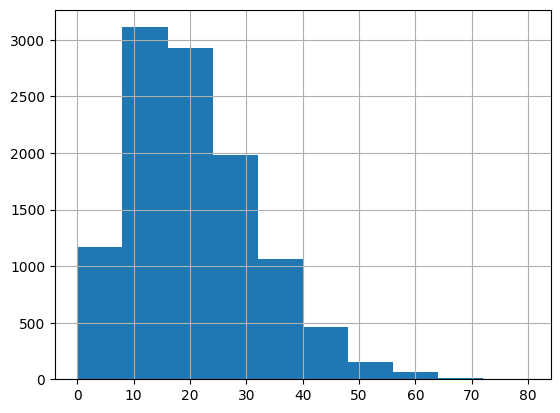

In [111]:
dfmerged_sin_duplicados['pm25'].hist()
plt.show()

In [112]:
dfmerged_sin_duplicados['log_pm25'] = np.log(dfmerged_sin_duplicados['pm25'] +0.1) 

In [144]:
dfmerged_sin_duplicados.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Codigo', 'Estacion', 'Longitud',
       'Latitud', 'Ciudad', 'geometry', 'fecha_hora', 'pm25', 'calidad_pm25',
       'pm10', 'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr', 'Codigo_calidad', 'Codigo_temp',
       'Codigo_prec', 'temperatura', 'pp_horaria', 'Unnamed: 0_y', 'log_pm25',
       'hora', 'sin_hora', 'cos_hora'],
      dtype='object')

In [100]:
dfmerged_sin_duplicados.columns

Index(['Unnamed: 0_x', 'Codigo', 'Estacion', 'Longitud', 'Latitud', 'Ciudad',
       'geometry', 'fecha_hora', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr', 'Codigo_calidad', 'Codigo_temp',
       'Codigo_prec', 'temperatura_x', 'pp_horaria', 'Unnamed: 0_y',
       'temperatura_y', 'log_pm25'],
      dtype='object')

In [96]:
print(78 in dfmerged_sin_duplicados['Codigo'].unique())  # → Debería dar True


True


In [106]:
df_78 = dfmerged_sin_duplicados[dfmerged_sin_duplicados['Codigo'] == 78]
df_78

Unnamed: 0_x  Codigo                Estacion  Longitud  Latitud  \
2193          4380      78  La Estrella - Hospital -75.64417  6.15553   
2194          4380      78  La Estrella - Hospital -75.64417  6.15553   
2195          4381      78  La Estrella - Hospital -75.64417  6.15553   
2196          4382      78  La Estrella - Hospital -75.64417  6.15553   
2197          4383      78  La Estrella - Hospital -75.64417  6.15553   
...            ...     ...                     ...       ...      ...   
2908          5094      78  La Estrella - Hospital -75.64417  6.15553   
2909          5095      78  La Estrella - Hospital -75.64417  6.15553   
2910          5096      78  La Estrella - Hospital -75.64417  6.15553   
2911          5097      78  La Estrella - Hospital -75.64417  6.15553   
2912          5098      78  La Estrella - Hospital -75.64417  6.15553   

           Ciudad                                      geometry  \
2193  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2194  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2195  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2196  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2197  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
...           ...                                           ...   
2908  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2909  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2910  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2911  La Estrella  POINT (-8420670.485879822 686552.4504528062)   
2912  La Estrella  POINT (-8420670.485879822 686552.4504528062)   

              fecha_hora  pm25  calidad_pm25  ...  Codigo_temp  Codigo_prec  \
2193 2022-03-01 00:00:00  23.0           1.0  ...          635          481   
2194 2022-03-01 00:00:00  23.0           1.0  ...          635          481   
2195 2022-03-01 01:00:00  20.0           1.0  ...          635          481   
2196 2022-03-01 02:00:00  15.0           1.0  ...          635          481   
2197 2022-03-01 03:00:00  22.0           1.0  ...          635          481   
...                  ...   ...           ...  ...          ...          ...   
2908 2022-03-31 19:00:00  27.0           1.0  ...          635          481   
2909 2022-03-31 20:00:00  29.0           1.0  ...          635          481   
2910 2022-03-31 21:00:00  16.0           1.0  ...          635          481   
2911 2022-03-31 22:00:00  12.0           1.0  ...          635          481   
2912 2022-03-31 23:00:00  10.0           1.0  ...          635          481   

      temperatura_x  pp_horaria  Unnamed: 0_y  temperatura_y  log_pm25  hora  \
2193            NaN       0.000             0      17.460000  3.139833     0   
2194            NaN       0.000           744            NaN  3.139833     0   
2195            NaN       0.000             1      17.025000  3.000720     1   
2196            NaN       0.762             2      16.956667  2.714695     2   
2197            NaN       1.270             3      16.488333  3.095578     3   
...             ...         ...           ...            ...       ...   ...   
2908            NaN       0.254           739      20.625000  3.299534    19   
2909            NaN       0.000           740      19.455000  3.370738    20   
2910            NaN       0.762           741      18.531667  2.778819    21   
2911            NaN       1.524           742      17.995000  2.493205    22   
2912            NaN       3.302           743      17.670000  2.312535    23   

      sin_hora  cos_hora  
2193  0.000000  1.000000  
2194  0.000000  1.000000  
2195  0.258819  0.965926  
2196  0.500000  0.866025  
2197  0.707107  0.707107  
...        ...       ...  
2908 -0.965926  0.258819  
2909 -0.866025  0.500000  
2910 -0.707107  0.707107  
2911 -0.500000  0.866025  
2912 -0.258819  0.965926  

[720 rows x 53 columns]

In [113]:
import statsmodels.formula.api as smf

# Variables cíclicas
dfmerged_sin_duplicados['hora'] = pd.to_datetime(dfmerged_sin_duplicados['fecha_hora']).dt.hour
dfmerged_sin_duplicados['sin_hora'] = np.sin(2 * np.pi * dfmerged_sin_duplicados['hora'] / 24)
dfmerged_sin_duplicados['cos_hora'] = np.cos(2 * np.pi *dfmerged_sin_duplicados['hora'] / 24)

# no tener NaNs en ninguna variable usada
variables_modelo = ['pm25', 'temperatura', 'pp_horaria', 'sin_hora', 'cos_hora', 'Codigo']
df_modelhor = dfmerged_sin_duplicados.dropna(subset=variables_modelo).copy()


In [61]:
df_modelhor.reset_index(drop=True, inplace=True)

In [114]:
md = smf.mixedlm(
    formula="pm25 ~ temperatura + pp_horaria + sin_hora + cos_hora",
    data=df_modelhor,
    groups=df_modelhor["Codigo"],
    re_formula="~ temperatura + pp_horaria"
)

mdf = md.fit()
print(mdf.summary())

C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      pm25       
No. Observations:       10462        Method:                  REML       
No. Groups:             15           Scale:                   101.6212   
Min. group size:        479          Log-Likelihood:          -39190.3024
Max. group size:        739          Converged:               No         
Mean group size:        697.5                                            
-------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------------
Intercept                     -0.146    7.288 -0.020 0.984 -14.430 14.138
temperatura                    1.125    2.175  0.517 0.605  -3.138  5.388
pp_horaria                    -0.167    2.150 -0.078 0.938  -4.381  4.047
sin_hora                       3.591    0.165 21.700 0.0

C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\SKop981040\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 24.352873
  warnings.warn(msg, ConvergenceWarning)
C:\Users\SKop981040\AppData\Local\Packages\Py

In [115]:
#vamos a mirar como se comporta cuadraticamente
import statsmodels.formula.api as smf

# Variables cíclicas
dfmerged_sin_duplicados['hora'] = pd.to_datetime(dfmerged_sin_duplicados['fecha_hora']).dt.hour
dfmerged_sin_duplicados['sin_hora'] = np.sin(2 * np.pi * dfmerged_sin_duplicados['hora'] / 24)
dfmerged_sin_duplicados['cos_hora'] = np.cos(2 * np.pi *dfmerged_sin_duplicados['hora'] / 24)

# no tener NaNs en ninguna variable usada
variables_modelo = ['log_pm25', 'temperatura', 'pp_horaria', 'sin_hora', 'cos_hora', 'Codigo']
df_modelhorc = dfmerged_sin_duplicados.dropna(subset=variables_modelo).copy()


In [116]:
# Añadir términos cuadráticos
modelo_no_linear1 = smf.mixedlm(
    formula="log_pm25 ~ temperatura + I(temperatura**2) + pp_horaria + sin_hora + I(sin_hora**2)",
    data=df_modelhorc,
    groups=df_modelhorc["Codigo"]
).fit()
print(modelo_no_linear1.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   log_pm25   
No. Observations:   10462     Method:               REML       
No. Groups:         15        Scale:                0.4233     
Min. group size:    479       Log-Likelihood:       -10400.2363
Max. group size:    739       Converged:            Yes        
Mean group size:    697.5                                      
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept           -2.806    0.240 -11.684 0.000 -3.276 -2.335
temperatura          0.540    0.023  22.987 0.000  0.494  0.586
I(temperatura ** 2) -0.012    0.001 -21.267 0.000 -0.013 -0.011
pp_horaria          -0.011    0.004  -2.872 0.004 -0.018 -0.003
sin_hora             0.193    0.010  19.405 0.000  0.174  0.213
I(sin_hora ** 2)    -0.086    0.019  -4.535 0.000 -0.

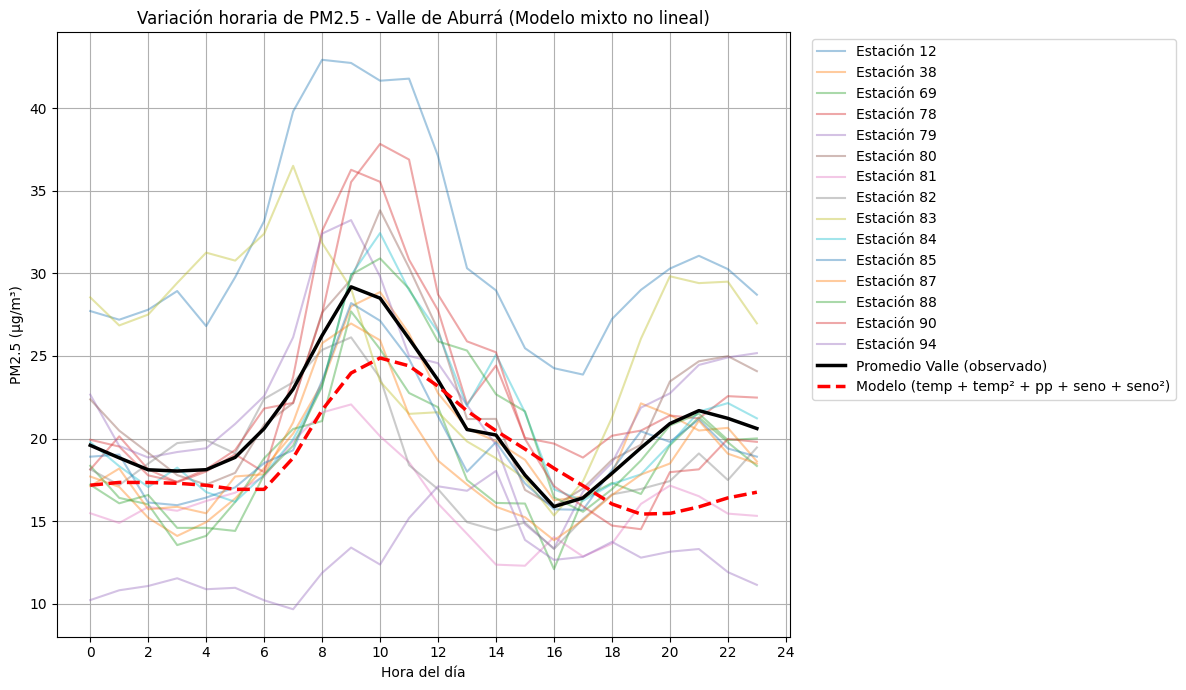

In [117]:

# 1. Extraer coeficientes del modelo ajustado
params = modelo_no_linear1.params
intercepto = params['Intercept']
coef_temp = params['temperatura']
coef_temp2 = params['I(temperatura ** 2)']
coef_pp = params['pp_horaria']
coef_sin = params['sin_hora']
coef_sin2 = params['I(sin_hora ** 2)']

# 2. Calcular promedios por hora a partir de df_model
promedios_hora = df_modelhorc.groupby('hora')[['temperatura', 'pp_horaria']].mean().reset_index()

# 3. Calcular seno y seno² de la hora
promedios_hora['sin_hora'] = np.sin(2 * np.pi * promedios_hora['hora'] / 24)
promedios_hora['sin_hora_2'] = promedios_hora['sin_hora'] ** 2
promedios_hora['temperatura_2'] = promedios_hora['temperatura'] ** 2

# 4. Calcular predicción en log(PM2.5)
promedios_hora['log_pm25_pred'] = (
    intercepto +
    coef_temp * promedios_hora['temperatura'] +
    coef_temp2 * promedios_hora['temperatura_2'] +
    coef_pp * promedios_hora['pp_horaria'] +
    coef_sin * promedios_hora['sin_hora'] +
    coef_sin2 * promedios_hora['sin_hora_2']
)

# 5. Convertir a escala original: PM2.5
promedios_hora['pm25_modelado'] = np.exp(promedios_hora['log_pm25_pred'])

# 6. Crear figura
plt.figure(figsize=(12, 7))

# 7. Graficar líneas por estación (observado)
for cod, grupo in df_modelhorc.groupby("Codigo"):
    promedio_hora_est = grupo.groupby("hora")["pm25"].mean()
    plt.plot(promedio_hora_est.index, promedio_hora_est.values, alpha=0.4, label=f'Estación {cod}')

# 8. Línea negra: promedio observado total
prom_total = df_modelhorc.groupby("hora")["pm25"].mean()
plt.plot(prom_total.index, prom_total.values, color='black', linewidth=2.5, label="Promedio Valle (observado)")

# 9. Línea roja: modelo
plt.plot(promedios_hora['hora'], promedios_hora['pm25_modelado'],
         linestyle='--', color='red', linewidth=2.5,
         label="Modelo (temp + temp² + pp + seno + seno²)")

# 10. Formato gráfico
plt.title("Variación horaria de PM2.5 - Valle de Aburrá (Modelo mixto no lineal)")
plt.xlabel("Hora del día")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(range(0, 25, 2))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



Generando mapa para la hora 0...


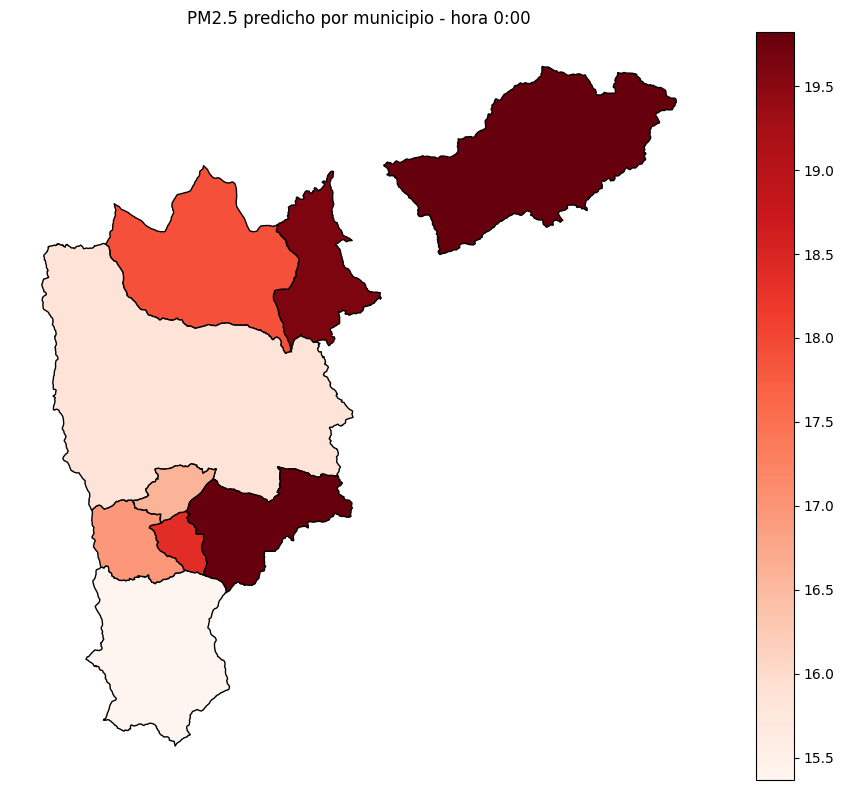

Generando mapa para la hora 1...


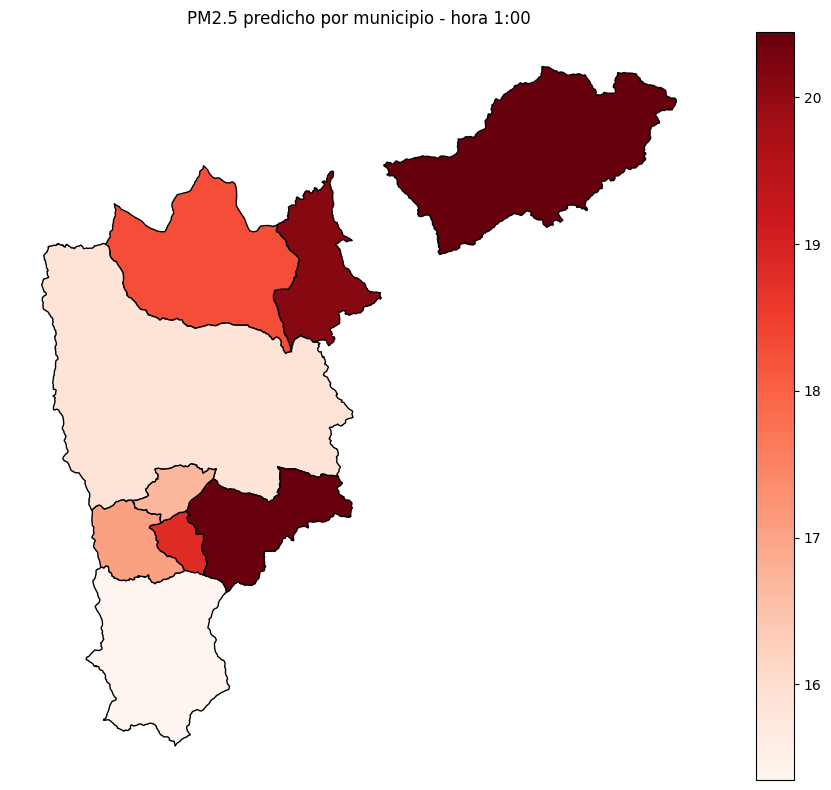

Generando mapa para la hora 2...


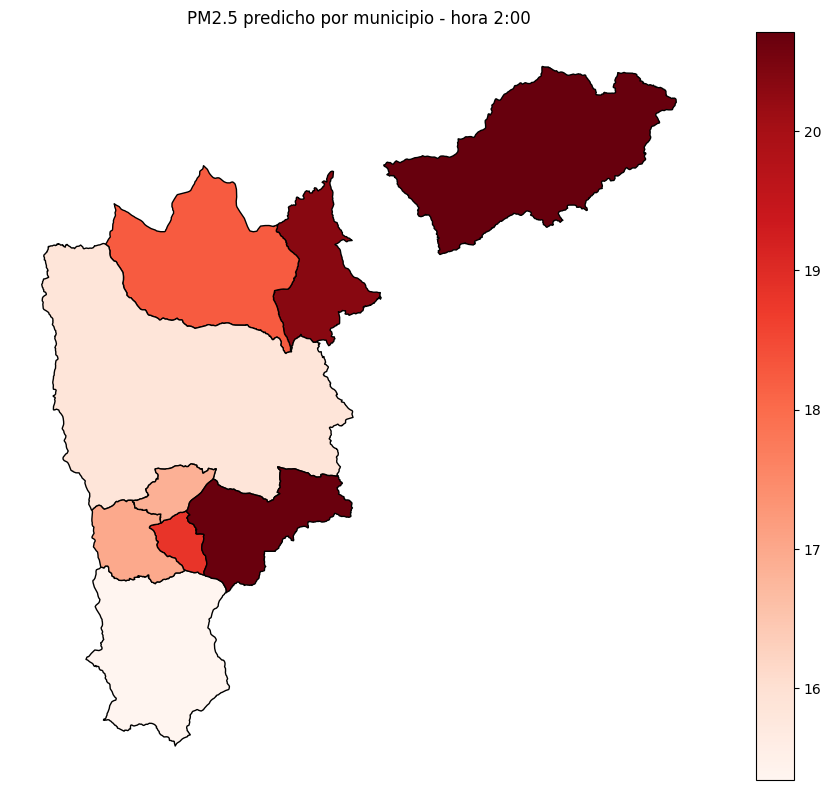

Generando mapa para la hora 3...


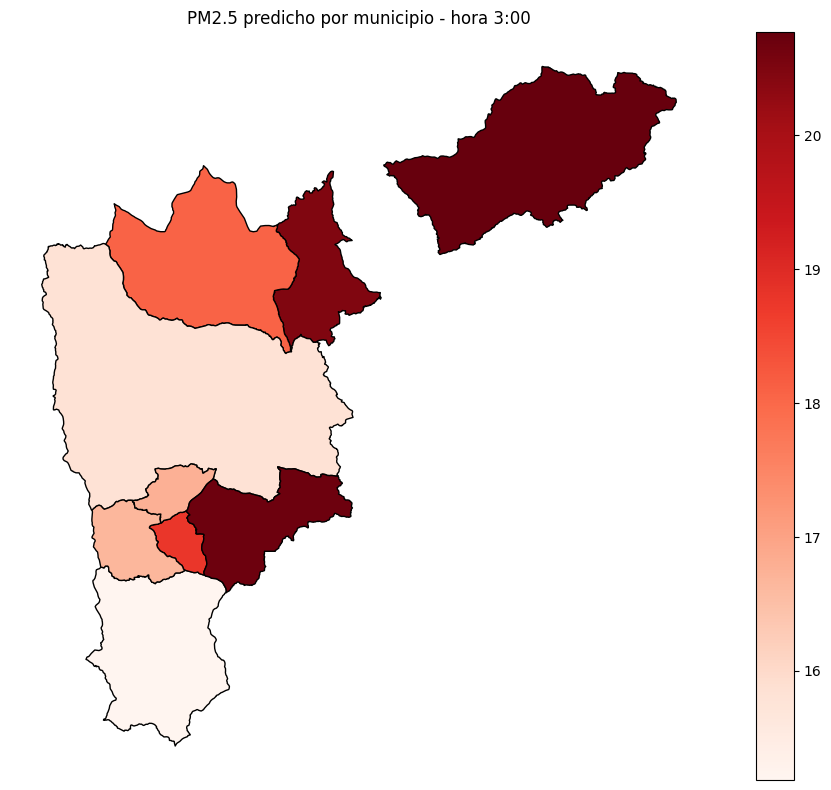

Generando mapa para la hora 4...


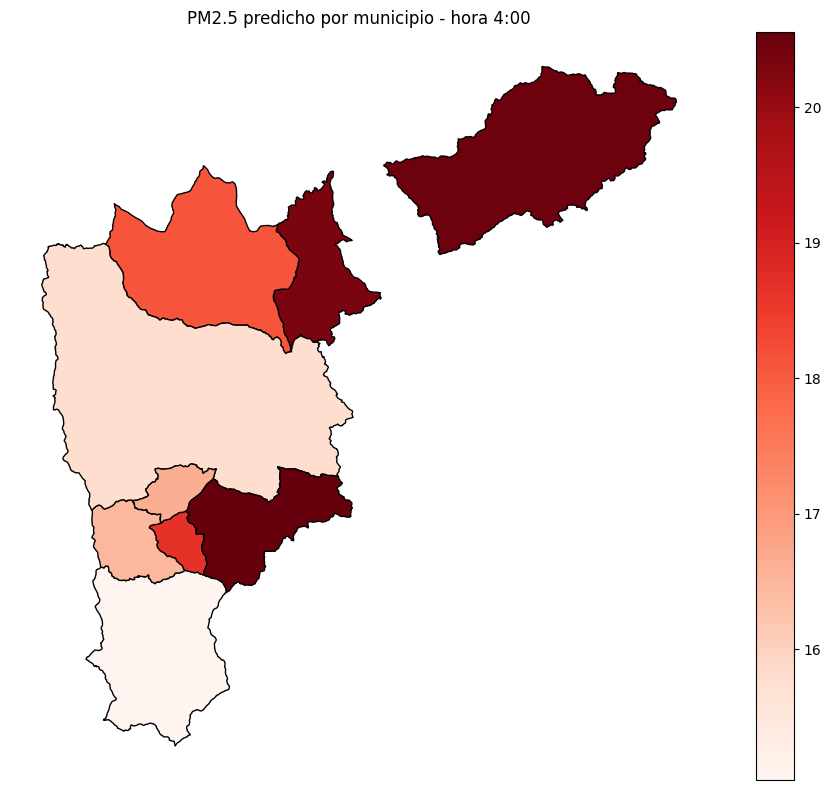

Generando mapa para la hora 5...


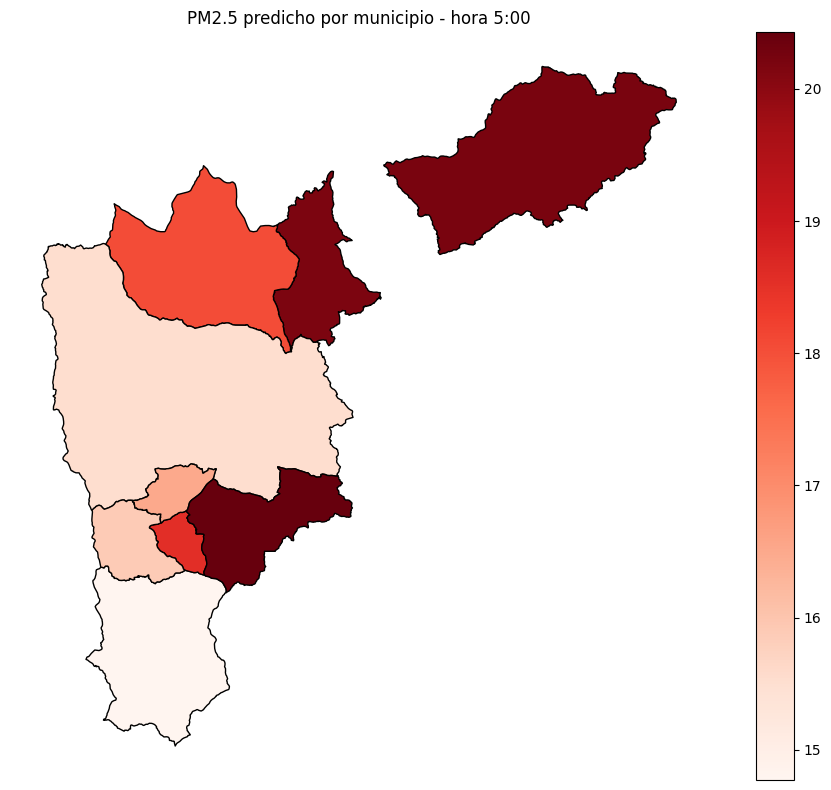

Generando mapa para la hora 6...


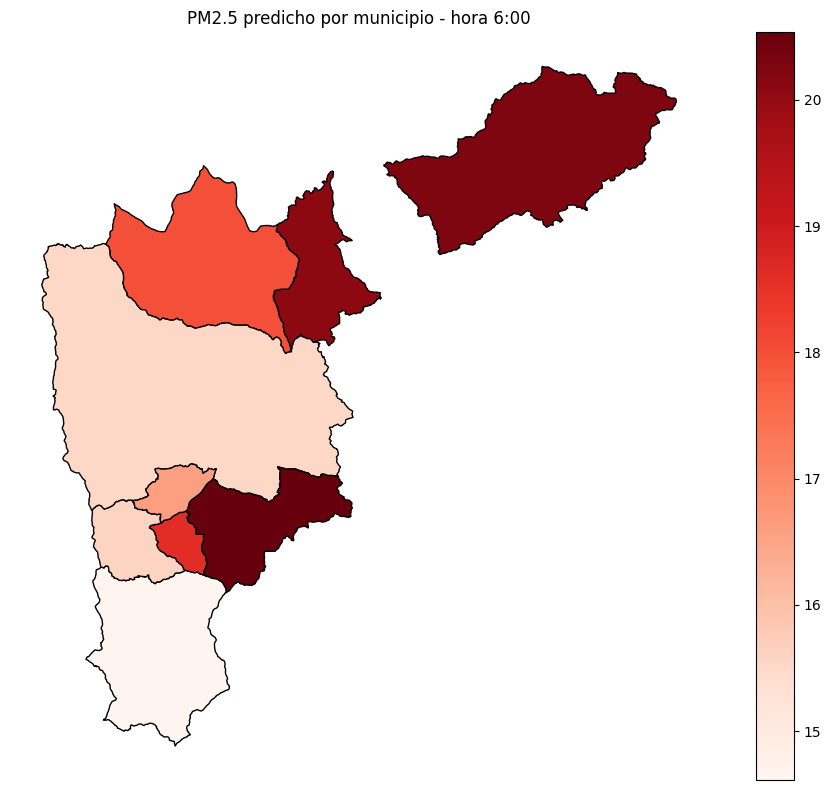

Generando mapa para la hora 7...


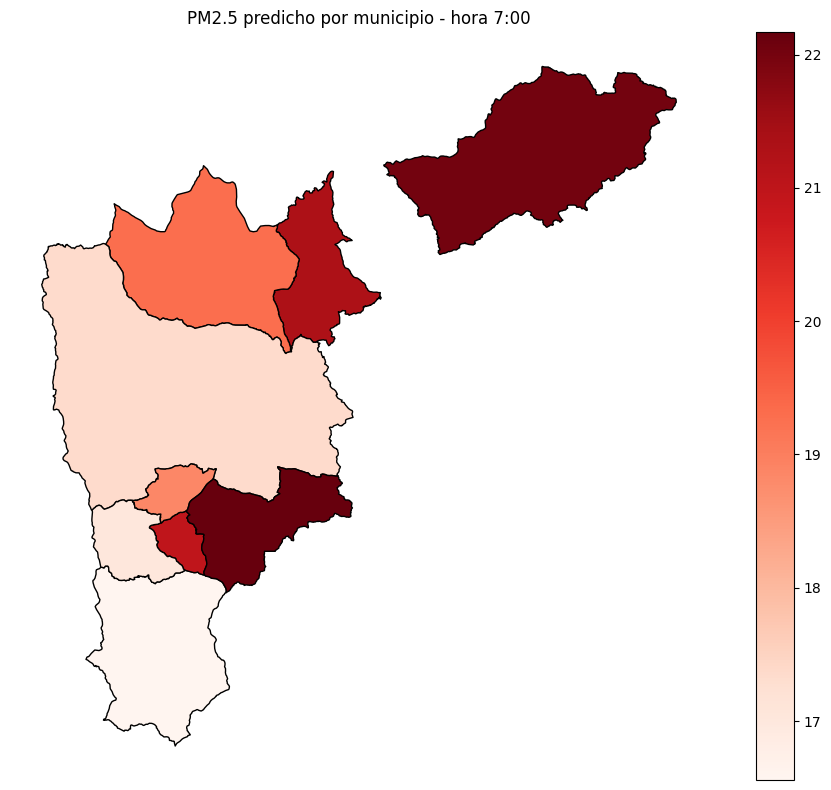

Generando mapa para la hora 8...


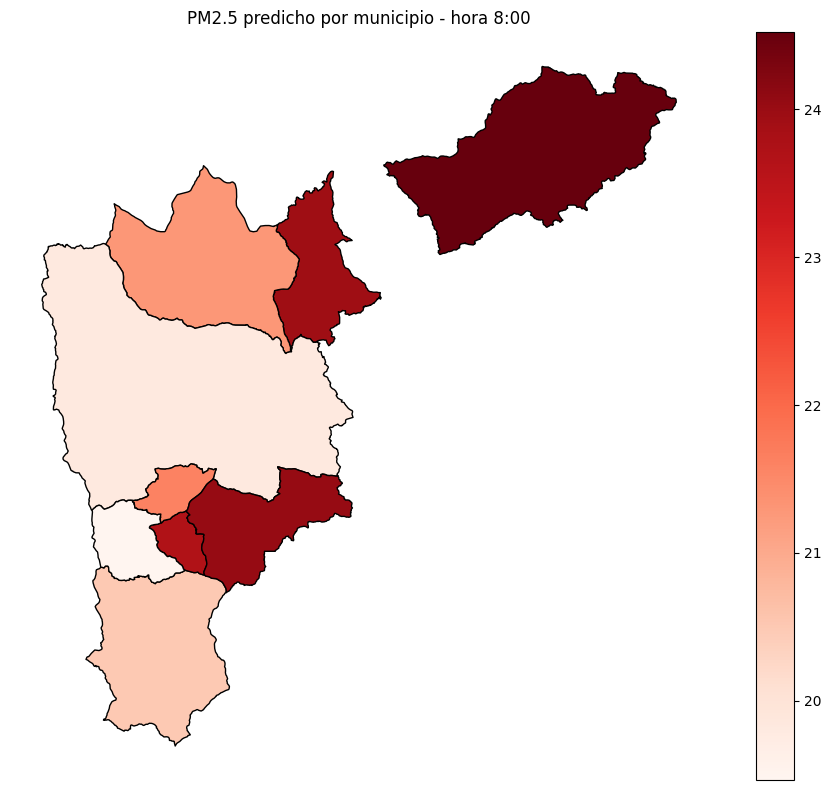

Generando mapa para la hora 9...


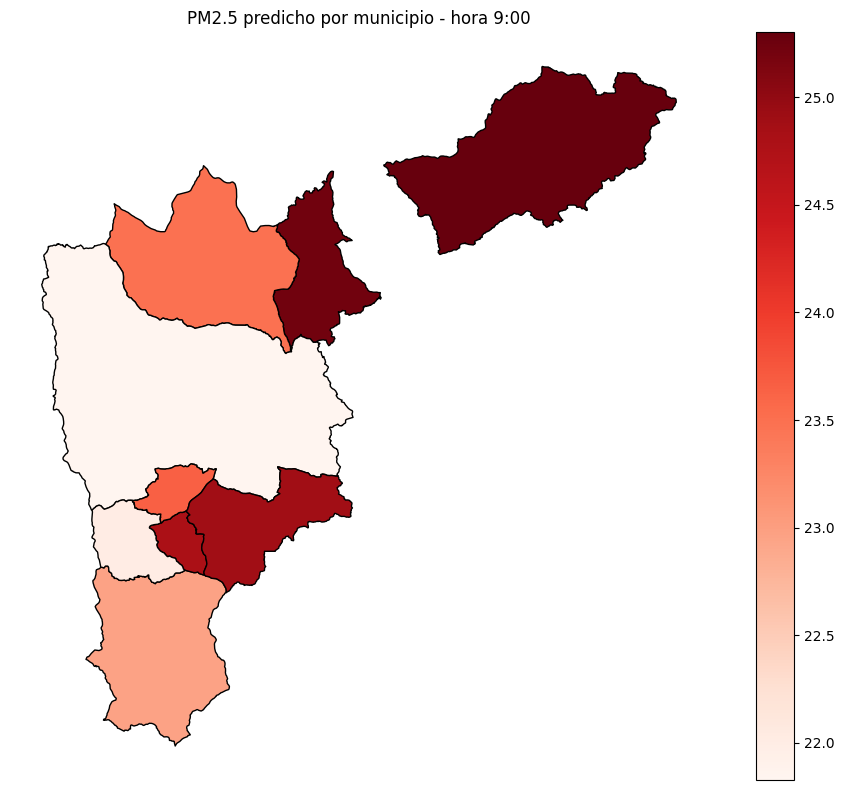

Generando mapa para la hora 10...


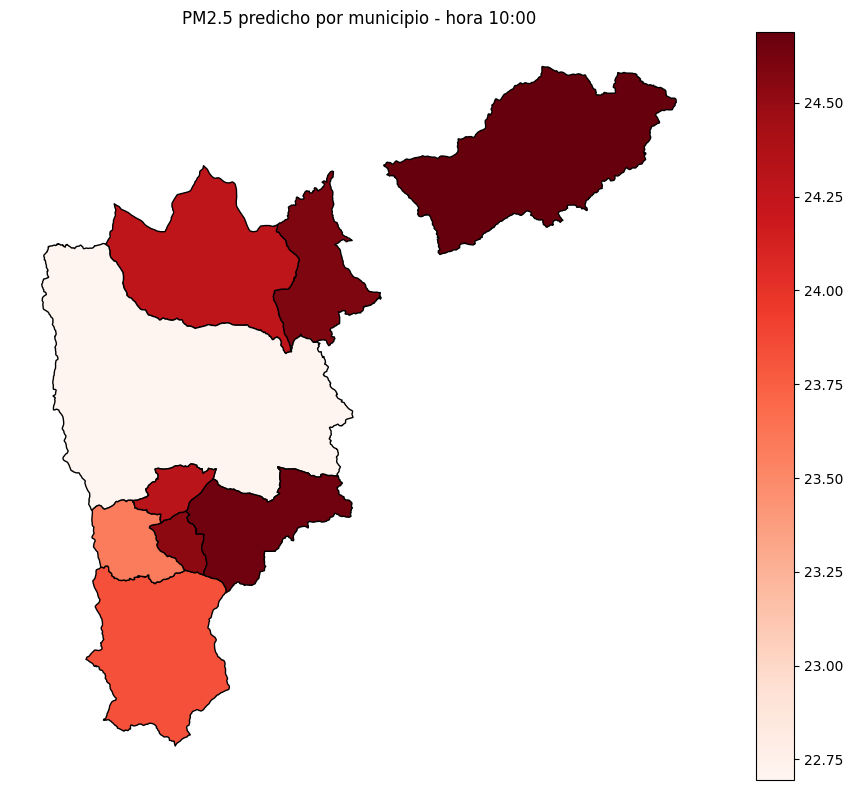

Generando mapa para la hora 11...


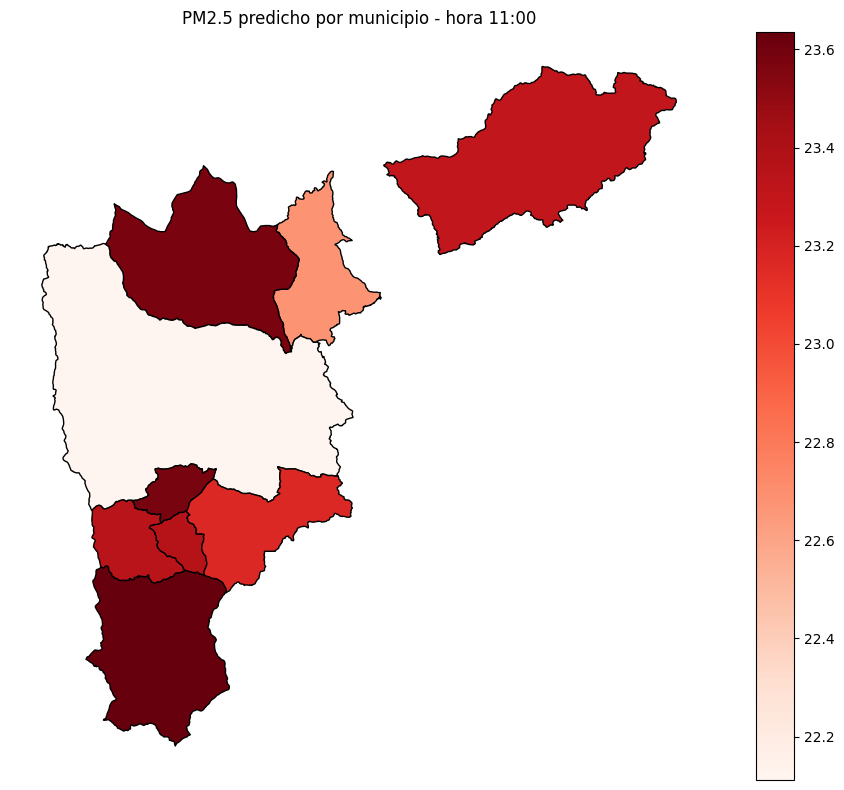

Generando mapa para la hora 12...


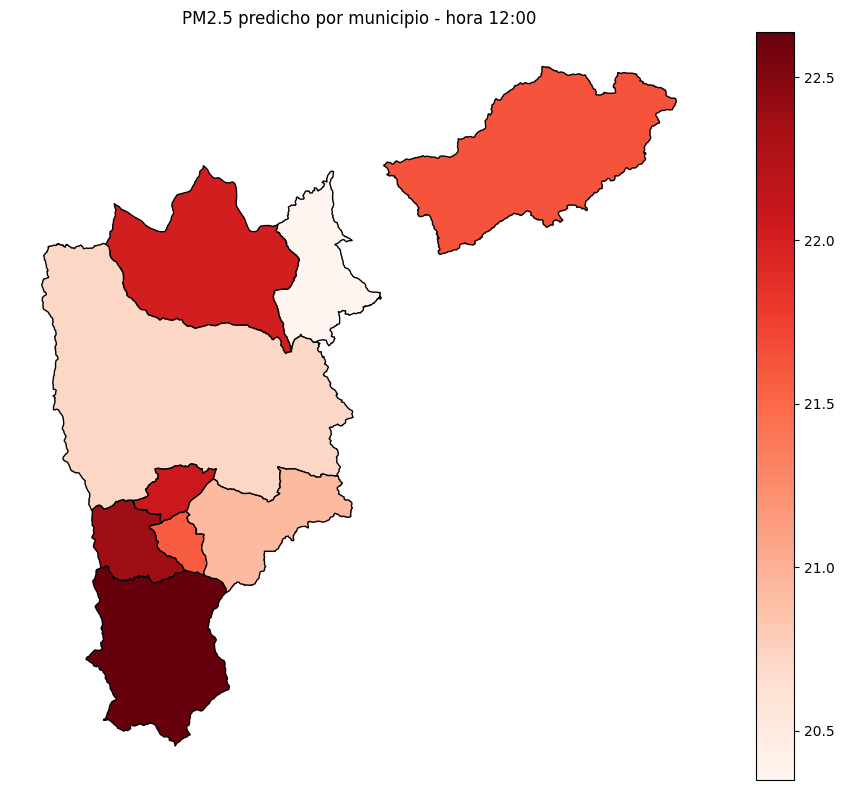

Generando mapa para la hora 13...


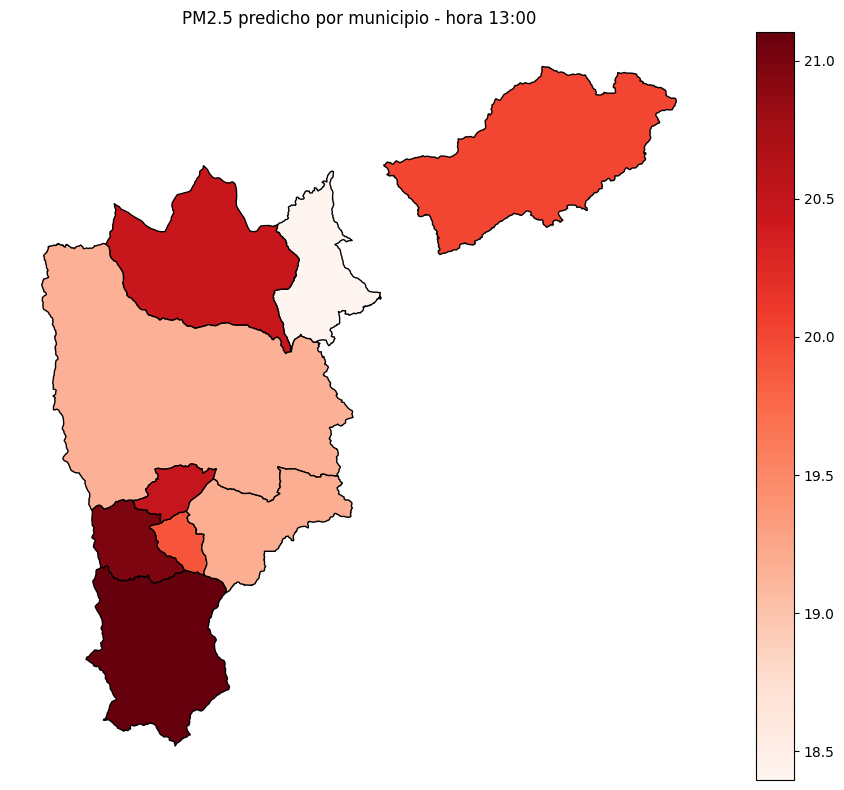

Generando mapa para la hora 14...


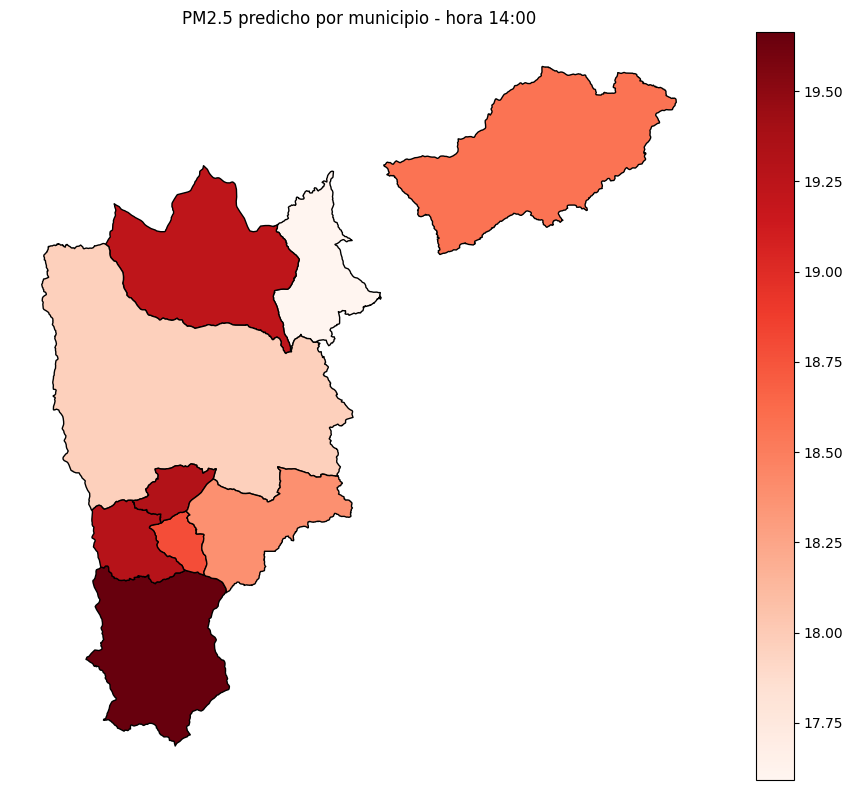

Generando mapa para la hora 15...


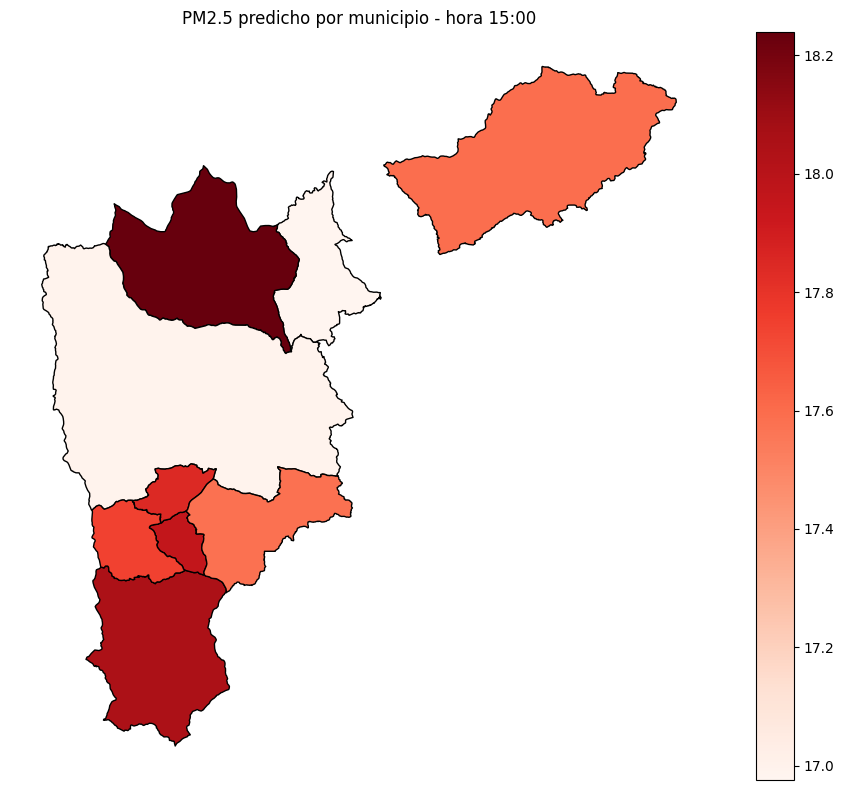

Generando mapa para la hora 16...


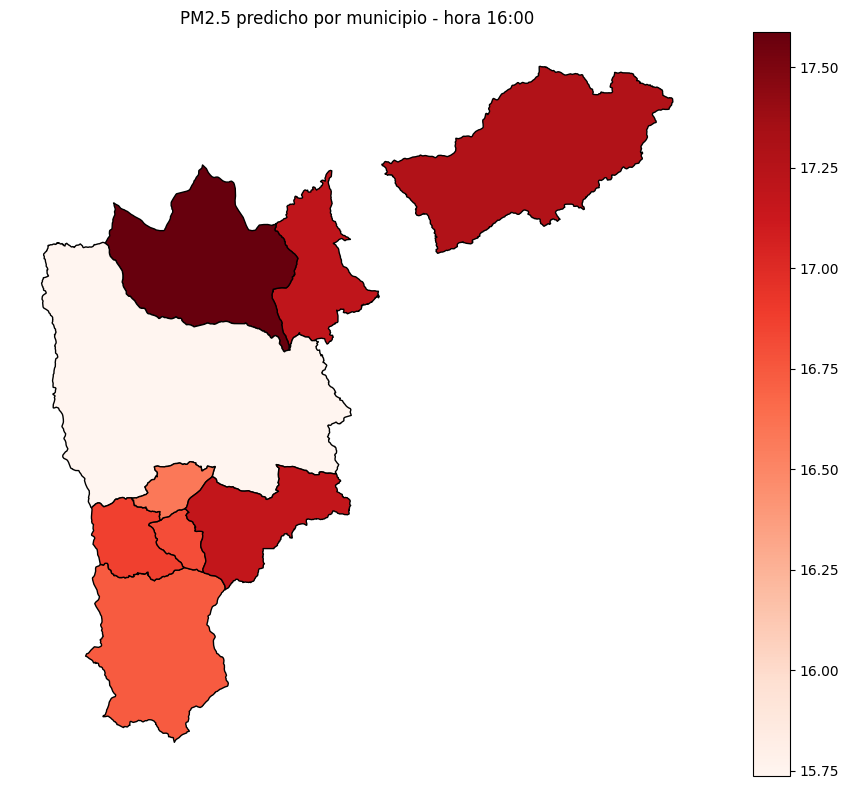

Generando mapa para la hora 17...


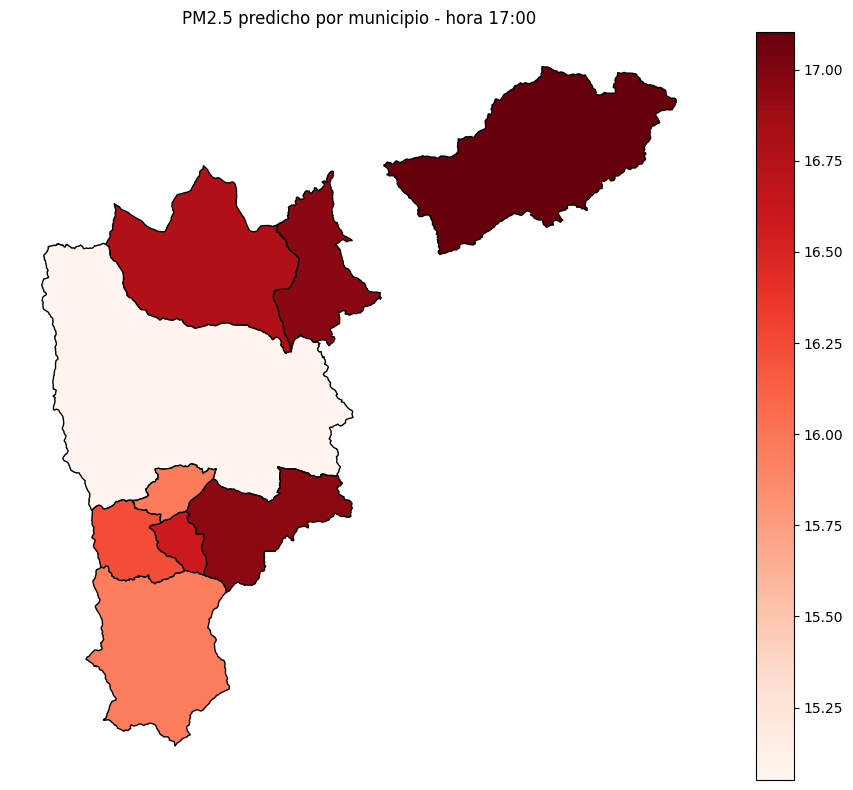

Generando mapa para la hora 18...


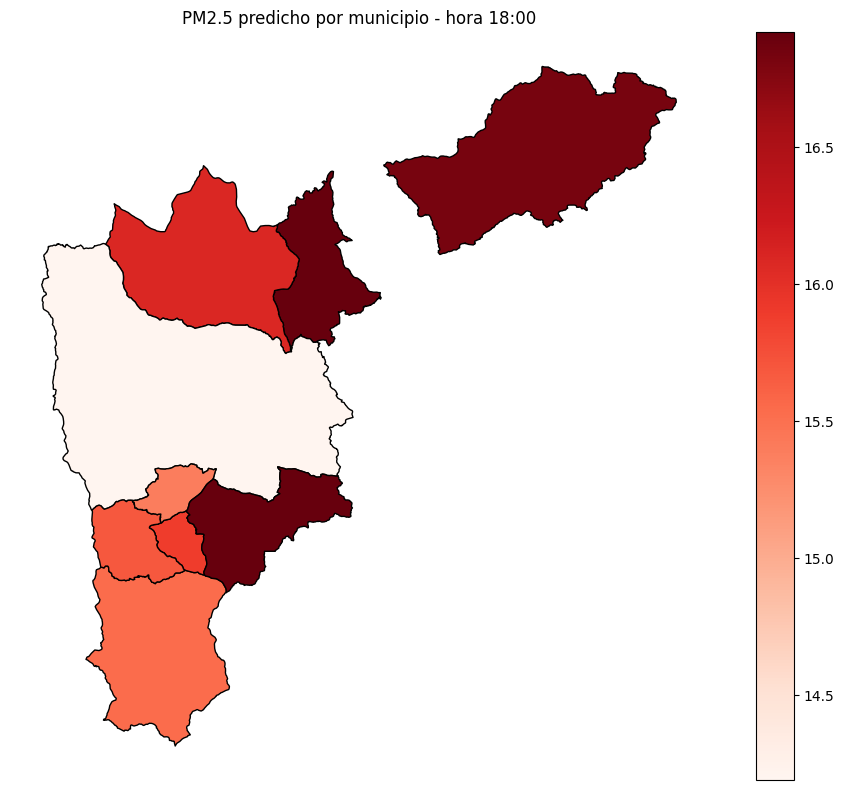

Generando mapa para la hora 19...


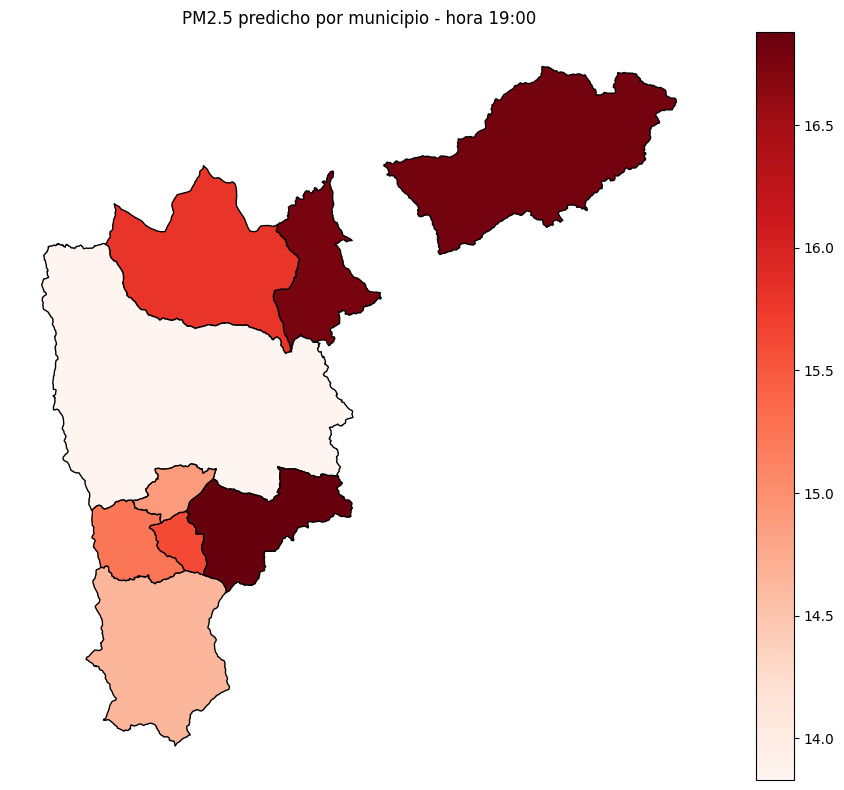

Generando mapa para la hora 20...


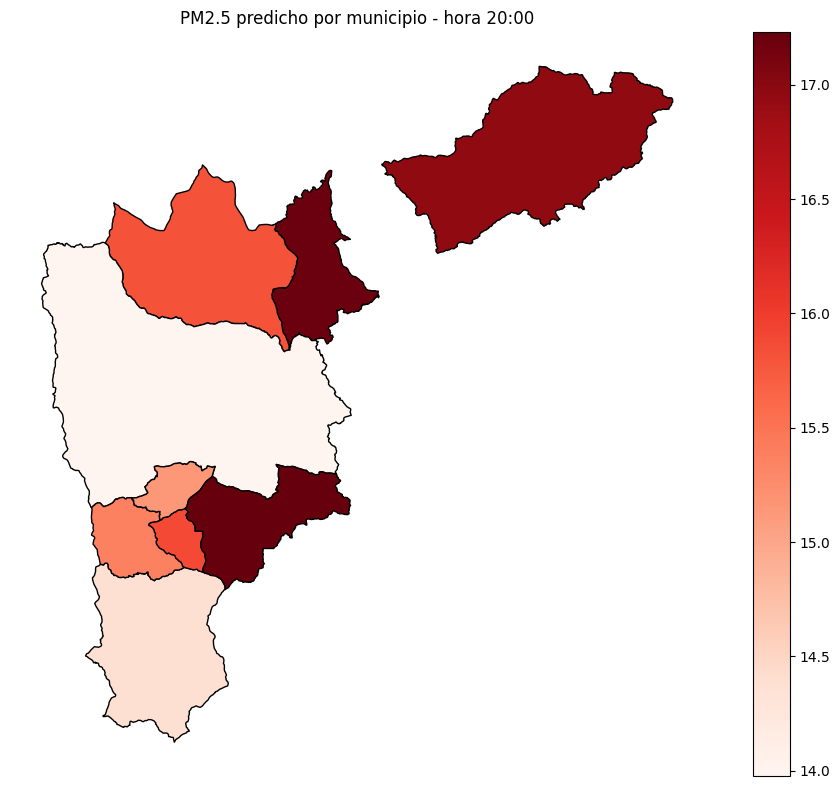

Generando mapa para la hora 21...


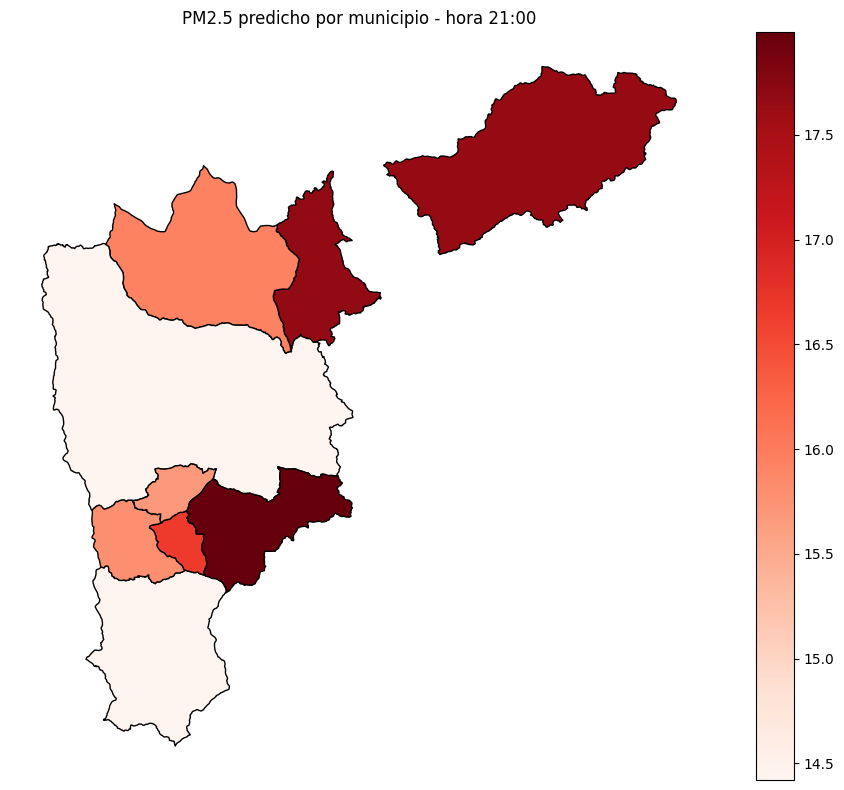

Generando mapa para la hora 22...


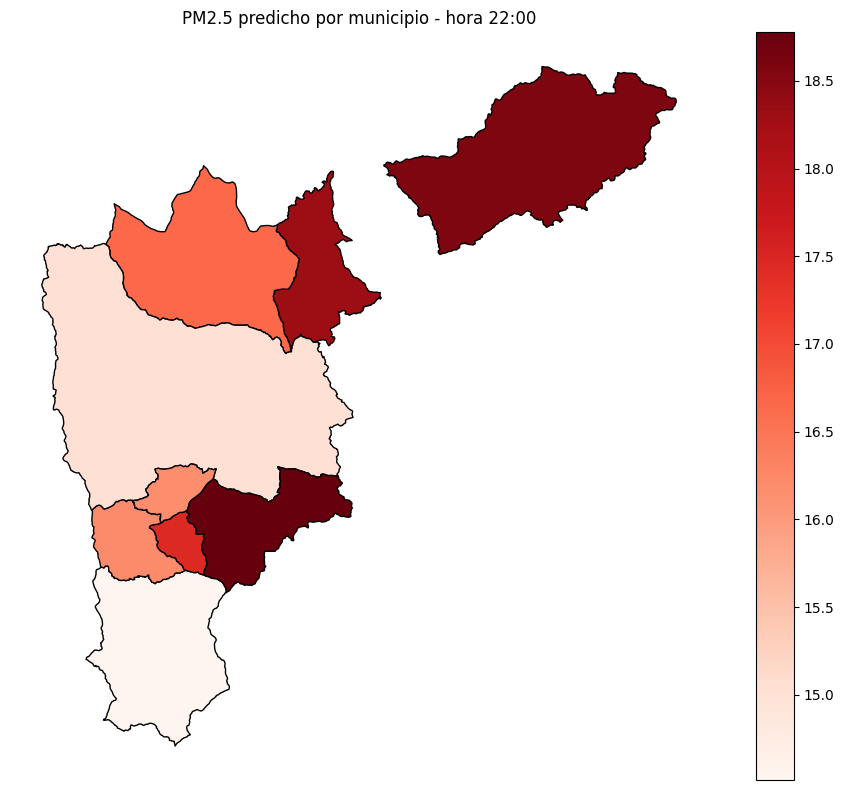

Generando mapa para la hora 23...


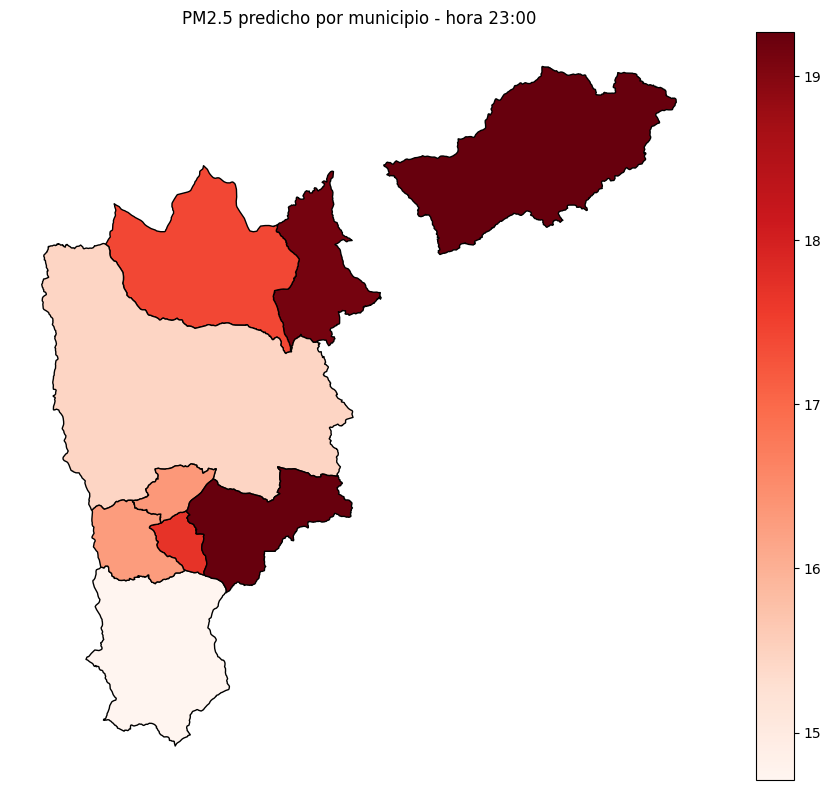

In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que la columna 'hora' esté disponible y sea tipo entero
df_modelhorc['hora'] = pd.to_datetime(df_modelhorc['fecha_hora']).dt.hour

# Calcular variables derivadas si no están calculadas
df_modelhorc['temperatura_2'] = df_modelhorc['temperatura'] ** 2
df_modelhorc['sin_hora_2'] = df_modelhorc['sin_hora'] ** 2

# Predicción logarítmica
df_modelhorc['log_pm25_pred'] = (
    intercepto +
    coef_temp * df_modelhorc['temperatura'] +
    coef_temp2 * df_modelhorc['temperatura_2'] +
    coef_pp * df_modelhorc['pp_horaria'] +
    coef_sin * df_modelhorc['sin_hora'] +
    coef_sin2 * df_modelhorc['sin_hora_2']
)

# Transformar a escala original
df_modelhorc['pm25_pred'] = np.exp(df_modelhorc['log_pm25_pred'])

# Convertir a GeoDataFrame
gdf_estaciones = gpd.GeoDataFrame(
    df_modelhorc,
    geometry=gpd.points_from_xy(df_modelhorc['Longitud'], df_modelhorc['Latitud']),
    crs="EPSG:4326"
)

# Asegurar que municipios esté en el mismo CRS
municipios = municipios.to_crs("EPSG:4326")

# --- Graficar por hora ---
for h in range(24):
    print(f"Generando mapa para la hora {h}...")

    # Filtrar por hora
    gdf_hora = gdf_estaciones[gdf_estaciones['hora'] == h]

    # Spatial join con municipios
    joined = gpd.sjoin(gdf_hora, municipios, how="inner", predicate="within")

    # Promedio por municipio
    pm25_por_mpio = joined.groupby("MPIO_NOMBR")["pm25_pred"].mean().reset_index()

    # Unir al GeoDataFrame de municipios
    gdf_municipios = municipios.merge(pm25_por_mpio, on="MPIO_NOMBR", how="left")

    # Graficar
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_municipios.plot(
        column="pm25_pred",
        cmap="Reds",
        edgecolor="black",
        legend=True,
        ax=ax
    )
    ax.set_title(f"PM2.5 predicho por municipio - hora {h}:00")
    ax.axis("off")
    plt.tight_layout()
    plt.show()


las estaciones tienen diferencias de aproximadamente la raiz de groupvar entre estaciones , esto tiene sentido debido a que están alejadas en su mayoría entre sí , las pendientes de temperatura varian modelaradamente entre estaciones y la pendiente de precipitacion varían poco pero de forma detectable , las pendientes tienenden a cambiar juntas entre estaciones, lo que quiere decir que si en una estación la temperatura aumenta el pm 2.5 tiende a disminuir 2.5 en casi la migma magnitud pero no la misma.

El seno y coseno me indican que hay un patrón por hora , adema´s de la forma de dicho ciclo, el seno me dice la amplitud y el coseno la hora del máximo. Donde en el día el material particulado tiende a fluctuar en unos 3.7, y el seno mediante conversiones me indica que a las 2 pm ocurre el máximo 


In [155]:
#Ahora hacemos el modelo de poisson, probabilidad de excedencia, estos límites los establece la oms https://www.who.int/es/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health
#recordemos que precipitación es suma , temperatura promedio y pm2.5 promedio

# Asegurarte que fecha_hora sea datetime
df = dfmerged_sin_duplicados.copy()
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

# Crear columna de fecha sin hora
df['fecha'] = df['fecha_hora'].dt.date

# Definir columnas fijas de información de la estación
cols_estacion = ['Codigo', 'Estacion', 'Longitud', 'Latitud', 'Ciudad', 'geometry']

# Agrupar por Código y fecha (asumiendo que cada estación puede tener varias mediciones por día)
df_diario = df.groupby(['Codigo', 'fecha']).agg({
    'pp_horaria': 'sum',
    'pm25': 'mean',
    'temperatura': 'mean'
}).reset_index()

# Tomar columnas fijas de info por estación (una sola vez por Código)
info_estaciones = df[cols_estacion].drop_duplicates(subset='Codigo')

# Unir info de estación al resumen diario
df_diario_final = df_diario.merge(info_estaciones, on='Codigo', how='left')


In [156]:
df_diario_final=df_diario_final.rename(columns={"pp_horaria":"pp_diaria"})

In [157]:
df_diario_final

Codigo       fecha  pp_diaria       pm25  temperatura  \
0        12  2022-03-01      0.508  22.909091    21.197000   
1        12  2022-03-02     20.828  36.608696    19.800906   
2        12  2022-03-03      0.000  26.708333    21.488243   
3        12  2022-03-04      9.144  31.250000    20.839021   
4        12  2022-03-05     31.242  29.909091    19.570886   
..      ...         ...        ...        ...          ...   
460      94  2022-03-27     36.322  11.419012    13.013090   
461      94  2022-03-28      6.604   9.310604    13.725132   
462      94  2022-03-29     13.462   9.186888    12.976697   
463      94  2022-03-30      6.096   9.721697    12.808101   
464      94  2022-03-31     14.986   7.542362    12.919854   

                    Estacion  Longitud  Latitud    Ciudad  \
0    Estación Tráfico Centro -75.56958  6.25256  Medellin   
1    Estación Tráfico Centro -75.56958  6.25256  Medellin   
2    Estación Tráfico Centro -75.56958  6.25256  Medellin   
3    Estación Tráfico Centro -75.56958  6.25256  Medellin   
4    Estación Tráfico Centro -75.56958  6.25256  Medellin   
..                       ...       ...      ...       ...   
460   Medellín - Santa Elena -75.49847  6.23636  Medellín   
461   Medellín - Santa Elena -75.49847  6.23636  Medellín   
462   Medellín - Santa Elena -75.49847  6.23636  Medellín   
463   Medellín - Santa Elena -75.49847  6.23636  Medellín   
464   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                                         geometry  
0     POINT (-8412367.16506155 697417.4143991877)  
1     POINT (-8412367.16506155 697417.4143991877)  
2     POINT (-8412367.16506155 697417.4143991877)  
3     POINT (-8412367.16506155 697417.4143991877)  
4     POINT (-8412367.16506155 697417.4143991877)  
..                                            ...  
460  POINT (-8404451.236071242 695603.2750998314)  
461  POINT (-8404451.236071242 695603.2750998314)  
462  POINT (-8404451.236071242 695603.2750998314)  
463  POINT (-8404451.236071242 695603.2750998314)  
464  POINT (-8404451.236071242 695603.2750998314)  

[465 rows x 10 columns]

In [163]:
df_diario_final['exceso'] = (df_diario_final['pm25'] > 15).astype(int)

df_diario_final

Codigo       fecha  pp_diaria       pm25  temperatura  \
0        12  2022-03-01      0.508  22.909091    21.197000   
1        12  2022-03-02     20.828  36.608696    19.800906   
2        12  2022-03-03      0.000  26.708333    21.488243   
3        12  2022-03-04      9.144  31.250000    20.839021   
4        12  2022-03-05     31.242  29.909091    19.570886   
..      ...         ...        ...        ...          ...   
460      94  2022-03-27     36.322  11.419012    13.013090   
461      94  2022-03-28      6.604   9.310604    13.725132   
462      94  2022-03-29     13.462   9.186888    12.976697   
463      94  2022-03-30      6.096   9.721697    12.808101   
464      94  2022-03-31     14.986   7.542362    12.919854   

                    Estacion  Longitud  Latitud    Ciudad  \
0    Estación Tráfico Centro -75.56958  6.25256  Medellin   
1    Estación Tráfico Centro -75.56958  6.25256  Medellin   
2    Estación Tráfico Centro -75.56958  6.25256  Medellin   
3    Estación Tráfico Centro -75.56958  6.25256  Medellin   
4    Estación Tráfico Centro -75.56958  6.25256  Medellin   
..                       ...       ...      ...       ...   
460   Medellín - Santa Elena -75.49847  6.23636  Medellín   
461   Medellín - Santa Elena -75.49847  6.23636  Medellín   
462   Medellín - Santa Elena -75.49847  6.23636  Medellín   
463   Medellín - Santa Elena -75.49847  6.23636  Medellín   
464   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                                         geometry  exceso  
0     POINT (-8412367.16506155 697417.4143991877)       1  
1     POINT (-8412367.16506155 697417.4143991877)       1  
2     POINT (-8412367.16506155 697417.4143991877)       1  
3     POINT (-8412367.16506155 697417.4143991877)       1  
4     POINT (-8412367.16506155 697417.4143991877)       1  
..                                            ...     ...  
460  POINT (-8404451.236071242 695603.2750998314)       0  
461  POINT (-8404451.236071242 695603.2750998314)       0  
462  POINT (-8404451.236071242 695603.2750998314)       0  
463  POINT (-8404451.236071242 695603.2750998314)       0  
464  POINT (-8404451.236071242 695603.2750998314)       0  

[465 rows x 11 columns]

In [195]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Modelo logístico (binomial): predice la probabilidad de que el PM2.5 diario supere el umbral
modelo_logit = smf.glm(
    formula="exceso ~ temperatura + pp_diaria +C(Codigo)",
    data=df_diario_final,
    family=sm.families.Binomial()
).fit()

print(modelo_logit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 exceso   No. Observations:                  464
Model:                            GLM   Df Residuals:                      447
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -212.44
Date:                Sat, 19 Jul 2025   Deviance:                       424.89
Time:                        20:30:19   Pearson chi2:                     480.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2141
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.9089   1.37e+04     

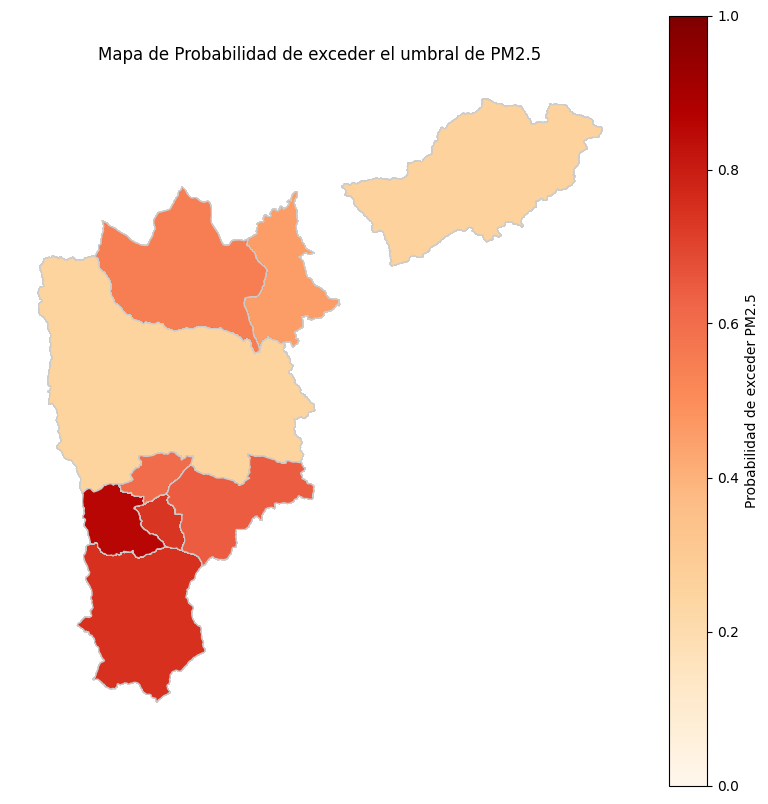

In [207]:
# Obtener las predicciones de probabilidad del modelo logístico
df_diario_final['probability_exceso'] = modelo_logit.predict(df_diario_final)

# Si tienes un GeoDataFrame con las geometrías (gdf), puedes unirlo con tus predicciones
# Asumo que tienes una columna común para hacer el merge (por ejemplo 'Codigo')
gdf = municipios.merge(df_diario_final[['Ciudad', 'probability_exceso']], on='Ciudad', how='left')

# Graficar el mapa con las probabilidades de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='probability_exceso', 
         cmap='OrRd', 
         linewidth=0.8, 
         ax=ax, 
         edgecolor='0.8', 
         legend=True, 
         vmin=0, 
         vmax=1,
         legend_kwds={'label': "Probabilidad de exceder PM2.5"})

ax.set_title('Mapa de Probabilidad de exceder el umbral de PM2.5')
ax.set_axis_off()
plt.show()

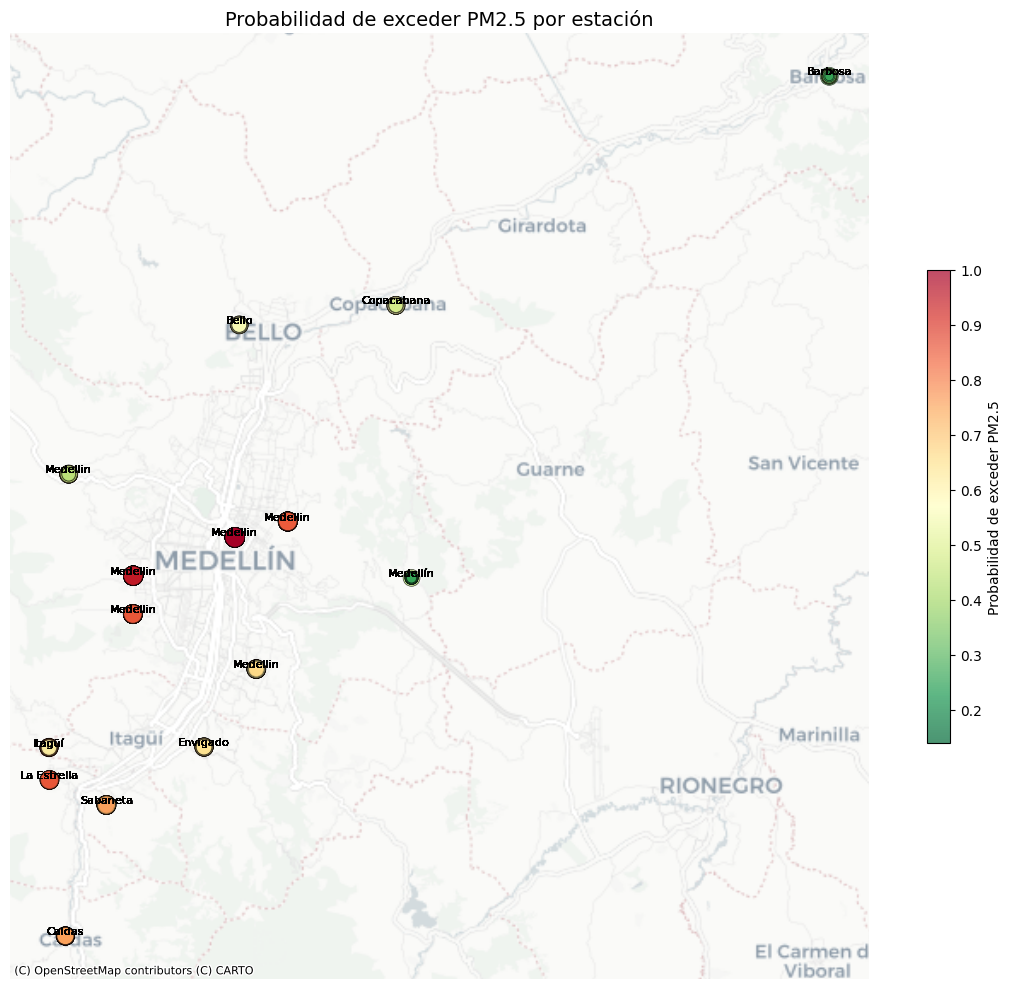

In [213]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# 1. Predicciones y GeoDataFrame
df_diario_final['probability_exceso'] = modelo_logit.predict(df_diario_final)
geometry = [Point(lon, lat) for lon, lat in zip(df_diario_final['Longitud'], df_diario_final['Latitud'])]
gdf_estaciones = gpd.GeoDataFrame(df_diario_final, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

# 2. Configurar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Graficar puntos (sin leyenda automática de geopandas)
scatter = gdf_estaciones.plot(
    ax=ax,
    markersize=gdf_estaciones['probability_exceso'] * 200,  # Tamaño proporcional
    column='probability_exceso',  # Colorear por probabilidad
    cmap='RdYlGn_r',             # Gradiente de rojo (alto) a verde (bajo)
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    legend=False  # ¡Importante! Desactiva la leyenda automática
)

# Añadir mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Añadir UNA sola barra de colores (control manual)
cbar = plt.colorbar(scatter.collections[0], ax=ax, shrink=0.5, label='Probabilidad de exceder PM2.5')

# Etiquetas de estaciones (opcional)
for x, y, label in zip(gdf_estaciones.geometry.x, gdf_estaciones.geometry.y, gdf_estaciones['Ciudad']):
    ax.text(x, y, label, fontsize=8, ha='center', va='bottom', color='black')

ax.set_title('Probabilidad de exceder PM2.5 por estación', fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [215]:
# con los puntos de google earth engine 
datosgee=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Trabajo3\DatosClimaticos_Con_Coordenadas1.csv")
datosgee

name        tipo  \
0     Punto-ee.String({\n  "type": "Invocation",\n  ...  especifico   
1     Punto-ee.String({\n  "type": "Invocation",\n  ...  especifico   
2     Punto-ee.String({\n  "type": "Invocation",\n  ...  especifico   
3     Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
4     Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
...                                                 ...         ...   
9355  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9356  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9357  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9358  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9359  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   

            lon       lat                 time     temp_C  precip_mm  
0    -75.644000  6.162000  2022-03-01 00:00:00  15.485956  14.797992  
1    -75.538000  6.352000  2022-03-01 00:00:00  15.241815   5.609250  
2    -75.454000  6.368000  2022-03-01 00:00:00  15.298456   3.833836  
3    -75.650806  6.293497  2022-03-01 00:00:00  15.427362  10.477936  
4    -75.529854  6.308557  2022-03-01 00:00:00  16.220331   8.079714  
...         ...       ...                  ...        ...        ...  
9355 -75.394298  6.420436  2022-03-30 23:00:00  15.395578  15.521988  
9356 -75.546258  6.314562  2022-03-30 23:00:00  16.100656  20.073891  
9357 -75.565890  6.258862  2022-03-30 23:00:00  16.100656  20.073891  
9358 -75.604816  6.242691  2022-03-30 23:00:00  15.282297  20.269737  
9359 -75.590986  6.428938  2022-03-30 23:00:00  13.844797  23.096770  

[9360 rows x 7 columns]

In [220]:
import pandas as pd

# Suponiendo que tu dataframe se llama df_clima y tiene columnas 'Latitud' y 'Longitud'
df = datosgee.copy()

# 1. Obtener las combinaciones únicas de coordenadas
puntos_unicos = df[['lat', 'lon']].drop_duplicates().reset_index(drop=True)

puntos_unicos['Codigo'] = range(1001, 1001 + len(puntos_unicos))



In [222]:
puntos_unicos

lat        lon  Codigo
0   6.162000 -75.644000    1001
1   6.352000 -75.538000    1002
2   6.368000 -75.454000    1003
3   6.293497 -75.650806    1004
4   6.308557 -75.529854    1005
5   6.265326 -75.492738    1006
6   6.268452 -75.651790    1007
7   6.341280 -75.505325    1008
8   6.420436 -75.394298    1009
9   6.314562 -75.546258    1010
10  6.258862 -75.565890    1011
11  6.242691 -75.604816    1012
12  6.428938 -75.590986    1013

In [223]:
df_clima = datosgee.merge(puntos_unicos, on=['lat', 'lon'], how='left')

In [224]:
df_clima

name        tipo  \
0     Punto-ee.String({\n  "type": "Invocation",\n  ...  especifico   
1     Punto-ee.String({\n  "type": "Invocation",\n  ...  especifico   
2     Punto-ee.String({\n  "type": "Invocation",\n  ...  especifico   
3     Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
4     Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
...                                                 ...         ...   
9355  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9356  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9357  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9358  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   
9359  Aleatorio-ee.String({\n  "type": "Invocation",...   aleatorio   

            lon       lat                 time     temp_C  precip_mm  Codigo  
0    -75.644000  6.162000  2022-03-01 00:00:00  15.485956  14.797992    1001  
1    -75.538000  6.352000  2022-03-01 00:00:00  15.241815   5.609250    1002  
2    -75.454000  6.368000  2022-03-01 00:00:00  15.298456   3.833836    1003  
3    -75.650806  6.293497  2022-03-01 00:00:00  15.427362  10.477936    1004  
4    -75.529854  6.308557  2022-03-01 00:00:00  16.220331   8.079714    1005  
...         ...       ...                  ...        ...        ...     ...  
9355 -75.394298  6.420436  2022-03-30 23:00:00  15.395578  15.521988    1009  
9356 -75.546258  6.314562  2022-03-30 23:00:00  16.100656  20.073891    1010  
9357 -75.565890  6.258862  2022-03-30 23:00:00  16.100656  20.073891    1011  
9358 -75.604816  6.242691  2022-03-30 23:00:00  15.282297  20.269737    1012  
9359 -75.590986  6.428938  2022-03-30 23:00:00  13.844797  23.096770    1013  

[9360 rows x 8 columns]

In [225]:
df_clima["time"]=pd.to_datetime(df_clima["time"])

In [231]:
df_clima['hora'] = df_clima['time'].dt.hour

# 3. Agrupar por Código_nuevo y hora
dfhorario = df_clima.groupby(['Codigo', 'hora','lat','lon'])[['temp_C', 'precip_mm']].mean().reset_index()

# 4. (Opcional) Ver resultados
dfhorario

Codigo  hora       lat        lon     temp_C  precip_mm
0      1001     0  6.162000 -75.644000  15.873729  12.101268
1      1001     1  6.162000 -75.644000  15.321435   0.533841
2      1001     2  6.162000 -75.644000  14.838349   1.000158
3      1001     3  6.162000 -75.644000  14.436152   1.381181
4      1001     4  6.162000 -75.644000  14.062604   1.780512
..      ...   ...       ...        ...        ...        ...
307    1013    19  6.428938 -75.590986  17.829011   5.929493
308    1013    20  6.428938 -75.590986  17.053810   8.048955
309    1013    21  6.428938 -75.590986  16.072054  10.702758
310    1013    22  6.428938 -75.590986  15.187546  12.834521
311    1013    23  6.428938 -75.590986  14.371284  14.413302

[312 rows x 6 columns]

In [229]:
dfhorario.describe()

Codigo        hora      temp_C   precip_mm
count   312.000000  312.000000  312.000000  312.000000
mean   1007.000000   11.500000   15.671677    4.507893
std       3.747668    6.933307    2.705525    3.785986
min    1001.000000    0.000000   10.452754    0.308608
25%    1004.000000    5.750000   13.458649    2.087044
50%    1007.000000   11.500000   15.011758    2.825223
75%    1010.000000   17.250000   17.839850    5.720532
max    1013.000000   23.000000   21.031455   14.754249

In [232]:
dfhorario.to_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Trabajo3\horarioGEE.csv")

In [233]:
df_clima.to_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Trabajo3\horariobrutoGEE.csv")